#[عبد الرحمن نضال الحمصي , محمد مجد عبد السلام , عبد الله معتوق]

<h1 style="text-align: center;">Data Exploratory Analysis and Processing<h1>

Prepare libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# here put every import you need e.g. import pandas
# it's better to load what you need from the package by from [] import [] instead of import the whole package
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import re
from IPython.display import display_html
%matplotlib inline


In [6]:
pip install kaleido

#### Download data



 <div dir="rtl" style="text-align: right;">
تابع لقراءة البيانات وطباعة المعلومات الاساسية عنها
</div>

In [ ]:
def get_data(path):
    data = pd.read_csv(path)
    BOLD = "\033[94m"
    RESET = "\033[0m"

    print(BOLD + 'data shape :' +  RESET , data.shape)

    print(BOLD + '\ndata columns :' + RESET)
    print(data.columns)

    print(BOLD + "\nFirst five rows of the data :" + RESET)
    display_html(data.head(5))

    print(BOLD + '\nnumerical data description :' + RESET)
    display_html(data.describe())

    print(BOLD + '\n non numerical data description :' + RESET)
    display_html(data.describe(exclude =[np.number]))

    print(BOLD + '\ndata info :' + RESET)
    display_html(data.info())

    print(BOLD + '\nnull values on each column :' + RESET)
    df = pd.DataFrame()
    df['null_count'] = data.isna().sum()
    df['null_percent'] = (data.isna().sum() * 100 / data.shape[0])
    pd.set_option('display.max_rows', None)
    display_html(df)
    return data


In [ ]:
chicago_CBD = get_data('/content/drive/MyDrive/Colab Notebooks/data/chicago-CBD-boundary.csv')

data shape : (1, 8)

data columns :
Index(['the_geom', 'OBJECTID', 'SUM_AREA', 'NAME', 'AREA', 'LEN', 'SHAPE_AREA',
       'SHAPE_LEN'],
      dtype='object')

First five rows of the data :


the_geom 
 OBJECTID 
 SUM_AREA 
 NAME 
 AREA 
 LEN 
 SHAPE_AREA 
 SHAPE_LEN 
 
 
 
 
 0 
 MULTIPOLYGON (((-87.62405822532047 41.90406015... 
 1 
 1.045633e+08 
 Central Business District 
 0 
 0 
 1.122806e+08 
 61725.295967


numerical data description :


OBJECTID 
 SUM_AREA 
 AREA 
 LEN 
 SHAPE_AREA 
 SHAPE_LEN 
 
 
 
 
 count 
 1.0 
 1.000000e+00 
 1.0 
 1.0 
 1.000000e+00 
 1.000000 
 
 
 mean 
 1.0 
 1.045633e+08 
 0.0 
 0.0 
 1.122806e+08 
 61725.295967 
 
 
 std 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 min 
 1.0 
 1.045633e+08 
 0.0 
 0.0 
 1.122806e+08 
 61725.295967 
 
 
 25% 
 1.0 
 1.045633e+08 
 0.0 
 0.0 
 1.122806e+08 
 61725.295967 
 
 
 50% 
 1.0 
 1.045633e+08 
 0.0 
 0.0 
 1.122806e+08 
 61725.295967 
 
 
 75% 
 1.0 
 1.045633e+08 
 0.0 
 0.0 
 1.122806e+08 
 61725.295967 
 
 
 max 
 1.0 
 1.045633e+08 
 0.0 
 0.0 
 1.122806e+08 
 61725.295967


 non numerical data description :


the_geom 
 NAME 
 
 
 
 
 count 
 1 
 1 
 
 
 unique 
 1 
 1 
 
 
 top 
 MULTIPOLYGON (((-87.62405822532047 41.90406015... 
 Central Business District 
 
 
 freq 
 1 
 1


data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    1 non-null      object 
 1   OBJECTID    1 non-null      int64  
 2   SUM_AREA    1 non-null      float64
 3   NAME        1 non-null      object 
 4   AREA        1 non-null      int64  
 5   LEN         1 non-null      int64  
 6   SHAPE_AREA  1 non-null      float64
 7   SHAPE_LEN   1 non-null      float64
dtypes: float64(3), int64(3), object(2)
memory usage: 192.0+ bytes

null values on each column :


null_count 
 null_percent 
 
 
 
 
 the_geom 
 0 
 0.0 
 
 
 OBJECTID 
 0 
 0.0 
 
 
 SUM_AREA 
 0 
 0.0 
 
 
 NAME 
 0 
 0.0 
 
 
 AREA 
 0 
 0.0 
 
 
 LEN 
 0 
 0.0 
 
 
 SHAPE_AREA 
 0 
 0.0 
 
 
 SHAPE_LEN 
 0 
 0.0

In [ ]:
chicago_police = get_data('/content/drive/MyDrive/Colab Notebooks/data/chicago-police-beat-boundries.csv')

data shape : (277, 5)

data columns :
Index(['the_geom', 'DISTRICT', 'SECTOR', 'BEAT', 'BEAT_NUM'], dtype='object')

First five rows of the data :


the_geom 
 DISTRICT 
 SECTOR 
 BEAT 
 BEAT_NUM 
 
 
 
 
 0 
 MULTIPOLYGON (((-87.7047252651434 41.975774430... 
 17 
 1 
 1 
 1713 
 
 
 1 
 MULTIPOLYGON (((-87.83365455041093 41.97535481... 
 31 
 0 
 0 
 3100 
 
 
 2 
 MULTIPOLYGON (((-87.90684167275818 41.97656175... 
 16 
 5 
 5 
 1651 
 
 
 3 
 MULTIPOLYGON (((-87.64491798475646 41.96972709... 
 19 
 1 
 1 
 1914 
 
 
 4 
 MULTIPOLYGON (((-87.63724132684592 41.96598776... 
 19 
 1 
 1 
 1915


numerical data description :


DISTRICT 
 SECTOR 
 BEAT 
 BEAT_NUM 
 
 
 
 
 count 
 277.000000 
 277.000000 
 277.000000 
 277.000000 
 
 
 mean 
 12.122744 
 2.028881 
 2.028881 
 1235.241877 
 
 
 std 
 7.232131 
 0.924249 
 0.924249 
 722.945828 
 
 
 min 
 1.000000 
 0.000000 
 0.000000 
 111.000000 
 
 
 25% 
 6.000000 
 1.000000 
 1.000000 
 633.000000 
 
 
 50% 
 11.000000 
 2.000000 
 2.000000 
 1131.000000 
 
 
 75% 
 18.000000 
 3.000000 
 3.000000 
 1813.000000 
 
 
 max 
 31.000000 
 5.000000 
 5.000000 
 3100.000000


 non numerical data description :


the_geom 
 
 
 
 
 count 
 277 
 
 
 unique 
 277 
 
 
 top 
 MULTIPOLYGON (((-87.7047252651434 41.975774430... 
 
 
 freq 
 1


data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   the_geom  277 non-null    object
 1   DISTRICT  277 non-null    int64 
 2   SECTOR    277 non-null    int64 
 3   BEAT      277 non-null    int64 
 4   BEAT_NUM  277 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 10.9+ KB

null values on each column :


null_count 
 null_percent 
 
 
 
 
 the_geom 
 0 
 0.0 
 
 
 DISTRICT 
 0 
 0.0 
 
 
 SECTOR 
 0 
 0.0 
 
 
 BEAT 
 0 
 0.0 
 
 
 BEAT_NUM 
 0 
 0.0

In [ ]:
chicago_street = get_data('/content/drive/MyDrive/Colab Notebooks/data/chicago-street-center-lines.csv')

data shape : (55747, 49)

data columns :
Index(['the_geom', 'FNODE_ID', 'TNODE_ID', 'TRANS_ID', 'PRE_DIR', 'STREET_NAM',
       'STREET_TYP', 'SUF_DIR', 'STREETNAME', 'L_F_ADD', 'L_T_ADD', 'R_F_ADD',
       'R_T_ADD', 'LOGICLF', 'LOGICLT', 'LOGICRF', 'LOGICRT', 'CLASS',
       'STATUS', 'STATUS_DAT', 'TIERED', 'ONEWAY_DIR', 'DIR_TRAVEL', 'EWNS',
       'L_PARITY', 'R_PARITY', 'F_ZLEV', 'T_ZLEV', 'L_FIPS', 'R_FIPS', 'R_ZIP',
       'L_ZIP', 'R_CENSUSBL', 'L_CENSUSBL', 'F_CROSS', 'F_CROSS_ST', 'T_CROSS',
       'T_CROSS_ST', 'LENGTH', 'EDIT_DATE', 'EDIT_TYPE', 'FLAG_STRIN',
       'EWNS_DIR', 'EWNS_COORD', 'CREATE_USE', 'CREATE_TIM', 'UPDATE_USE',
       'UPDATE_TIM', 'SHAPE_LEN'],
      dtype='object')

First five rows of the data :


the_geom 
 FNODE_ID 
 TNODE_ID 
 TRANS_ID 
 PRE_DIR 
 STREET_NAM 
 STREET_TYP 
 SUF_DIR 
 STREETNAME 
 L_F_ADD 
 ... 
 EDIT_DATE 
 EDIT_TYPE 
 FLAG_STRIN 
 EWNS_DIR 
 EWNS_COORD 
 CREATE_USE 
 CREATE_TIM 
 UPDATE_USE 
 UPDATE_TIM 
 SHAPE_LEN 
 
 
 
 
 0 
 MULTILINESTRING ((-87.63187018232667 41.780809... 
 10809 
 16581 
 127104 
 S 
 YALE 
 AVE 
 NaN 
 1782 
 0 
 ... 
 0 
 NaN 
 NaN 
 W 
 232 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 220.566012 
 
 
 1 
 MULTILINESTRING ((-87.60548932047061 41.762229... 
 6501 
 34082 
 128895 
 S 
 COTTAGE GROVE 
 AVE 
 NaN 
 1236 
 7301 
 ... 
 0 
 NaN 
 NaN 
 NaN 
 0 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 664.774607 
 
 
 2 
 MULTILINESTRING ((-87.68381848191974 41.697243... 
 15338 
 22358 
 142645 
 S 
 CAMPBELL 
 AVE 
 NaN 
 1177 
 10801 
 ... 
 0 
 NaN 
 NaN 
 W 
 2500 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 665.378453 
 
 
 3 
 MULTILINESTRING ((-87.645841892972 41.69339840... 
 15799 
 28881 
 148189 
 S 
 SANGAMON 
 ST 
 NaN 
 1696 
 0 
 ... 
 0 
 NaN 
 NaN 
 W 
 932 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 152.564966 
 
 
 4 
 MULTILINESTRING ((-87.67053671318457 41.679759... 
 36407 
 36534 
 139728 
 W 
 118TH 
 ST 
 NaN 
 1823 
 1933 
 ... 
 0 
 NaN 
 NaN 
 S 
 11800 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 332.691382 
 
 
 
 5 rows × 49 columns


numerical data description :


FNODE_ID 
 TNODE_ID 
 TRANS_ID 
 STREETNAME 
 L_F_ADD 
 L_T_ADD 
 R_F_ADD 
 R_T_ADD 
 LOGICLF 
 LOGICLT 
 ... 
 R_ZIP 
 L_ZIP 
 R_CENSUSBL 
 L_CENSUSBL 
 F_CROSS_ST 
 T_CROSS_ST 
 LENGTH 
 EDIT_DATE 
 EWNS_COORD 
 SHAPE_LEN 
 
 
 
 
 count 
 55747.000000 
 55747.000000 
 55747.000000 
 55747.000000 
 55747.000000 
 55747.000000 
 55747.000000 
 55747.000000 
 55747.000000 
 55747.000000 
 ... 
 55550.000000 
 55548.000000 
 5.574700e+04 
 5.574700e+04 
 55747.000000 
 55747.000000 
 55747.000000 
 5.574700e+04 
 55747.000000 
 55747.000000 
 
 
 mean 
 18468.397349 
 18505.884496 
 128227.448419 
 1443.411645 
 3879.269360 
 3914.224927 
 3876.698495 
 3911.655964 
 3879.062497 
 3939.799326 
 ... 
 60301.601332 
 60345.216785 
 1.690367e+14 
 1.691314e+14 
 1194.515741 
 1216.613629 
 422.083657 
 3.933689e+06 
 3505.486896 
 422.083019 
 
 
 std 
 10646.194071 
 10654.928550 
 16476.217950 
 721.501930 
 3079.544015 
 3085.571686 
 3079.898411 
 3085.953138 
 3079.453256 
 3088.155054 
 ... 
 4458.438599 
 4154.276798 
 1.469253e+13 
 1.414118e+13 
 853.384927 
 843.891528 
 234.316376 
 7.966459e+06 
 3147.752120 
 234.314867 
 
 
 min 
 1.000000 
 1.000000 
 100001.000000 
 1.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 ... 
 0.000000 
 0.000000 
 0.000000e+00 
 0.000000e+00 
 0.000000 
 0.000000 
 6.911068 
 0.000000e+00 
 0.000000 
 6.911054 
 
 
 25% 
 9307.000000 
 9319.500000 
 114030.500000 
 897.000000 
 1341.000000 
 1367.000000 
 1337.000000 
 1365.000000 
 1341.000000 
 1399.000000 
 ... 
 60617.000000 
 60617.000000 
 1.703118e+14 
 1.703119e+14 
 295.000000 
 401.000000 
 312.710726 
 0.000000e+00 
 732.000000 
 312.710723 
 
 
 50% 
 18303.000000 
 18398.000000 
 128086.000000 
 1575.000000 
 3232.000000 
 3259.000000 
 3231.000000 
 3259.000000 
 3231.000000 
 3299.000000 
 ... 
 60629.000000 
 60629.000000 
 1.703132e+14 
 1.703132e+14 
 1346.000000 
 1363.000000 
 336.150284 
 0.000000e+00 
 2832.000000 
 336.149944 
 
 
 75% 
 27698.500000 
 27737.500000 
 142089.500000 
 1980.000000 
 5801.000000 
 5859.000000 
 5801.000000 
 5858.000000 
 5801.000000 
 5898.000000 
 ... 
 60643.000000 
 60643.000000 
 1.703158e+14 
 1.703158e+14 
 1929.000000 
 1933.000000 
 652.164814 
 0.000000e+00 
 5500.000000 
 652.164807 
 
 
 max 
 37339.000000 
 37339.000000 
 163542.000000 
 4477.000000 
 13757.000000 
 13799.000000 
 13756.000000 
 13798.000000 
 13757.000000 
 13799.000000 
 ... 
 60827.000000 
 60827.000000 
 1.703184e+14 
 1.703184e+14 
 4471.000000 
 4453.000000 
 8959.034042 
 2.010060e+07 
 13800.000000 
 8959.034057 
 
 
 
 8 rows × 27 columns


 non numerical data description :


the_geom 
 PRE_DIR 
 STREET_NAM 
 STREET_TYP 
 SUF_DIR 
 CLASS 
 STATUS 
 STATUS_DAT 
 TIERED 
 ONEWAY_DIR 
 ... 
 R_PARITY 
 F_CROSS 
 T_CROSS 
 EDIT_TYPE 
 FLAG_STRIN 
 EWNS_DIR 
 CREATE_USE 
 CREATE_TIM 
 UPDATE_USE 
 UPDATE_TIM 
 
 
 
 
 count 
 55747 
 55293 
 55293 
 54493 
 2262 
 55747 
 55741 
 55747 
 55747 
 19295 
 ... 
 55343 
 55747 
 55747 
 7086 
 555 
 47968 
 55747 
 55747 
 55747 
 55747 
 
 
 unique 
 55747 
 4 
 1649 
 22 
 11 
 11 
 5 
 143 
 2 
 4 
 ... 
 2 
 48341 
 48379 
 21 
 25 
 4 
 3 
 149 
 4 
 518 
 
 
 top 
 MULTILINESTRING ((-87.63187018232667 41.780809... 
 W 
 WESTERN 
 AVE 
 OB 
 4 
 N 
 01/01/1999 08:00:00 AM +0000 
 N 
 S 
 ... 
 E 
 ||DEAD END|| 
 ||DEAD END|| 
 Street Class Change 
 GAP 
 W 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 EXISTING 
 01/01/1999 08:00:00 AM +0000 
 
 
 freq 
 1 
 20941 
 391 
 25735 
 759 
 37506 
 54949 
 55039 
 55595 
 6143 
 ... 
 38349 
 1351 
 1509 
 3572 
 189 
 20200 
 55564 
 55259 
 49548 
 44446 
 
 
 
 4 rows × 22 columns


data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55747 entries, 0 to 55746
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   the_geom    55747 non-null  object 
 1   FNODE_ID    55747 non-null  int64  
 2   TNODE_ID    55747 non-null  int64  
 3   TRANS_ID    55747 non-null  int64  
 4   PRE_DIR     55293 non-null  object 
 5   STREET_NAM  55293 non-null  object 
 6   STREET_TYP  54493 non-null  object 
 7   SUF_DIR     2262 non-null   object 
 8   STREETNAME  55747 non-null  int64  
 9   L_F_ADD     55747 non-null  int64  
 10  L_T_ADD     55747 non-null  int64  
 11  R_F_ADD     55747 non-null  int64  
 12  R_T_ADD     55747 non-null  int64  
 13  LOGICLF     55747 non-null  int64  
 14  LOGICLT     55747 non-null  int64  
 15  LOGICRF     55747 non-null  int64  
 16  LOGICRT     55747 non-null  int64  
 17  CLASS       55747 non-null  object 
 18  STATUS      55741 non-null  object 
 19  STATUS_DAT  

null_count 
 null_percent 
 
 
 
 
 the_geom 
 0 
 0.000000 
 
 
 FNODE_ID 
 0 
 0.000000 
 
 
 TNODE_ID 
 0 
 0.000000 
 
 
 TRANS_ID 
 0 
 0.000000 
 
 
 PRE_DIR 
 454 
 0.814394 
 
 
 STREET_NAM 
 454 
 0.814394 
 
 
 STREET_TYP 
 1254 
 2.249448 
 
 
 SUF_DIR 
 53485 
 95.942383 
 
 
 STREETNAME 
 0 
 0.000000 
 
 
 L_F_ADD 
 0 
 0.000000 
 
 
 L_T_ADD 
 0 
 0.000000 
 
 
 R_F_ADD 
 0 
 0.000000 
 
 
 R_T_ADD 
 0 
 0.000000 
 
 
 LOGICLF 
 0 
 0.000000 
 
 
 LOGICLT 
 0 
 0.000000 
 
 
 LOGICRF 
 0 
 0.000000 
 
 
 LOGICRT 
 0 
 0.000000 
 
 
 CLASS 
 0 
 0.000000 
 
 
 STATUS 
 6 
 0.010763 
 
 
 STATUS_DAT 
 0 
 0.000000 
 
 
 TIERED 
 0 
 0.000000 
 
 
 ONEWAY_DIR 
 36452 
 65.388272 
 
 
 DIR_TRAVEL 
 0 
 0.000000 
 
 
 EWNS 
 0 
 0.000000 
 
 
 L_PARITY 
 404 
 0.724703 
 
 
 R_PARITY 
 404 
 0.724703 
 
 
 F_ZLEV 
 0 
 0.000000 
 
 
 T_ZLEV 
 0 
 0.000000 
 
 
 L_FIPS 
 0 
 0.000000 
 
 
 R_FIPS 
 0 
 0.000000 
 
 
 R_ZIP 
 197 
 0.353382 
 
 
 L_ZIP 
 199 
 0.356970 
 
 
 R_CENSUSBL 
 0 
 0.000000 
 
 
 L_CENSUSBL 
 0 
 0.000000 
 
 
 F_CROSS 
 0 
 0.000000 
 
 
 F_CROSS_ST 
 0 
 0.000000 
 
 
 T_CROSS 
 0 
 0.000000 
 
 
 T_CROSS_ST 
 0 
 0.000000 
 
 
 LENGTH 
 0 
 0.000000 
 
 
 EDIT_DATE 
 0 
 0.000000 
 
 
 EDIT_TYPE 
 48661 
 87.289002 
 
 
 FLAG_STRIN 
 55192 
 99.004431 
 
 
 EWNS_DIR 
 7779 
 13.954114 
 
 
 EWNS_COORD 
 0 
 0.000000 
 
 
 CREATE_USE 
 0 
 0.000000 
 
 
 CREATE_TIM 
 0 
 0.000000 
 
 
 UPDATE_USE 
 0 
 0.000000 
 
 
 UPDATE_TIM 
 0 
 0.000000 
 
 
 SHAPE_LEN 
 0 
 0.000000

In [ ]:
crash = get_data('/content/drive/MyDrive/Colab Notebooks/data/traffic-crashes.csv')

data shape : (823957, 47)

data columns :
Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRAS

CRASH_RECORD_ID 
 CRASH_DATE_EST_I 
 CRASH_DATE 
 POSTED_SPEED_LIMIT 
 TRAFFIC_CONTROL_DEVICE 
 DEVICE_CONDITION 
 WEATHER_CONDITION 
 LIGHTING_CONDITION 
 FIRST_CRASH_TYPE 
 TRAFFICWAY_TYPE 
 ... 
 INJURIES_NON_INCAPACITATING 
 INJURIES_REPORTED_NOT_EVIDENT 
 INJURIES_NO_INDICATION 
 INJURIES_UNKNOWN 
 CRASH_HOUR 
 CRASH_DAY_OF_WEEK 
 CRASH_MONTH 
 LATITUDE 
 LONGITUDE 
 LOCATION 
 
 
 
 
 0 
 6c1659069e9c6285a650e70d6f9b574ed5f64c12888479... 
 NaN 
 08/18/2023 12:50:00 PM 
 15 
 OTHER 
 FUNCTIONING PROPERLY 
 CLEAR 
 DAYLIGHT 
 REAR END 
 OTHER 
 ... 
 1.0 
 0.0 
 1.0 
 0.0 
 12 
 6 
 8 
 NaN 
 NaN 
 NaN 
 
 
 1 
 5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4... 
 NaN 
 07/29/2023 02:45:00 PM 
 30 
 TRAFFIC SIGNAL 
 FUNCTIONING PROPERLY 
 CLEAR 
 DAYLIGHT 
 PARKED MOTOR VEHICLE 
 DIVIDED - W/MEDIAN (NOT RAISED) 
 ... 
 0.0 
 0.0 
 1.0 
 0.0 
 14 
 7 
 7 
 41.854120 
 -87.665902 
 POINT (-87.665902342962 41.854120262952) 
 
 
 2 
 61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c... 
 NaN 
 08/18/2023 05:58:00 PM 
 30 
 NO CONTROLS 
 NO CONTROLS 
 CLEAR 
 DAYLIGHT 
 PEDALCYCLIST 
 NOT DIVIDED 
 ... 
 1.0 
 0.0 
 1.0 
 0.0 
 17 
 6 
 8 
 41.942976 
 -87.761883 
 POINT (-87.761883496974 41.942975745006) 
 
 
 3 
 004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33... 
 NaN 
 11/26/2019 08:38:00 AM 
 25 
 NO CONTROLS 
 NO CONTROLS 
 CLEAR 
 DAYLIGHT 
 PEDESTRIAN 
 ONE-WAY 
 ... 
 0.0 
 0.0 
 1.0 
 0.0 
 8 
 3 
 11 
 NaN 
 NaN 
 NaN 
 
 
 4 
 a1d5f0ea90897745365a4cbb06cc60329a120d89753fac... 
 NaN 
 08/18/2023 10:45:00 AM 
 20 
 NO CONTROLS 
 NO CONTROLS 
 CLEAR 
 DAYLIGHT 
 FIXED OBJECT 
 OTHER 
 ... 
 0.0 
 0.0 
 1.0 
 0.0 
 10 
 6 
 8 
 NaN 
 NaN 
 NaN 
 
 
 
 5 rows × 47 columns


numerical data description :


POSTED_SPEED_LIMIT 
 LANE_CNT 
 STREET_NO 
 BEAT_OF_OCCURRENCE 
 INJURIES_TOTAL 
 INJURIES_FATAL 
 INJURIES_INCAPACITATING 
 INJURIES_NON_INCAPACITATING 
 INJURIES_REPORTED_NOT_EVIDENT 
 INJURIES_NO_INDICATION 
 INJURIES_UNKNOWN 
 CRASH_HOUR 
 CRASH_DAY_OF_WEEK 
 CRASH_MONTH 
 LATITUDE 
 LONGITUDE 
 
 
 
 
 count 
 823957.000000 
 1.990100e+05 
 823957.000000 
 823952.000000 
 822158.000000 
 822158.000000 
 822158.000000 
 822158.000000 
 822158.000000 
 822158.000000 
 822158.0 
 823957.000000 
 823957.000000 
 823957.000000 
 818267.000000 
 818267.000000 
 
 
 mean 
 28.407031 
 1.333011e+01 
 3689.550634 
 1243.940685 
 0.190162 
 0.001186 
 0.019867 
 0.107194 
 0.061915 
 2.003105 
 0.0 
 13.198498 
 4.122309 
 6.633585 
 41.854908 
 -87.673596 
 
 
 std 
 6.161584 
 2.961594e+03 
 2885.982747 
 705.190829 
 0.566358 
 0.037267 
 0.164920 
 0.422487 
 0.319603 
 1.157095 
 0.0 
 5.570536 
 1.981003 
 3.449178 
 0.335164 
 0.681035 
 
 
 min 
 0.000000 
 0.000000e+00 
 0.000000 
 111.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.0 
 0.000000 
 1.000000 
 1.000000 
 0.000000 
 -87.936193 
 
 
 25% 
 30.000000 
 2.000000e+00 
 1250.000000 
 714.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 1.000000 
 0.0 
 9.000000 
 2.000000 
 4.000000 
 41.782557 
 -87.721764 
 
 
 50% 
 30.000000 
 2.000000e+00 
 3201.000000 
 1212.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2.000000 
 0.0 
 14.000000 
 4.000000 
 7.000000 
 41.874827 
 -87.674195 
 
 
 75% 
 30.000000 
 4.000000e+00 
 5600.000000 
 1822.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 2.000000 
 0.0 
 17.000000 
 6.000000 
 10.000000 
 41.924410 
 -87.633428 
 
 
 max 
 99.000000 
 1.191625e+06 
 451100.000000 
 6100.000000 
 21.000000 
 4.000000 
 10.000000 
 21.000000 
 15.000000 
 61.000000 
 0.0 
 23.000000 
 7.000000 
 12.000000 
 42.022780 
 0.000000


 non numerical data description :


CRASH_RECORD_ID 
 CRASH_DATE_EST_I 
 CRASH_DATE 
 TRAFFIC_CONTROL_DEVICE 
 DEVICE_CONDITION 
 WEATHER_CONDITION 
 LIGHTING_CONDITION 
 FIRST_CRASH_TYPE 
 TRAFFICWAY_TYPE 
 ALIGNMENT 
 ... 
 STREET_DIRECTION 
 STREET_NAME 
 PHOTOS_TAKEN_I 
 STATEMENTS_TAKEN_I 
 DOORING_I 
 WORK_ZONE_I 
 WORK_ZONE_TYPE 
 WORKERS_PRESENT_I 
 MOST_SEVERE_INJURY 
 LOCATION 
 
 
 
 
 count 
 823957 
 61559 
 823957 
 823957 
 823957 
 823957 
 823957 
 823957 
 823957 
 823957 
 ... 
 823953 
 823956 
 10881 
 18451 
 2531 
 4698 
 3634 
 1202 
 822145 
 818267 
 
 
 unique 
 823957 
 2 
 541195 
 19 
 8 
 12 
 6 
 18 
 20 
 6 
 ... 
 4 
 1641 
 2 
 2 
 2 
 2 
 4 
 2 
 5 
 301653 
 
 
 top 
 6c1659069e9c6285a650e70d6f9b574ed5f64c12888479... 
 Y 
 12/29/2020 05:00:00 PM 
 NO CONTROLS 
 NO CONTROLS 
 CLEAR 
 DAYLIGHT 
 PARKED MOTOR VEHICLE 
 NOT DIVIDED 
 STRAIGHT AND LEVEL 
 ... 
 W 
 WESTERN AVE 
 Y 
 Y 
 Y 
 Y 
 CONSTRUCTION 
 Y 
 NO INDICATION OF INJURY 
 POINT (-87.905309125103 41.976201139024) 
 
 
 freq 
 1 
 53635 
 30 
 468276 
 473705 
 645699 
 527054 
 191439 
 357519 
 803998 
 ... 
 294596 
 22485 
 8178 
 15035 
 1699 
 3634 
 2514 
 1064 
 708627 
 1312 
 
 
 
 4 rows × 31 columns


data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823957 entries, 0 to 823956
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                823957 non-null  object 
 1   CRASH_DATE_EST_I               61559 non-null   object 
 2   CRASH_DATE                     823957 non-null  object 
 3   POSTED_SPEED_LIMIT             823957 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         823957 non-null  object 
 5   DEVICE_CONDITION               823957 non-null  object 
 6   WEATHER_CONDITION              823957 non-null  object 
 7   LIGHTING_CONDITION             823957 non-null  object 
 8   FIRST_CRASH_TYPE               823957 non-null  object 
 9   TRAFFICWAY_TYPE                823957 non-null  object 
 10  LANE_CNT                       199010 non-null  float64
 11  ALIGNMENT                      823957 non-null  object 
 12  ROADWAY_SURFACE_C

null_count 
 null_percent 
 
 
 
 
 CRASH_RECORD_ID 
 0 
 0.000000 
 
 
 CRASH_DATE_EST_I 
 762398 
 92.528858 
 
 
 CRASH_DATE 
 0 
 0.000000 
 
 
 POSTED_SPEED_LIMIT 
 0 
 0.000000 
 
 
 TRAFFIC_CONTROL_DEVICE 
 0 
 0.000000 
 
 
 DEVICE_CONDITION 
 0 
 0.000000 
 
 
 WEATHER_CONDITION 
 0 
 0.000000 
 
 
 LIGHTING_CONDITION 
 0 
 0.000000 
 
 
 FIRST_CRASH_TYPE 
 0 
 0.000000 
 
 
 TRAFFICWAY_TYPE 
 0 
 0.000000 
 
 
 LANE_CNT 
 624947 
 75.847041 
 
 
 ALIGNMENT 
 0 
 0.000000 
 
 
 ROADWAY_SURFACE_COND 
 0 
 0.000000 
 
 
 ROAD_DEFECT 
 0 
 0.000000 
 
 
 REPORT_TYPE 
 24578 
 2.982923 
 
 
 CRASH_TYPE 
 0 
 0.000000 
 
 
 INTERSECTION_RELATED_I 
 635017 
 77.069192 
 
 
 NOT_RIGHT_OF_WAY_I 
 785972 
 95.389929 
 
 
 HIT_AND_RUN_I 
 565983 
 68.690842 
 
 
 DAMAGE 
 0 
 0.000000 
 
 
 DATE_POLICE_NOTIFIED 
 0 
 0.000000 
 
 
 PRIM_CONTRIBUTORY_CAUSE 
 0 
 0.000000 
 
 
 SEC_CONTRIBUTORY_CAUSE 
 0 
 0.000000 
 
 
 STREET_NO 
 0 
 0.000000 
 
 
 STREET_DIRECTION 
 4 
 0.000485 
 
 
 STREET_NAME 
 1 
 0.000121 
 
 
 BEAT_OF_OCCURRENCE 
 5 
 0.000607 
 
 
 PHOTOS_TAKEN_I 
 813076 
 98.679421 
 
 
 STATEMENTS_TAKEN_I 
 805506 
 97.760684 
 
 
 DOORING_I 
 821426 
 99.692824 
 
 
 WORK_ZONE_I 
 819259 
 99.429825 
 
 
 WORK_ZONE_TYPE 
 820323 
 99.558958 
 
 
 WORKERS_PRESENT_I 
 822755 
 99.854119 
 
 
 MOST_SEVERE_INJURY 
 1812 
 0.219914 
 
 
 INJURIES_TOTAL 
 1799 
 0.218337 
 
 
 INJURIES_FATAL 
 1799 
 0.218337 
 
 
 INJURIES_INCAPACITATING 
 1799 
 0.218337 
 
 
 INJURIES_NON_INCAPACITATING 
 1799 
 0.218337 
 
 
 INJURIES_REPORTED_NOT_EVIDENT 
 1799 
 0.218337 
 
 
 INJURIES_NO_INDICATION 
 1799 
 0.218337 
 
 
 INJURIES_UNKNOWN 
 1799 
 0.218337 
 
 
 CRASH_HOUR 
 0 
 0.000000 
 
 
 CRASH_DAY_OF_WEEK 
 0 
 0.000000 
 
 
 CRASH_MONTH 
 0 
 0.000000 
 
 
 LATITUDE 
 5690 
 0.690570 
 
 
 LONGITUDE 
 5690 
 0.690570 
 
 
 LOCATION 
 5690 
 0.690570

In [ ]:
crash_people = get_data('/content/drive/MyDrive/Colab Notebooks/data/traffic-crashes-people.csv')

<ipython-input-3-966204fa53a1>:2: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


data shape : (1808605, 29)

data columns :
Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

First five rows of the data :


PERSON_ID 
 PERSON_TYPE 
 CRASH_RECORD_ID 
 VEHICLE_ID 
 CRASH_DATE 
 SEAT_NO 
 CITY 
 STATE 
 ZIPCODE 
 SEX 
 ... 
 EMS_RUN_NO 
 DRIVER_ACTION 
 DRIVER_VISION 
 PHYSICAL_CONDITION 
 PEDPEDAL_ACTION 
 PEDPEDAL_VISIBILITY 
 PEDPEDAL_LOCATION 
 BAC_RESULT 
 BAC_RESULT VALUE 
 CELL_PHONE_USE 
 
 
 
 
 0 
 O749947 
 DRIVER 
 81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554... 
 834816.0 
 09/28/2019 03:30:00 AM 
 NaN 
 CHICAGO 
 IL 
 60651 
 M 
 ... 
 NaN 
 UNKNOWN 
 UNKNOWN 
 UNKNOWN 
 NaN 
 NaN 
 NaN 
 TEST NOT OFFERED 
 NaN 
 NaN 
 
 
 1 
 O871921 
 DRIVER 
 af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568... 
 827212.0 
 04/13/2020 10:50:00 PM 
 NaN 
 CHICAGO 
 IL 
 60620 
 M 
 ... 
 NaN 
 NONE 
 NOT OBSCURED 
 NORMAL 
 NaN 
 NaN 
 NaN 
 TEST NOT OFFERED 
 NaN 
 NaN 
 
 
 2 
 O10018 
 DRIVER 
 71162af7bf22799b776547132ebf134b5b438dcf3dac6b... 
 9579.0 
 11/01/2015 05:00:00 AM 
 NaN 
 NaN 
 NaN 
 NaN 
 X 
 ... 
 NaN 
 IMPROPER BACKING 
 UNKNOWN 
 UNKNOWN 
 NaN 
 NaN 
 NaN 
 TEST NOT OFFERED 
 NaN 
 NaN 
 
 
 3 
 O10038 
 DRIVER 
 c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700... 
 9598.0 
 11/01/2015 08:00:00 AM 
 NaN 
 NaN 
 NaN 
 NaN 
 X 
 ... 
 NaN 
 UNKNOWN 
 UNKNOWN 
 UNKNOWN 
 NaN 
 NaN 
 NaN 
 TEST NOT OFFERED 
 NaN 
 NaN 
 
 
 4 
 O10039 
 DRIVER 
 eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4... 
 9600.0 
 11/01/2015 10:15:00 AM 
 NaN 
 NaN 
 NaN 
 NaN 
 X 
 ... 
 NaN 
 UNKNOWN 
 UNKNOWN 
 UNKNOWN 
 NaN 
 NaN 
 NaN 
 TEST NOT OFFERED 
 NaN 
 NaN 
 
 
 
 5 rows × 29 columns


numerical data description :


VEHICLE_ID 
 SEAT_NO 
 AGE 
 BAC_RESULT VALUE 
 
 
 
 
 count 
 1.772428e+06 
 365577.000000 
 1.280666e+06 
 2022.000000 
 
 
 mean 
 8.506080e+05 
 4.162212 
 3.790366e+01 
 0.170134 
 
 
 std 
 4.944340e+05 
 2.211084 
 1.708981e+01 
 0.102676 
 
 
 min 
 2.000000e+00 
 1.000000 
 -1.770000e+02 
 0.000000 
 
 
 25% 
 4.226840e+05 
 3.000000 
 2.500000e+01 
 0.120000 
 
 
 50% 
 8.411085e+05 
 3.000000 
 3.500000e+01 
 0.170000 
 
 
 75% 
 1.280059e+06 
 5.000000 
 5.000000e+01 
 0.220000 
 
 
 max 
 1.712856e+06 
 12.000000 
 1.100000e+02 
 1.000000


 non numerical data description :


PERSON_ID 
 PERSON_TYPE 
 CRASH_RECORD_ID 
 CRASH_DATE 
 CITY 
 STATE 
 ZIPCODE 
 SEX 
 DRIVERS_LICENSE_STATE 
 DRIVERS_LICENSE_CLASS 
 ... 
 EMS_AGENCY 
 EMS_RUN_NO 
 DRIVER_ACTION 
 DRIVER_VISION 
 PHYSICAL_CONDITION 
 PEDPEDAL_ACTION 
 PEDPEDAL_VISIBILITY 
 PEDPEDAL_LOCATION 
 BAC_RESULT 
 CELL_PHONE_USE 
 
 
 
 
 count 
 1808605 
 1808605 
 1808605 
 1808605 
 1316543 
 1335973 
 1208288 
 1778627 
 1059919 
 886020 
 ... 
 185083 
 30721 
 1439786 
 1439240 
 1440769 
 34435 
 34370 
 34433 
 1440768 
 1159 
 
 
 unique 
 1808605 
 6 
 822158 
 540242 
 13408 
 52 
 14401 
 3 
 210 
 281 
 ... 
 8079 
 1445 
 20 
 14 
 12 
 23 
 4 
 8 
 4 
 2 
 
 
 top 
 O749947 
 DRIVER 
 31ecf6862c691ff12d3856213b902c146b07337b42a569... 
 12/29/2020 05:00:00 PM 
 CHICAGO 
 IL 
 60629 
 M 
 IL 
 D 
 ... 
 CFD 
 DNA 
 NONE 
 NOT OBSCURED 
 NORMAL 
 CROSSING - WITH SIGNAL 
 NO CONTRASTING CLOTHING 
 IN ROADWAY 
 TEST NOT OFFERED 
 Y 
 
 
 freq 
 1 
 1407381 
 61 
 72 
 933434 
 1261567 
 44745 
 934741 
 970659 
 771298 
 ... 
 37388 
 4586 
 514550 
 727491 
 937426 
 7025 
 27042 
 15137 
 1419706 
 752 
 
 
 
 4 rows × 25 columns


data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808605 entries, 0 to 1808604
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSI

null_count 
 null_percent 
 
 
 
 
 PERSON_ID 
 0 
 0.000000 
 
 
 PERSON_TYPE 
 0 
 0.000000 
 
 
 CRASH_RECORD_ID 
 0 
 0.000000 
 
 
 VEHICLE_ID 
 36177 
 2.000271 
 
 
 CRASH_DATE 
 0 
 0.000000 
 
 
 SEAT_NO 
 1443028 
 79.786797 
 
 
 CITY 
 492062 
 27.206715 
 
 
 STATE 
 472632 
 26.132406 
 
 
 ZIPCODE 
 600317 
 33.192267 
 
 
 SEX 
 29978 
 1.657521 
 
 
 AGE 
 527939 
 29.190398 
 
 
 DRIVERS_LICENSE_STATE 
 748686 
 41.395772 
 
 
 DRIVERS_LICENSE_CLASS 
 922585 
 51.010862 
 
 
 SAFETY_EQUIPMENT 
 5061 
 0.279829 
 
 
 AIRBAG_DEPLOYED 
 34799 
 1.924080 
 
 
 EJECTION 
 22453 
 1.241454 
 
 
 INJURY_CLASSIFICATION 
 729 
 0.040307 
 
 
 HOSPITAL 
 1509447 
 83.459185 
 
 
 EMS_AGENCY 
 1623522 
 89.766533 
 
 
 EMS_RUN_NO 
 1777884 
 98.301398 
 
 
 DRIVER_ACTION 
 368819 
 20.392457 
 
 
 DRIVER_VISION 
 369365 
 20.422646 
 
 
 PHYSICAL_CONDITION 
 367836 
 20.338106 
 
 
 PEDPEDAL_ACTION 
 1774170 
 98.096046 
 
 
 PEDPEDAL_VISIBILITY 
 1774235 
 98.099640 
 
 
 PEDPEDAL_LOCATION 
 1774172 
 98.096157 
 
 
 BAC_RESULT 
 367837 
 20.338161 
 
 
 BAC_RESULT VALUE 
 1806583 
 99.888201 
 
 
 CELL_PHONE_USE 
 1807446 
 99.935917

In [ ]:
crash_vehicles = get_data('/content/drive/MyDrive/Colab Notebooks/data/traffic-crashes-vehicles.csv')

<ipython-input-3-966204fa53a1>:2: DtypeWarning: Columns (17,19,38,39,40,42,46,47,48,51,53,56,57,58,59,69) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path)


data shape : (1680892, 70)

data columns :
Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE', 'MODEL',
       'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'TOWED_I', 'FIRE_I',
       'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY', 'TOWED_TO',
       'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 'AREA_04_I',
       'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I',
       'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_L

CRASH_UNIT_ID 
 CRASH_RECORD_ID 
 CRASH_DATE 
 UNIT_NO 
 UNIT_TYPE 
 VEHICLE_ID 
 CMRC_VEH_I 
 MAKE 
 MODEL 
 LIC_PLATE_STATE 
 ... 
 TRAILER1_LENGTH 
 TRAILER2_LENGTH 
 TOTAL_VEHICLE_LENGTH 
 AXLE_CNT 
 VEHICLE_CONFIG 
 CARGO_BODY_TYPE 
 LOAD_TYPE 
 HAZMAT_OUT_OF_SERVICE_I 
 MCS_OUT_OF_SERVICE_I 
 HAZMAT_CLASS 
 
 
 
 
 0 
 1717556 
 7b1763088507f77e0e552c009a6bf89a4d6330c7527706... 
 12/06/2023 03:24:00 PM 
 1 
 DRIVER 
 1634931.0 
 NaN 
 NISSAN 
 SENTRA 
 IL 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 1 
 1717574 
 2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b... 
 12/06/2023 04:00:00 PM 
 2 
 DRIVER 
 1634978.0 
 NaN 
 CHRYSLER 
 SEBRING 
 IL 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2 
 1717579 
 a52ef70e33d468b855b5be44e8638a564434dcf99c0edf... 
 12/06/2023 04:30:00 PM 
 1 
 DRIVER 
 1634948.0 
 NaN 
 SUBARU 
 OUTBACK 
 IL 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 3 
 1720118 
 609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c... 
 12/10/2023 12:12:00 PM 
 1 
 DRIVER 
 1637401.0 
 NaN 
 TOYOTA 
 RAV4 
 IL 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 4 
 1720119 
 609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c... 
 12/10/2023 12:12:00 PM 
 2 
 DRIVER 
 1637408.0 
 NaN 
 SUBARU 
 OUTBACK 
 OK 
 ... 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 
 5 rows × 70 columns


numerical data description :


CRASH_UNIT_ID 
 UNIT_NO 
 VEHICLE_ID 
 VEHICLE_YEAR 
 OCCUPANT_CNT 
 CMV_ID 
 TRAILER1_LENGTH 
 TRAILER2_LENGTH 
 TOTAL_VEHICLE_LENGTH 
 AXLE_CNT 
 
 
 
 
 count 
 1.680892e+06 
 1.680892e+06 
 1.642419e+06 
 1.378934e+06 
 1.642419e+06 
 17100.000000 
 2352.000000 
 68.000000 
 2858.000000 
 4297.000000 
 
 
 mean 
 8.988982e+05 
 3.812558e+00 
 8.549934e+05 
 2.014043e+03 
 1.078731e+00 
 9538.271988 
 48.503827 
 44.779412 
 53.175647 
 9.762160 
 
 
 std 
 5.204999e+05 
 2.914043e+03 
 4.937966e+05 
 1.381399e+02 
 7.821784e-01 
 5516.665921 
 20.826397 
 27.902199 
 31.329729 
 396.725752 
 
 
 min 
 2.000000e+00 
 0.000000e+00 
 2.000000e+00 
 1.900000e+03 
 0.000000e+00 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 1.000000 
 
 
 25% 
 4.472928e+05 
 1.000000e+00 
 4.277905e+05 
 2.007000e+03 
 1.000000e+00 
 4715.750000 
 45.000000 
 24.750000 
 35.000000 
 2.000000 
 
 
 50% 
 8.999105e+05 
 2.000000e+00 
 8.534420e+05 
 2.013000e+03 
 1.000000e+00 
 9568.500000 
 53.000000 
 50.000000 
 53.000000 
 3.000000 
 
 
 75% 
 1.349798e+06 
 2.000000e+00 
 1.281884e+06 
 2.016000e+03 
 1.000000e+00 
 14332.250000 
 53.000000 
 53.000000 
 66.000000 
 5.000000 
 
 
 max 
 1.798489e+06 
 3.778035e+06 
 1.712856e+06 
 9.999000e+03 
 9.900000e+01 
 19042.000000 
 740.000000 
 123.000000 
 999.000000 
 26009.000000


 non numerical data description :


CRASH_RECORD_ID 
 CRASH_DATE 
 UNIT_TYPE 
 CMRC_VEH_I 
 MAKE 
 MODEL 
 LIC_PLATE_STATE 
 VEHICLE_DEFECT 
 VEHICLE_TYPE 
 VEHICLE_USE 
 ... 
 IDOT_PERMIT_NO 
 WIDE_LOAD_I 
 TRAILER1_WIDTH 
 TRAILER2_WIDTH 
 VEHICLE_CONFIG 
 CARGO_BODY_TYPE 
 LOAD_TYPE 
 HAZMAT_OUT_OF_SERVICE_I 
 MCS_OUT_OF_SERVICE_I 
 HAZMAT_CLASS 
 
 
 
 
 count 
 1680892 
 1680892 
 1678742 
 31277 
 1642414 
 1642269 
 1491975 
 1642419 
 1642419 
 1642419 
 ... 
 925 
 151 
 2915 
 349 
 14163 
 13541 
 12946 
 11781 
 12030 
 1101 
 
 
 unique 
 823957 
 541221 
 9 
 2 
 1334 
 2714 
 52 
 17 
 22 
 25 
 ... 
 639 
 2 
 3 
 3 
 8 
 9 
 6 
 2 
 2 
 8 
 
 
 top 
 313777c940c68d531b001269eab36bde9d156e2423cc25... 
 12/29/2020 05:00:00 PM 
 DRIVER 
 Y 
 CHEVROLET 
 UNKNOWN 
 IL 
 NONE 
 PASSENGER 
 PERSONAL 
 ... 
 UNK 
 Y 
 0-96 
 0-96 
 TRACTOR/SEMI-TRAILER 
 VAN/ENCLOSED BOX 
 OTHER 
 N 
 N 
 MISCELLANEOUS 
 
 
 freq 
 18 
 60 
 1407381 
 19831 
 190651 
 180803 
 1366818 
 888141 
 1033026 
 1061418 
 ... 
 118 
 92 
 1756 
 193 
 5538 
 5845 
 7027 
 11763 
 11983 
 967 
 
 
 
 4 rows × 60 columns


data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680892 entries, 0 to 1680891
Data columns (total 70 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1680892 non-null  int64  
 1   CRASH_RECORD_ID           1680892 non-null  object 
 2   CRASH_DATE                1680892 non-null  object 
 3   UNIT_NO                   1680892 non-null  int64  
 4   UNIT_TYPE                 1678742 non-null  object 
 5   VEHICLE_ID                1642419 non-null  float64
 6   CMRC_VEH_I                31277 non-null    object 
 7   MAKE                      1642414 non-null  object 
 8   MODEL                     1642269 non-null  object 
 9   LIC_PLATE_STATE           1491975 non-null  object 
 10  VEHICLE_YEAR              1378934 non-null  float64
 11  VEHICLE_DEFECT            1642419 non-null  object 
 12  VEHICLE_TYPE              1642419 non-null  object 
 13  VEHICLE_USE   

null_count 
 null_percent 
 
 
 
 
 CRASH_UNIT_ID 
 0 
 0.000000 
 
 
 CRASH_RECORD_ID 
 0 
 0.000000 
 
 
 CRASH_DATE 
 0 
 0.000000 
 
 
 UNIT_NO 
 0 
 0.000000 
 
 
 UNIT_TYPE 
 2150 
 0.127908 
 
 
 VEHICLE_ID 
 38473 
 2.288844 
 
 
 CMRC_VEH_I 
 1649615 
 98.139262 
 
 
 MAKE 
 38478 
 2.289142 
 
 
 MODEL 
 38623 
 2.297768 
 
 
 LIC_PLATE_STATE 
 188917 
 11.239092 
 
 
 VEHICLE_YEAR 
 301958 
 17.964152 
 
 
 VEHICLE_DEFECT 
 38473 
 2.288844 
 
 
 VEHICLE_TYPE 
 38473 
 2.288844 
 
 
 VEHICLE_USE 
 38473 
 2.288844 
 
 
 TRAVEL_DIRECTION 
 38473 
 2.288844 
 
 
 MANEUVER 
 38473 
 2.288844 
 
 
 TOWED_I 
 1472365 
 87.594265 
 
 
 FIRE_I 
 1679517 
 99.918198 
 
 
 OCCUPANT_CNT 
 38473 
 2.288844 
 
 
 EXCEED_SPEED_LIMIT_I 
 1678495 
 99.857397 
 
 
 TOWED_BY 
 1524003 
 90.666325 
 
 
 TOWED_TO 
 1584546 
 94.268162 
 
 
 AREA_00_I 
 1623152 
 96.564919 
 
 
 AREA_01_I 
 1231298 
 73.252654 
 
 
 AREA_02_I 
 1414448 
 84.148654 
 
 
 AREA_03_I 
 1519765 
 90.414197 
 
 
 AREA_04_I 
 1520419 
 90.453105 
 
 
 AREA_05_I 
 1431572 
 85.167399 
 
 
 AREA_06_I 
 1418159 
 84.369430 
 
 
 AREA_07_I 
 1437278 
 85.506862 
 
 
 AREA_08_I 
 1442051 
 85.790818 
 
 
 AREA_09_I 
 1567324 
 93.243587 
 
 
 AREA_10_I 
 1515546 
 90.163199 
 
 
 AREA_11_I 
 1360731 
 80.952911 
 
 
 AREA_12_I 
 1367754 
 81.370725 
 
 
 AREA_99_I 
 1491258 
 88.718252 
 
 
 FIRST_CONTACT_POINT 
 41596 
 2.474638 
 
 
 CMV_ID 
 1663792 
 98.982683 
 
 
 USDOT_NO 
 1671286 
 99.428518 
 
 
 CCMC_NO 
 1678856 
 99.878874 
 
 
 ILCC_NO 
 1679490 
 99.916592 
 
 
 COMMERCIAL_SRC 
 1669540 
 99.324644 
 
 
 GVWR 
 1671366 
 99.433277 
 
 
 CARRIER_NAME 
 1664549 
 99.027719 
 
 
 CARRIER_STATE 
 1665552 
 99.087389 
 
 
 CARRIER_CITY 
 1665846 
 99.104880 
 
 
 HAZMAT_PLACARDS_I 
 1680562 
 99.980368 
 
 
 HAZMAT_NAME 
 1680832 
 99.996430 
 
 
 UN_NO 
 1680320 
 99.965970 
 
 
 HAZMAT_PRESENT_I 
 1668408 
 99.257299 
 
 
 HAZMAT_REPORT_I 
 1668758 
 99.278121 
 
 
 HAZMAT_REPORT_NO 
 1680891 
 99.999941 
 
 
 MCS_REPORT_I 
 1668709 
 99.275206 
 
 
 MCS_REPORT_NO 
 1680885 
 99.999584 
 
 
 HAZMAT_VIO_CAUSE_CRASH_I 
 1668591 
 99.268186 
 
 
 MCS_VIO_CAUSE_CRASH_I 
 1668798 
 99.280501 
 
 
 IDOT_PERMIT_NO 
 1679967 
 99.944970 
 
 
 WIDE_LOAD_I 
 1680741 
 99.991017 
 
 
 TRAILER1_WIDTH 
 1677977 
 99.826580 
 
 
 TRAILER2_WIDTH 
 1680543 
 99.979237 
 
 
 TRAILER1_LENGTH 
 1678540 
 99.860074 
 
 
 TRAILER2_LENGTH 
 1680824 
 99.995955 
 
 
 TOTAL_VEHICLE_LENGTH 
 1678034 
 99.829971 
 
 
 AXLE_CNT 
 1676595 
 99.744362 
 
 
 VEHICLE_CONFIG 
 1666729 
 99.157412 
 
 
 CARGO_BODY_TYPE 
 1667351 
 99.194416 
 
 
 LOAD_TYPE 
 1667946 
 99.229814 
 
 
 HAZMAT_OUT_OF_SERVICE_I 
 1669111 
 99.299122 
 
 
 MCS_OUT_OF_SERVICE_I 
 1668862 
 99.284309 
 
 
 HAZMAT_CLASS 
 1679791 
 99.934499

<h2 dir="rtl">مثال عن كيفية تنظيم حلول الطلبات:</h2>


<div dir="rtl">شرح ما يقوم به الكود (like code documentation)<div>

In [ ]:
# your code here



<div dir="rtl">الاستنتاج<div>

<div dir="rtl">ملاحظاتك في حال وجودها</div>
<div dir="rtl">يمكنك إضافة خلايا لكل طلب بقدر ما تشاء، المهم أن تحافظ على تنظيم الملف</div>

# Question [1]: Data Cleaning & Integration

## [a] Fill Gaps

### [1]

#### select important features from chicago police data

In [ ]:
chicago_police[chicago_police['BEAT'] != chicago_police['SECTOR']].shape

(0, 5)



 <div dir="rtl" style="text-align: right;">
من الخلية السابقة نجد ان عمود beat و عمود  sector يحتويان نفس البيانات , نقوم بحذف واحد منها
</div>

In [ ]:
chicago_police_features = chicago_police[['the_geom', 'DISTRICT', 'BEAT', 'BEAT_NUM']]

#### select important features from chicago streets data

In [ ]:
chicago_street_features = chicago_street[['the_geom', 'STREET_NAM', 'STREET_TYP', 'STREETNAME',  'CLASS', 'STATUS',  'DIR_TRAVEL','LENGTH']]


الاعمدة التالية تحوي معلومات غير مهمة بالنسبة الى المسالة التي نعمل عليها

       L_F_ADD, L_T_ADD, R_F_ADD,R_T_ADD, LOGICLF, LOGICLT, LOGICRF, LOGICRT,L_PARITY,
        R_PARITY, L_FIPS, R_FIPS, R_ZIP,L_ZIP, R_CENSUSBL, L_CENSUSBL, EDIT_DATE,
        STATUS_DAT,PRE_DIR,TIERED,F_ZLEV, T_ZLEV, F_CROSS,F_CROSS_ST, T_CROSS,T_CROSS_ST,
        CREATE_USE, CREATE_TIM, UPDATE_USE,
       UPDATE_TIM, SHAPE_LEN,EWNS, EWNS_DIR, EWNS_COORD,FNODE_ID, TNODE_ID, TRANS_ID,

         الاعمدة التالية تحتوي نسبة كبيرة من القيم الفارغة وبذلك فانها لا تحتوي على معلومات كافية للافادة منها
         EDIT_TYPE , FLAG_STRIN ,ONEWAY_DIR ,SUF_DIR
   




####  select important features from crash data

In [ ]:
crash_features = crash[['CRASH_RECORD_ID', 'CRASH_DATE',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'DAMAGE',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'LOCATION']].copy()

الاعمدة التالية اغلب قيمها فارغة  
       CRASH_DATE_EST_I ,
       NOT_RIGHT_OF_WAY_I ,
       PHOTOS_TAKEN_I,
       STATEMENTS_TAKEN_I ,
       DOORING_I ,
       WORK_ZONE_I ,
       WORK_ZONE_TYPE ,
       WORKERS_PRESENT_I,
       
       

الاعمدة التالية تحوي معلومات ليس لها ارتباط بالمشكلة المدروسة, حيث ان المشكلة المدروسة تتعلق باسباب الحوادث اما الاعمدة التالية اغلبها يتعلق بالنتائج وهي ليست من ضمن الدراسة



REPORT_TYPE,  HIT_AND_RUN_I,  MOST_SEVERE_INJURY,
       INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING,
       INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT,
       INJURIES_NO_INDICATION, INJURIES_UNKNOWN,  DATE_POLICE_NOTIFIED,
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',

#### select important features from people data

In [ ]:
crash_people['PERSON_TYPE'].unique()

array(['DRIVER', 'PASSENGER', 'PEDESTRIAN', 'BICYCLE',
       'NON-MOTOR VEHICLE', 'NON-CONTACT VEHICLE'], dtype=object)

In [ ]:
bicycle = crash_people[((crash_people['PERSON_TYPE'] == 'BICYCLE') | (crash_people['PERSON_TYPE'] =='PEDESTRIAN'))]

print(bicycle.shape)

print('null in PEDPEDAL_ACTION :' ,  bicycle['PEDPEDAL_ACTION'].isna().sum())
print('null in PEDPEDAL_VISIBILITY :' ,  bicycle['PEDPEDAL_VISIBILITY'].isna().sum())
print('null in PEDPEDAL_LOCATION :' ,  bicycle['PEDPEDAL_LOCATION'].isna().sum())

(33867, 29)
null in PEDPEDAL_ACTION : 3
null in PEDPEDAL_VISIBILITY : 3
null in PEDPEDAL_LOCATION : 3


in the PEDPEDAL_ACTION,  PEDPEDAL_VISIBILITY, PEDPEDAL_LOCATION, the null values percentage is hight(more then 98%).
but this features related to the BICYCLE and PEDESTRIAN   PERSON_TYPE.
so that we notice the null values doesn't even important for us so we could take this features.

In [ ]:
cell_phone = crash_people[((crash_people['PERSON_TYPE'] =='DRIVER'))]

print(cell_phone.shape)
print('null in driver cell phone use :' ,  cell_phone['CELL_PHONE_USE'].isna().sum())

(1407381, 29)
null in driver cell phone use : 1406287


CELL_PHONE_USE feature doesn't have valuable information because of the hight frecunt null value espiciale when the PERSON_TYPE is DRIVER

In [ ]:
crash_people_features = crash_people[['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'CITY', 'STATE',  'SEX', 'AGE',
      ]].copy()

The following features almost empty :

    CELL_PHONE_USE,
    HOSPITAL,
    EMS_AGENCY,
    EMS_RUN_NO,
    SEAT_NO,
    
   
   the following features non relevant to our goals :
   
    ZIPCODE,
    SAFETY_EQUIPMENT,
    AIRBAG_DEPLOYED,
    EJECTION,
    INJURY_CLASSIFICATION,

    'DRIVERS_LICENSE_STATE',
       'DRIVERS_LICENSE_CLASS',
       'DRIVER_ACTION',
       'DRIVER_VISION',
       'PEDPEDAL_ACTION',
       'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION',
        'BAC_RESULT',
       'BAC_RESULT VALUE'
       PHYSICAL_CONDITION',

#### select important features from vehicles data

In [ ]:
tr = crash_vehicles.dropna(subset = ['TRAILER1_WIDTH' ,'TRAILER2_WIDTH', 'TRAILER1_LENGTH','TRAILER2_LENGTH'] )
print(tr['VEHICLE_TYPE'].unique())

['TRUCK - SINGLE UNIT' 'VAN/MINI-VAN' 'TRACTOR W/ SEMI-TRAILER'
 'OTHER VEHICLE WITH TRAILER' 'OTHER' 'TRACTOR W/O SEMI-TRAILER'
 'SINGLE UNIT TRUCK WITH TRAILER']


TRAILER1_WIDTH , TRAILER2_WIDTH , TRAILER1_LENGTH , TRAILER2_LENGTH

these features don't belonge to specific vehicle type so they are useless

In [ ]:
crash_vehicles_features = crash_vehicles[['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'VEHICLE_ID','MAKE', 'MODEL',
        'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE',
       'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'OCCUPANT_CNT',
        ]]

The following features almost empty :      
       CMV_ID, USDOT_NO, CCMC_NO, ILCC_NO,
       COMMERCIAL_SRC, GVWR, CARRIER_NAME, CARRIER_STATE,
       CARRIER_CITY, HAZMAT_PLACARDS_I, HAZMAT_NAME, UN_NO,
       HAZMAT_PRESENT_I, HAZMAT_REPORT_I, HAZMAT_REPORT_NO,
       MCS_REPORT_I, MCS_REPORT_NO, HAZMAT_VIO_CAUSE_CRASH_I,
       MCS_VIO_CAUSE_CRASH_I, IDOT_PERMIT_NO , WIDE_LOAD_I,
       TRAILER1_WIDTH, TRAILER2_WIDTH, TRAILER1_LENGTH,
       TRAILER2_LENGTH, TOTAL_VEHICLE_LENGTH, AXLE_CNT, VEHICLE_CONFIG,
       CARGO_BODY_TYPE, LOAD_TYPE, HAZMAT_OUT_OF_SERVICE_I,
       MCS_OUT_OF_SERVICE_I, HAZMAT_CLASS
       EXCEED_SPEED_LIMIT_I ,
       
the following features non relevant to our goals :
       
       TOWED_BY, TOWED_TO,
       AREA_00_I, AREA_01_I, AREA_02_I, AREA_03_I, AREA_04_I,
       AREA_05_I, AREA_06_I, AREA_07_I, AREA_08_I, AREA_09_I,
       AREA_10_I, AREA_11_I, AREA_12_I, AREA_99_I,
       TOWED_I, FIRE_I, CMRC_VEH_I
       FIRST_CONTACT_POINT,
       
       LIC_PLATE_STATE,


### [2]

#### street data

In [ ]:
chicago_street_features.isna().sum()

the_geom         0
STREET_NAM     454
STREET_TYP    1254
STREETNAME       0
CLASS            0
STATUS           6
DIR_TRAVEL       0
LENGTH           0
dtype: int64

In [ ]:
chicago_street_features[chicago_street_features['STREET_NAM'].isnull()]['STREETNAME'].value_counts()

STREETNAME
1    454
Name: count, dtype: int64

In [ ]:
chicago_street_features[chicago_street_features['STREETNAME'] == 1]['STREETNAME'].value_counts()

STREETNAME
1    454
Name: count, dtype: int64

all streets with missing name take streetnameid '1',and all streets with streetnameid = '1',
it maybe refare to not named streets

In [ ]:
chicago_street_features['STREET_NAM'] .fillna('NOT_NAMED' , inplace = True)

<ipython-input-24-9ba785c4556d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_street_features['STREET_NAM'] .fillna('NOT_NAMED' , inplace = True)


In [ ]:
geo = chicago_street_features['the_geom'].apply(lambda x : len(x))
print(min(geo))
print(max(geo))

89
18834


the_geom feature doesn't contain any null value

In [ ]:
chicago_street_features.groupby('CLASS')['STATUS'].value_counts()

CLASS  STATUS
1      N          1859
2      N          6217
3      N          6907
4      N         36940
       P           504
       UC           27
       V            15
       C            14
5      N            77
       V             1
       P             1
7      N           148
       P             2
9      N          1151
99     N           416
E      N           879
       P           122
       UC           58
       V            31
       C            17
RIV    N           349
S      N             6
Name: count, dtype: int64

In [ ]:
chicago_street_features['STATUS'] .fillna('N' , inplace = True)

<ipython-input-27-40f51afe2afa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_street_features['STATUS'] .fillna('N' , inplace = True)


most of the status values are N

In [ ]:
chicago_street_features.groupby(['STATUS' , 'CLASS' , 'DIR_TRAVEL'] )['STREET_TYP'].describe()

count unique   top  freq
STATUS CLASS DIR_TRAVEL                          
C      4     B              14      3   AVE     6
       E     B              12      3    ST     6
             F               5      1  PKWY     5
N      1     B             123      5    DR    55
             F             833      3  EXPY   690
             T             900      5  EXPY   726
       2     B            5716      6   AVE  2697
             F             213      7   AVE   100
             T             247      5   AVE    84
       3     B            6314      9   AVE  3629
             F             252      8    ST    81
             T             257      7   AVE   107
       4     B           21374     16   AVE  9588
             F            7704     13   AVE  4430
             T            7545     12   AVE  4402
       5     B              65      5    PL    33
             F               9      2    PL     7
             T               3      3    ST     1
       7     B              78      6    DR    27
             F              30      2    DR    26
             T              23      3    DR    16
       9     B              89      8    ER    52
             F             457      4    ER   259
             T             593      6    ER   298
       99    B              51      5    RD    29
             F               3      2    RD     2
             T               3      2    RD     2
       E     B             791     12    ST   365
             F              35      4   AVE    16
             T              29      5   AVE    18
       RIV   B               0      0   NaN   NaN
       S     B               6      3   AVE     3
P      4     B             457      8    ST   172
             F               3      1    ST     3
             T               6      3   AVE     4
       5     B               1      1    ST     1
       7     B               0      0   NaN   NaN
       E     B             120      8   AVE    34
UC     4     B              27      4   AVE     9
       E     B              58      6   AVE    23
V      4     B              13      4    ST     8
             F               1      1   AVE     1
             T               1      1   AVE     1
       5     B               1      1    PL     1
       E     B              25      5    ST    13
             F               6      3    DR     3

In [ ]:
chicago_street_features['STREET_TYP'] = chicago_street_features.groupby(['STATUS' , 'CLASS' , 'DIR_TRAVEL'])['STREET_TYP'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'AVE' ))

<ipython-input-29-7ead72f8ce72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chicago_street_features['STREET_TYP'] = chicago_street_features.groupby(['STATUS' , 'CLASS' , 'DIR_TRAVEL'])['STREET_TYP'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'AVE' ))


fill null streettype values with mode based on status , class , and dir_travel features. the values that couldn't handel fill them with the general streettypy mode 'AVE'.

#### crash data prepare

In [ ]:
crash_features.isnull().sum()

CRASH_RECORD_ID                 0
CRASH_DATE                      0
WEATHER_CONDITION               0
LIGHTING_CONDITION              0
FIRST_CRASH_TYPE                0
TRAFFICWAY_TYPE                 0
LANE_CNT                   624947
ALIGNMENT                       0
ROADWAY_SURFACE_COND            0
ROAD_DEFECT                     0
CRASH_TYPE                      0
INTERSECTION_RELATED_I     635017
DAMAGE                          0
PRIM_CONTRIBUTORY_CAUSE         0
SEC_CONTRIBUTORY_CAUSE          0
STREET_NO                       0
STREET_DIRECTION                4
STREET_NAME                     1
BEAT_OF_OCCURRENCE              5
CRASH_HOUR                      0
CRASH_DAY_OF_WEEK               0
CRASH_MONTH                     0
LATITUDE                     5690
LONGITUDE                    5690
LOCATION                     5690
dtype: int64

In [ ]:
crash_features[crash_features['STREET_NAME'].isnull()]

CRASH_RECORD_ID  \
9769  bff6a680633aabb329cd3526586067cb604fbff7adf7c0...   

                  CRASH_DATE WEATHER_CONDITION LIGHTING_CONDITION  \
9769  08/10/2016 02:20:00 PM             CLEAR           DAYLIGHT   

     FIRST_CRASH_TYPE TRAFFICWAY_TYPE  LANE_CNT           ALIGNMENT  \
9769         REAR END     NOT DIVIDED       2.0  STRAIGHT AND LEVEL   

     ROADWAY_SURFACE_COND ROAD_DEFECT  ... STREET_NO STREET_DIRECTION  \
9769                  DRY  NO DEFECTS  ...       532                E   

     STREET_NAME BEAT_OF_OCCURRENCE CRASH_HOUR  CRASH_DAY_OF_WEEK CRASH_MONTH  \
9769         NaN              624.0         14                  4           8   

     LATITUDE  LONGITUDE  LOCATION  
9769      NaN        NaN       NaN  

[1 rows x 25 columns]

In [ ]:
crash_features[crash_features['STREET_NO'] == 532][['STREET_NAME' , 'STREET_DIRECTION' , 'LANE_CNT' , 'TRAFFICWAY_TYPE']].value_counts()

STREET_NAME        STREET_DIRECTION  LANE_CNT  TRAFFICWAY_TYPE                
95TH ST            W                 4.0       NOT DIVIDED                        4
                                     2.0       NOT DIVIDED                        4
67TH ST            E                 2.0       NOT DIVIDED                        4
ILLINOIS ST        E                 3.0       ONE-WAY                            3
LAKE SHORE DR SB   N                 3.0       RAMP                               2
76TH ST            W                 2.0       DIVIDED - W/MEDIAN (NOT RAISED)    2
ILLINOIS ST        E                 2.0       NOT DIVIDED                        2
63RD ST            E                 2.0       NOT DIVIDED                        2
ILLINOIS ST        E                 4.0       ONE-WAY                            2
111TH ST           E                 4.0       DIVIDED - W/MEDIAN (NOT RAISED)    2
37TH ST            E                 2.0       NOT DIVIDED                       

In [ ]:

crash_features['STREET_NAME'].fillna('67TH ST' , inplace = True)

based in (  'STREET_NAME' , 'STREET_DIRECTION' , 'LANE_CNT' , 'TRAFFICWAY_TYPE') features the bestvalue for the missing street name is (67TH ST)

In [ ]:
crash_features[crash_features['STREET_DIRECTION'].isnull()]

CRASH_RECORD_ID  \
670     012d8a63ccf362651e5bc25cafbabad97ea7a08cfe827d...   
4375    52899a077a7bae5990f668860fee3743978694703788cd...   
5932    7047e7513fa9ac246a15e4f33733082cb939ca3b9c6378...   
686095  d8fd5743b07ed10ef20b2079d6a681e5a978ba8d6f6a2c...   

                    CRASH_DATE WEATHER_CONDITION LIGHTING_CONDITION  \
670     10/17/2016 09:00:00 AM           UNKNOWN            UNKNOWN   
4375    05/23/2017 02:00:00 AM             CLEAR            UNKNOWN   
5932    05/28/2017 03:15:00 PM             CLEAR           DAYLIGHT   
686095  09/08/2021 05:00:00 PM             CLEAR           DAYLIGHT   

            FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  LANE_CNT  \
670                 REAR END  DIVIDED - W/MEDIAN (NOT RAISED)       NaN   
4375    PARKED MOTOR VEHICLE                          UNKNOWN       NaN   
5932                REAR END                      PARKING LOT       1.0   
686095              REAR END  DIVIDED - W/MEDIAN (NOT RAISED)       NaN   

                 ALIGNMENT ROADWAY_SURFACE_COND ROAD_DEFECT  ... STREET_NO  \
670     STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN  ...     10000   
4375    STRAIGHT AND LEVEL                  DRY  NO DEFECTS  ...         0   
5932    STRAIGHT AND LEVEL                  DRY  NO DEFECTS  ...     10900   
686095  STRAIGHT AND LEVEL                  DRY  NO DEFECTS  ...      8300   

       STREET_DIRECTION        STREET_NAME BEAT_OF_OCCURRENCE CRASH_HOUR  \
670                 NaN  BESSIE COLEMAN DR                NaN          9   
4375                NaN            UNKNOWN             1513.0          2   
5932                NaN         DOTY AVE W              513.0         15   
686095              NaN  SOUTH CHICAGO AVE              412.0         17   

        CRASH_DAY_OF_WEEK CRASH_MONTH   LATITUDE  LONGITUDE  \
670                     2          10        NaN        NaN   
4375                    3           5        NaN        NaN   
5932                    1           5        NaN        NaN   
686095                  4           9  41.744195 -87.575639   

                                        LOCATION  
670                                          NaN  
4375                                         NaN  
5932                                         NaN  
686095  POINT (-87.575639253594 41.744195286263)  

[4 rows x 25 columns]

In [ ]:
crash_features.loc[670 ,'STREET_DIRECTION'] =  crash_features[((crash_features['STREET_NO'] == 10000))]['STREET_DIRECTION'].mode().iloc[0]
crash_features.loc[4375 ,'STREET_DIRECTION'] = crash_features[((crash_features['STREET_NO'] == 0))]['STREET_DIRECTION'].mode().iloc[0]
crash_features.loc[5932 ,'STREET_DIRECTION'] = crash_features[((crash_features['STREET_NO'] == 10900))]['STREET_DIRECTION'].mode().iloc[0]
crash_features.loc[686095 ,'STREET_DIRECTION'] = crash_features[((crash_features['STREET_NO'] == 8300))]['STREET_DIRECTION'].mode().iloc[0]

In [ ]:
crash_features['STREET_DIRECTION'].isnull().sum()

0

In [ ]:
crash_features[crash_features['BEAT_OF_OCCURRENCE'].isnull()]

CRASH_RECORD_ID  \
670     012d8a63ccf362651e5bc25cafbabad97ea7a08cfe827d...   
1994    1f5b660acb4d882bb388139187d8bd9b0245a8aa91388a...   
403204  7d11de032166dfddd696dc79f96635132a22ded84299e4...   
513867  a11bef530187920514bef716c06682c13462260a24b306...   
574786  b4e3cb2344fa7f3dc2ec7f084b87b08608baa3f592d427...   

                    CRASH_DATE WEATHER_CONDITION LIGHTING_CONDITION  \
670     10/17/2016 09:00:00 AM           UNKNOWN            UNKNOWN   
1994    02/22/2017 02:40:00 AM             CLEAR               DUSK   
403204  12/15/2016 03:10:00 PM             CLEAR           DAYLIGHT   
513867  12/23/2016 12:30:00 PM             CLEAR           DAYLIGHT   
574786  10/13/2016 03:40:00 PM             CLEAR           DAYLIGHT   

                FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  LANE_CNT  \
670                     REAR END  DIVIDED - W/MEDIAN (NOT RAISED)       NaN   
1994    SIDESWIPE SAME DIRECTION       DIVIDED - W/MEDIAN BARRIER       4.0   
403204                  REAR END  DIVIDED - W/MEDIAN (NOT RAISED)       4.0   
513867                  REAR END                      NOT DIVIDED       2.0   
574786                  REAR END                      NOT DIVIDED       NaN   

                 ALIGNMENT ROADWAY_SURFACE_COND ROAD_DEFECT  ... STREET_NO  \
670     STRAIGHT AND LEVEL              UNKNOWN     UNKNOWN  ...     10000   
1994    STRAIGHT AND LEVEL                  DRY  NO DEFECTS  ...      6500   
403204  STRAIGHT AND LEVEL        SNOW OR SLUSH  NO DEFECTS  ...      5900   
513867  STRAIGHT AND LEVEL                  DRY  NO DEFECTS  ...       425   
574786  STRAIGHT AND LEVEL                  DRY  NO DEFECTS  ...      6199   

       STREET_DIRECTION        STREET_NAME BEAT_OF_OCCURRENCE CRASH_HOUR  \
670                   W  BESSIE COLEMAN DR                NaN          9   
1994                  S   LAKE SHORE DR SB                NaN          2   
403204                S             MAY ST                NaN         15   
513867                E            63RD ST                NaN         12   
574786                N        LINCOLN AVE                NaN         15   

        CRASH_DAY_OF_WEEK CRASH_MONTH   LATITUDE  LONGITUDE  \
670                     2          10        NaN        NaN   
1994                    4           2        NaN        NaN   
403204                  5          12  41.786811 -87.653621   
513867                  6          12  41.780148 -87.614552   
574786                  5          10  41.994542 -87.713897   

                                        LOCATION  
670                                          NaN  
1994                                         NaN  
403204  POINT (-87.653621088745 41.786811402722)  
513867  POINT (-87.614552135332 41.780148264311)  
574786  POINT (-87.713896783814 41.994542305274)  

[5 rows x 25 columns]

In [ ]:
crash_features[((crash_features['STREET_NO'] == 10000) |
                                       (crash_features['STREET_NO'] == 6500)|
                                        (crash_features['STREET_NO'] == 5900)|
                                         (crash_features['STREET_NO'] == 425)|
                                          (crash_features['STREET_NO'] == 6199))].groupby(['STREET_NO'])[['STREET_NAME' , 'BEAT_OF_OCCURRENCE']].value_counts()

STREET_NO  STREET_NAME                  BEAT_OF_OCCURRENCE
425        STATE ST                     1834.0                  16
           LA SALLE DR                  1831.0                  14
           WELLS ST                     122.0                   12
           ERIE ST                      1834.0                   9
           SURF ST                      1934.0                   9
           DEARBORN ST                  1831.0                   8
           WELLS ST                     1831.0                   8
           FRANKLIN ST                  1831.0                   7
           CLARK ST                     1831.0                   6
           FINANCIAL PL                 122.0                    6
           MC FETRIDGE DR               132.0                    6
           63RD ST                      312.0                    6
           87TH ST                      2223.0                   5
           EVERGREEN AVE                1821.0                   5
   

In [ ]:
crash_features['BEAT_OF_OCCURRENCE'] = crash_features.groupby(['STREET_NO' , 'STREET_NAME' ])['BEAT_OF_OCCURRENCE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 1000.0 ))

In [ ]:
crash_features['BEAT_OF_OCCURRENCE'].isnull().sum()

0

In [ ]:
crash_features[crash_features['LANE_CNT'].isnull()].head(10)


CRASH_RECORD_ID              CRASH_DATE  \
0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...  08/18/2023 12:50:00 PM   
1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...  07/29/2023 02:45:00 PM   
2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...  08/18/2023 05:58:00 PM   
3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...  11/26/2019 08:38:00 AM   
4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...  08/18/2023 10:45:00 AM   
5  b236c77d59e32b7b469a6e2f17f438b7457e1bd8bc689b...  07/29/2023 01:00:00 PM   
6  35156ce97cab22747495e92e8bbb16c57e0e60dc3ce6d1...  02/06/2023 05:30:00 PM   
7  0e208d23344f0d1b3a9fcd4bb07676a750ddb73c397b5c...  08/13/2023 01:30:00 PM   
8  14386daec6219c6032b71612b28f0e4cd38e2898f39aae...  08/13/2023 12:11:00 AM   
9  359bf9f5872d646bb63576e55b1e0b480dc93c2b935ab5...  01/31/2022 07:45:00 PM   

  WEATHER_CONDITION      LIGHTING_CONDITION      FIRST_CRASH_TYPE  \
0             CLEAR                DAYLIGHT              REAR END   
1             CLEAR                DAYLIGHT  PARKED MOTOR VEHICLE   
2             CLEAR                DAYLIGHT          PEDALCYCLIST   
3             CLEAR                DAYLIGHT            PEDESTRIAN   
4             CLEAR                DAYLIGHT          FIXED OBJECT   
5             CLEAR                DAYLIGHT               TURNING   
6             CLEAR  DARKNESS, LIGHTED ROAD              REAR END   
7             CLEAR                DAYLIGHT                 ANGLE   
8             CLEAR  DARKNESS, LIGHTED ROAD               TURNING   
9             CLEAR                DARKNESS              REAR END   

                   TRAFFICWAY_TYPE  LANE_CNT           ALIGNMENT  \
0                            OTHER       NaN  STRAIGHT AND LEVEL   
1  DIVIDED - W/MEDIAN (NOT RAISED)       NaN  STRAIGHT AND LEVEL   
2                      NOT DIVIDED       NaN  STRAIGHT AND LEVEL   
3                          ONE-WAY       NaN      CURVE ON GRADE   
4                            OTHER       NaN  STRAIGHT AND LEVEL   
5                      NOT DIVIDED       NaN  STRAIGHT AND LEVEL   
6                          ONE-WAY       NaN        CURVE, LEVEL   
7                            OTHER       NaN  STRAIGHT AND LEVEL   
8                         FOUR WAY       NaN  STRAIGHT AND LEVEL   
9                          ONE-WAY       NaN  STRAIGHT AND LEVEL   

  ROADWAY_SURFACE_COND ROAD_DEFECT  ... STREET_NO STREET_DIRECTION  \
0                  DRY  NO DEFECTS  ...       700                W   
1                  DRY  NO DEFECTS  ...      2101                S   
2                  DRY  NO DEFECTS  ...      3422                N   
3                  DRY  NO DEFECTS  ...         5                W   
4                  DRY  NO DEFECTS  ...         3                W   
5              UNKNOWN     UNKNOWN  ...      1732                N   
6                  DRY  NO DEFECTS  ...         2                W   
7                  DRY  NO DEFECTS  ...      9000                S   
8                  DRY  NO DEFECTS  ...      5900                S   
9                  DRY  NO DEFECTS  ...      4546                W   

     STREET_NAME BEAT_OF_OCCURRENCE CRASH_HOUR  CRASH_DAY_OF_WEEK CRASH_MONTH  \
0       OHARE ST             1654.0         12                  6           8   
1    ASHLAND AVE             1235.0         14                  7           7   
2       LONG AVE             1633.0         17                  6           8   
3    TERMINAL ST             1655.0          8                  3          11   
4    TERMINAL ST             1653.0         10                  6           8   
5    LA SALLE DR             1814.0         13                  7           7   
6    TERMINAL ST             1652.0         17                  2           2   
7   PROSPECT AVE             2221.0         13                  1           8   
8  WENTWORTH AVE              232.0          0                  1           8   
9     GLADYS AVE             1131.0         19                  2 

In [ ]:
df = pd.crosstab(crash_features['STREET_NAME'], crash_features['LANE_CNT'])
df.head()

LANE_CNT     0.0        1.0        2.0        3.0        4.0        5.0        \
STREET_NAME                                                                     
100TH PL             1          7         13          0          1          0   
100TH ST             1         11         95          4         13          1   
101ST PL             0          2          2          0          0          0   
101ST ST             3          6         31          0          2          0   
102ND PL             0          2          2          0          0          0   

LANE_CNT     6.0        7.0        8.0        9.0        ...  60.0       \
STREET_NAME                                              ...              
100TH PL             0          0          0          0  ...          0   
100TH ST             0          0          0          0  ...          0   
101ST PL             0          0          0          0  ...          0   
101ST ST             0          0          0          0  ...          0   
102ND PL             0          0          0          0  ...          0   

LANE_CNT     80.0       99.0       100.0      400.0      902.0      218474.0   \
STREET_NAME                                                                     
100TH PL             0          0          0          0          0          0   
100TH ST             0          1          0          0          0          0   
101ST PL             0          0          0          0          0          0   
101ST ST             0          0          0          0          0          0   
102ND PL             0          0          0          0          0          0   

LANE_CNT     299679.0   433634.0   1191625.0  
STREET_NAME                                   
100TH PL             0          0          0  
100TH ST             0          0          0  
101ST PL             0          0          0  
101ST ST             0          0          0  
102ND PL             0          0          0  

[5 rows x 41 columns]

In [ ]:
crash_features['LANE_CNT'] = crash_features.groupby(['STREET_NAME' ])['LANE_CNT'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 2.0 ))

In [ ]:
crash_features['LANE_CNT'].isnull().sum()

0

In [ ]:

crash_features['INTERSECTION_RELATED_I'] = crash_features.groupby(['STREET_NAME' ])['INTERSECTION_RELATED_I'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Y' ))

In [ ]:

crash_features['INTERSECTION_RELATED_I'] .isnull().sum()

0

In [ ]:
crash_features[crash_features['LOCATION'].isnull()].isnull().sum()

CRASH_RECORD_ID               0
CRASH_DATE                    0
WEATHER_CONDITION             0
LIGHTING_CONDITION            0
FIRST_CRASH_TYPE              0
TRAFFICWAY_TYPE               0
LANE_CNT                      0
ALIGNMENT                     0
ROADWAY_SURFACE_COND          0
ROAD_DEFECT                   0
CRASH_TYPE                    0
INTERSECTION_RELATED_I        0
DAMAGE                        0
PRIM_CONTRIBUTORY_CAUSE       0
SEC_CONTRIBUTORY_CAUSE        0
STREET_NO                     0
STREET_DIRECTION              0
STREET_NAME                   0
BEAT_OF_OCCURRENCE            0
CRASH_HOUR                    0
CRASH_DAY_OF_WEEK             0
CRASH_MONTH                   0
LATITUDE                   5690
LONGITUDE                  5690
LOCATION                   5690
dtype: int64

In [ ]:
df = crash_features[['LATITUDE' , 'LONGITUDE' ,'LOCATION' , 'STREET_NAME']].groupby('STREET_NAME')
df.get_group('OHARE ST').tail(20)



LATITUDE  LONGITUDE                                  LOCATION  \
816294        NaN        NaN                                       NaN   
816344  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
816747        NaN        NaN                                       NaN   
817026        NaN        NaN                                       NaN   
817709        NaN        NaN                                       NaN   
818930  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
819145  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
819328  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
820105  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
821086  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
821268        NaN        NaN                                       NaN   
821284        NaN        NaN                                       NaN   
821404        NaN        NaN                                       NaN   
821481  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
821532        NaN        NaN                                       NaN   
821878  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
822247        NaN        NaN                                       NaN   
822429  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
823299  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)   
823890        NaN        NaN                                       NaN   

       STREET_NAME  
816294    OHARE ST  
816344    OHARE ST  
816747    OHARE ST  
817026    OHARE ST  
817709    OHARE ST  
818930    OHARE ST  
819145    OHARE ST  
819328    OHARE ST  
820105    OHARE ST  
821086    OHARE ST  
821268    OHARE ST  
821284    OHARE ST  
821404    OHARE ST  
821481    OHARE ST  
821532    OHARE ST  
821878    OHARE ST  
822247    OHARE ST  
822429    OHARE ST  
823299    OHARE ST  
823890    OHARE ST

In [ ]:
print(crash_features['LATITUDE' ].mode()[0])
print(crash_features['LONGITUDE' ].mode()[0])
print(type(crash_features['LOCATION' ].mode()[0]))

41.976201139
-87.905309125
<class 'str'>


In [ ]:

crash_features['LATITUDE' ]= crash_features.groupby(['STREET_NAME' ])['LATITUDE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 41.976201139 ))
crash_features['LONGITUDE'] = crash_features.groupby(['STREET_NAME' ])['LONGITUDE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else -87.905309125 ))
crash_features['LOCATION'] = crash_features.groupby(['STREET_NAME' ])['LOCATION'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'POINT(-87.905309125103 41.976201139024)' ))

In [ ]:
crash_features.isnull().sum()

CRASH_RECORD_ID            0
CRASH_DATE                 0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
LANE_CNT                   0
ALIGNMENT                  0
ROADWAY_SURFACE_COND       0
ROAD_DEFECT                0
CRASH_TYPE                 0
INTERSECTION_RELATED_I     0
DAMAGE                     0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
STREET_NO                  0
STREET_DIRECTION           0
STREET_NAME                0
BEAT_OF_OCCURRENCE         0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
LOCATION                   0
dtype: int64

#### people data prepare

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID               0
PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID          36177
CRASH_DATE              0
CITY               492062
STATE              472632
SEX                 29978
AGE                527939
dtype: int64

In [ ]:
crash_people_features.shape

(1808605, 9)

In [ ]:
crash_people_features['PERSON_ID'].unique().shape

(1808605,)

In [ ]:
crash_people_features['AGE'].unique()

array([  25.,   37.,   nan,   34.,   53.,   65.,   26.,   64.,   33.,
         22.,   70.,   51.,   61.,   28.,   27.,   29.,   58.,   32.,
         18.,   48.,   30.,   43.,   24.,   57.,   23.,   52.,   36.,
         47.,    0.,   31.,   42.,   39.,   60.,   35.,   44.,   54.,
         63.,   49.,   40.,   45.,   62.,   50.,   71.,   21.,   46.,
         59.,   67.,   68.,   74.,   56.,   38.,   83.,   19.,   16.,
         75.,   55.,   13.,   80.,   69.,   86.,   78.,   20.,   41.,
         72.,   66.,   17.,   73.,   81.,   15.,   82.,   14.,   92.,
         76.,    3.,   79.,    5.,    1.,   10.,   77.,    6.,    2.,
          9.,    7.,   11.,    8.,   12.,   97.,    4.,   84.,   90.,
         89.,   85.,   87.,   88.,   91.,   99.,  104.,   98.,   94.,
         93.,  100.,   -1.,  -47., -177.,   95.,  102.,  109.,  107.,
        103.,   96.,  101.,  110.,  108.,  -49.,  105.,  -40.,  106.,
        -59.])

In [ ]:
crash_people_features.loc[crash_people_features['AGE'] <= 0 , 'AGE']= None

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID               0
PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID          36177
CRASH_DATE              0
CITY               492062
STATE              472632
SEX                 29978
AGE                542296
dtype: int64

In [ ]:
crash_people_features['AGE'].unique()

array([ 25.,  37.,  nan,  34.,  53.,  65.,  26.,  64.,  33.,  22.,  70.,
        51.,  61.,  28.,  27.,  29.,  58.,  32.,  18.,  48.,  30.,  43.,
        24.,  57.,  23.,  52.,  36.,  47.,  31.,  42.,  39.,  60.,  35.,
        44.,  54.,  63.,  49.,  40.,  45.,  62.,  50.,  71.,  21.,  46.,
        59.,  67.,  68.,  74.,  56.,  38.,  83.,  19.,  16.,  75.,  55.,
        13.,  80.,  69.,  86.,  78.,  20.,  41.,  72.,  66.,  17.,  73.,
        81.,  15.,  82.,  14.,  92.,  76.,   3.,  79.,   5.,   1.,  10.,
        77.,   6.,   2.,   9.,   7.,  11.,   8.,  12.,  97.,   4.,  84.,
        90.,  89.,  85.,  87.,  88.,  91.,  99., 104.,  98.,  94.,  93.,
       100.,  95., 102., 109., 107., 103.,  96., 101., 110., 108., 105.,
       106.])

In [ ]:
crash_people_features.groupby([ 'PERSON_TYPE','AGE' , 'SEX' ])[[ 'AGE' , 'SEX' ]].value_counts()

PERSON_TYPE          AGE    SEX
BICYCLE              2.0    F          1
                            M          2
                     3.0    F          1
                            M          2
                     4.0    F          1
                            M          1
                     5.0    M          5
                     6.0    F          4
                            M         10
                     7.0    M         13
                     8.0    F          6
                            M         15
                     9.0    F          7
                            M         31
                     10.0   F          5
                            M         36
                     11.0   F         11
                            M         57
                     12.0   F         10
                            M         70
                     13.0   F         26
                            M        108
                     14.0   F         31
                         

In [ ]:
crash_people_features['SEX'].value_counts()

SEX
M    934741
F    679418
X    164468
Name: count, dtype: int64

In [ ]:
crash_people_features[crash_people_features['SEX'].isnull()].shape

(29978, 9)

In [ ]:
def fill_null_with_mode(df, group_cols, target_col , val):
    for name, group in df.groupby(group_cols):
        mode = group[target_col].mode()
        fill_value = mode[0] if not mode.empty else val
        df.loc[group.index, target_col] = group[target_col].fillna(fill_value)
    return df


crash_people_features = fill_null_with_mode(crash_people_features, ['PERSON_TYPE', 'AGE'], 'SEX' , 'N')

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID               0
PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID          36177
CRASH_DATE              0
CITY               492062
STATE              472632
SEX                 26350
AGE                542296
dtype: int64

In [ ]:
crash_people_features['SEX'].value_counts()

SEX
M    935244
F    682543
X    164468
Name: count, dtype: int64

In [ ]:
crash_people_features['AGE'].mode()[0]

25.0

In [ ]:
crash_people_features =  fill_null_with_mode(crash_people_features, ['PERSON_TYPE' , 'SEX' ], 'AGE' , 25.0)
# crash_people_features.groupby(['PERSON_TYPE' , 'SEX' ])['AGE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 25.0 ))

In [ ]:
crash_people_features.isnull().sum()


PERSON_ID               0
PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID          36177
CRASH_DATE              0
CITY               492062
STATE              472632
SEX                 26350
AGE                 26350
dtype: int64

In [ ]:
crash_people_features =  fill_null_with_mode(crash_people_features, ['PERSON_TYPE' ], 'AGE' , 25.0)

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID               0
PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID          36177
CRASH_DATE              0
CITY               492062
STATE              472632
SEX                 26350
AGE                     0
dtype: int64

In [ ]:

crash_people_features = fill_null_with_mode(crash_people_features, ['PERSON_TYPE', 'AGE'], 'SEX' , 'N')

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID               0
PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID          36177
CRASH_DATE              0
CITY               492062
STATE              472632
SEX                     0
AGE                     0
dtype: int64

In [ ]:
crash_people_features.groupby('PERSON_TYPE')['SEX'].value_counts()

PERSON_TYPE          SEX
BICYCLE              M       10198
                     F        2436
                     X          91
DRIVER               M      761437
                     F      492376
                     X      153568
NON-CONTACT VEHICLE  X         151
                     M         115
                     F          40
NON-MOTOR VEHICLE    X         878
                     M         417
                     F         179
PASSENGER            F      202785
                     M      152395
                     X       10397
PEDESTRIAN           M       11074
                     F       10000
                     X          68
Name: count, dtype: int64

In [ ]:
crash_people_features[((crash_people_features['CITY'].isnull()) & (crash_people_features['STATE'].isnull()))].shape

(453619, 9)

In [ ]:
crash_people_features['STATE'].value_counts()

STATE
IL    1261567
IN      20830
XX       8658
WI       6488
MI       4875
FL       3454
TX       2860
CA       2621
OH       2511
IA       1908
GA       1799
MO       1596
MN       1591
NY       1441
WA       1163
TN       1114
AZ        926
NC        829
PA        752
CO        659
KY        612
NJ        605
ID        592
VA        565
MS        521
MD        513
MA        501
AL        476
NV        406
LA        401
AR        373
NB        343
SC        313
KS        309
OK        309
CT        200
OR        194
UT        143
NM        123
SD        103
ND         95
DC         84
MT         79
NH         70
HI         61
ME         59
WV         56
DE         55
WY         48
RI         44
AK         43
VT         35
Name: count, dtype: int64

In [ ]:
crash_people_features['STATE'] = crash_people_features.groupby(['CRASH_RECORD_ID'])['STATE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'NONE' ))

In [ ]:
crash_people_features['STATE'].value_counts()

STATE
IL      1554223
NONE     168823
IN        24545
XX         8935
WI         7278
MI         5561
FL         4238
CA         3245
TX         3205
OH         2824
IA         2432
GA         2292
MN         1816
MO         1798
NY         1583
WA         1321
TN         1238
AZ         1114
NC          930
PA          847
CO          806
ID          712
NJ          689
KY          685
VA          633
MD          592
AL          581
MS          578
MA          559
AR          473
LA          453
NV          444
NB          382
OK          345
SC          344
KS          342
CT          242
OR          221
UT          156
NM          140
SD          116
ND          110
DC          105
MT           89
HI           79
NH           76
DE           70
ME           68
WV           64
WY           60
RI           50
AK           49
VT           44
Name: count, dtype: int64

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID               0
PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID          36177
CRASH_DATE              0
CITY               492062
STATE                   0
SEX                     0
AGE                     0
dtype: int64

In [ ]:
crash_people_features[crash_people_features['STATE'] == 'NONE'].shape

(168823, 9)

In [ ]:
crash_people_features.loc[crash_people_features['STATE'] == 'NONE' , 'STATE']= None

more than half none values are predicted


In [ ]:
crash_people_features['CITY'] = crash_people_features.groupby(['CRASH_RECORD_ID'])['CITY'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'NONE' ))

In [ ]:
crash_people_features[crash_people_features['CITY'] == 'NONE'].shape

(167686, 9)

In [ ]:
crash_people_features.loc[crash_people_features['CITY'] == 'NONE' , 'CITY']= None

In [ ]:
crash_people_features[((crash_people_features['STATE'] == 'NONE') & (crash_people_features['CITY'] == 'NONE'))].shape

(0, 9)

In [ ]:
crash_people_features.groupby('CITY')['STATE'].value_counts()

CITY                                              STATE
,HARWOOD HEIGHTS                                  IL             3
.BRIDGEVIEW                                       IL             1
.CHICAGO                                          IL             1
03JUN1991                                         IL             6
0AK PARK                                          IL             1
1                                                 IL             2
106                                               IL             1
1109                                              IL             2
11423 S CARPENTER                                 IL             1
1221                                              IL             1
1353                                              IL             1
1425                                              IL             1
1514                                              IL             1
17-APR-1973                                       IL             3
17915 

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID               0
PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID          36177
CRASH_DATE              0
CITY               167686
STATE              168823
SEX                     0
AGE                     0
dtype: int64

In [ ]:
crash_people_features['STATE'] = crash_people_features.groupby(['CITY'])['STATE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'NONE' ))

In [ ]:
crash_people_features[crash_people_features['STATE'] == 'NONE'].shape

(262, 9)

In [ ]:
crash_people_features['CITY'] = crash_people_features.groupby(['STATE'])['CITY'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'NONE' ))

In [ ]:
crash_people_features[crash_people_features['CITY'] == 'NONE'].shape

(0, 9)

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID               0
PERSON_TYPE             0
CRASH_RECORD_ID         0
VEHICLE_ID          36177
CRASH_DATE              0
CITY               167686
STATE              167686
SEX                     0
AGE                     0
dtype: int64

In [ ]:
  crash_people_features['STATE'].fillna('IL' , inplace = True)

In [ ]:
crash_people_features =  fill_null_with_mode(crash_people_features, ['STATE'], 'CITY' , '')

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID              0
PERSON_TYPE            0
CRASH_RECORD_ID        0
VEHICLE_ID         36177
CRASH_DATE             0
CITY                   0
STATE                  0
SEX                    0
AGE                    0
dtype: int64

In [ ]:
crash_people_features[crash_people_features['VEHICLE_ID'].isnull()]['PERSON_TYPE'].value_counts()

PERSON_TYPE
PEDESTRIAN             21142
BICYCLE                12725
NON-MOTOR VEHICLE       1474
DRIVER                   699
NON-CONTACT VEHICLE      137
Name: count, dtype: int64

In [ ]:
crash_people_features['VEHICLE_ID'].fillna(-1 , inplace = True)

In [ ]:
crash_people_features.isnull().sum()

PERSON_ID          0
PERSON_TYPE        0
CRASH_RECORD_ID    0
VEHICLE_ID         0
CRASH_DATE         0
CITY               0
STATE              0
SEX                0
AGE                0
dtype: int64

most of non values in VEHICLE_ID field refers to people without vehicle like : PEDESTRIAN ,BICYCLE,NON-MOTOR VEHICLE .
so we assigne -1 to this null values

In [ ]:
# crash_people_features.loc[crash_people_features['VEHICLE_ID'] == -1 , 'VEHICLE_ID']= None

#### vehicle data prepare

In [ ]:
crash_vehicles_features.isnull().sum()

CRASH_UNIT_ID            0
CRASH_RECORD_ID          0
CRASH_DATE               0
UNIT_NO                  0
UNIT_TYPE             2150
VEHICLE_ID           38473
MAKE                 38478
MODEL                38623
VEHICLE_YEAR        301958
VEHICLE_DEFECT       38473
VEHICLE_TYPE         38473
VEHICLE_USE          38473
TRAVEL_DIRECTION     38473
MANEUVER             38473
OCCUPANT_CNT         38473
dtype: int64

In [ ]:
crash_vehicles_features['UNIT_TYPE'].value_counts()

UNIT_TYPE
DRIVER                 1407381
PARKED                  221654
PEDESTRIAN               21142
DRIVERLESS               13803
BICYCLE                  12725
NON-MOTOR VEHICLE         1474
NON-CONTACT VEHICLE        306
DISABLED VEHICLE           250
EQUESTRIAN                   7
Name: count, dtype: int64

In [ ]:
crash_vehicles_features['VEHICLE_TYPE'].value_counts()

VEHICLE_TYPE
PASSENGER                                 1033026
SPORT UTILITY VEHICLE (SUV)                225304
UNKNOWN/NA                                 151957
VAN/MINI-VAN                                77925
PICKUP                                      52994
TRUCK - SINGLE UNIT                         30880
OTHER                                       19805
BUS OVER 15 PASS.                           17603
TRACTOR W/ SEMI-TRAILER                     15590
BUS UP TO 15 PASS.                           4604
MOTORCYCLE (OVER 150CC)                      3845
SINGLE UNIT TRUCK WITH TRAILER               2708
OTHER VEHICLE WITH TRAILER                   2226
TRACTOR W/O SEMI-TRAILER                     2056
AUTOCYCLE                                     669
MOPED OR MOTORIZED BICYCLE                    540
MOTOR DRIVEN CYCLE                            328
ALL-TERRAIN VEHICLE (ATV)                     182
FARM EQUIPMENT                                 84
3-WHEELED MOTORCYCLE (2 REAR WHEELS) 

In [ ]:
crash_vehicles_features[crash_vehicles_features['VEHICLE_ID'].isnull()].isnull().sum()

CRASH_UNIT_ID           0
CRASH_RECORD_ID         0
CRASH_DATE              0
UNIT_NO                 0
UNIT_TYPE            2131
VEHICLE_ID          38473
MAKE                38473
MODEL               38473
VEHICLE_YEAR        38473
VEHICLE_DEFECT      38473
VEHICLE_TYPE        38473
VEHICLE_USE         38473
TRAVEL_DIRECTION    38473
MANEUVER            38473
OCCUPANT_CNT        38473
dtype: int64

In [ ]:
crash_vehicles_features[crash_vehicles_features['VEHICLE_ID'].isnull()]['UNIT_TYPE'].value_counts()

UNIT_TYPE
PEDESTRIAN             21142
BICYCLE                12725
NON-MOTOR VEHICLE       1474
DRIVER                   699
NON-CONTACT VEHICLE      137
PARKED                   127
DRIVERLESS                30
EQUESTRIAN                 7
DISABLED VEHICLE           1
Name: count, dtype: int64

In [ ]:
crash_vehicles_features.groupby(['UNIT_TYPE'])['VEHICLE_TYPE'].value_counts()

UNIT_TYPE            VEHICLE_TYPE                          
DISABLED VEHICLE     PASSENGER                                    191
                     UNKNOWN/NA                                    17
                     SPORT UTILITY VEHICLE (SUV)                   17
                     VAN/MINI-VAN                                  10
                     PICKUP                                         3
                     OTHER                                          2
                     MOTORCYCLE (OVER 150CC)                        2
                     BUS OVER 15 PASS.                              2
                     TRACTOR W/ SEMI-TRAILER                        2
                     TRACTOR W/O SEMI-TRAILER                       1
                     TRUCK - SINGLE UNIT                            1
                     MOPED OR MOTORIZED BICYCLE                     1
DRIVER               PASSENGER                                 868994
                     SPORT UTI

In [ ]:
crash_vehicles_features['VEHICLE_TYPE'] = crash_vehicles_features.groupby(['UNIT_TYPE'])['VEHICLE_TYPE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'NONE' ))

<ipython-input-104-e487032db7ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_vehicles_features['VEHICLE_TYPE'] = crash_vehicles_features.groupby(['UNIT_TYPE'])['VEHICLE_TYPE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'NONE' ))


In [ ]:
crash_vehicles_features.isnull().sum()

CRASH_UNIT_ID            0
CRASH_RECORD_ID          0
CRASH_DATE               0
UNIT_NO                  0
UNIT_TYPE             2150
VEHICLE_ID           38473
MAKE                 38478
MODEL                38623
VEHICLE_YEAR        301958
VEHICLE_DEFECT       38473
VEHICLE_TYPE          2150
VEHICLE_USE          38473
TRAVEL_DIRECTION     38473
MANEUVER             38473
OCCUPANT_CNT         38473
dtype: int64

In [ ]:
null_rows = crash_vehicles_features['VEHICLE_ID'].isnull()
crash_vehicles_features.loc[null_rows] = crash_vehicles_features.loc[null_rows].fillna(-1)
crash_vehicles_features.isnull().sum()

CRASH_UNIT_ID            0
CRASH_RECORD_ID          0
CRASH_DATE               0
UNIT_NO                  0
UNIT_TYPE               19
VEHICLE_ID               0
MAKE                     5
MODEL                  150
VEHICLE_YEAR        263485
VEHICLE_DEFECT           0
VEHICLE_TYPE            19
VEHICLE_USE              0
TRAVEL_DIRECTION         0
MANEUVER                 0
OCCUPANT_CNT             0
dtype: int64

In [ ]:
crash_vehicles_features.groupby(['MAKE' , 'MODEL'])[['VEHICLE_TYPE']].value_counts().tail()

MAKE         MODEL                         VEHICLE_TYPE            
YUKON DELTA  YUKON DELTA                   TRUCK - SINGLE UNIT         2
ZCZ          OTHER (EXPLAIN IN NARRATIVE)  OTHER                       1
                                           TRACTOR W/O SEMI-TRAILER    1
ZETA         ZETA                          MOTORCYCLE (OVER 150CC)     1
ZIM          ZIM                           MOTOR DRIVEN CYCLE          1
Name: count, dtype: int64

In [ ]:
 crash_vehicles_features = fill_null_with_mode(crash_vehicles_features, ['MAKE' , 'MODEL'], 'VEHICLE_TYPE' , '')
# crash_vehicles_features['VEHICLE_TYPE'] = crash_vehicles_features.groupby(['MAKE' , 'MODEL'])['VEHICLE_TYPE'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else '' ))

In [ ]:
crash_vehicles_features.isnull().sum()

CRASH_UNIT_ID            0
CRASH_RECORD_ID          0
CRASH_DATE               0
UNIT_NO                  0
UNIT_TYPE               19
VEHICLE_ID               0
MAKE                     5
MODEL                  150
VEHICLE_YEAR        263485
VEHICLE_DEFECT           0
VEHICLE_TYPE             0
VEHICLE_USE              0
TRAVEL_DIRECTION         0
MANEUVER                 0
OCCUPANT_CNT             0
dtype: int64

In [ ]:
 crash_vehicles_features = fill_null_with_mode(crash_vehicles_features, ['MAKE' , 'MODEL' , 'VEHICLE_TYPE'], 'UNIT_TYPE' , '')

In [ ]:
crash_vehicles_features.head()

CRASH_UNIT_ID                                    CRASH_RECORD_ID  \
0        1717556  7b1763088507f77e0e552c009a6bf89a4d6330c7527706...   
1        1717574  2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...   
2        1717579  a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...   
3        1720118  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   
4        1720119  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...   

               CRASH_DATE  UNIT_NO UNIT_TYPE  VEHICLE_ID      MAKE    MODEL  \
0  12/06/2023 03:24:00 PM        1    DRIVER   1634931.0    NISSAN   SENTRA   
1  12/06/2023 04:00:00 PM        2    DRIVER   1634978.0  CHRYSLER  SEBRING   
2  12/06/2023 04:30:00 PM        1    DRIVER   1634948.0    SUBARU  OUTBACK   
3  12/10/2023 12:12:00 PM        1    DRIVER   1637401.0    TOYOTA     RAV4   
4  12/10/2023 12:12:00 PM        2    DRIVER   1637408.0    SUBARU  OUTBACK   

   VEHICLE_YEAR VEHICLE_DEFECT VEHICLE_TYPE VEHICLE_USE TRAVEL_DIRECTION  \
0        2009.0        UNKNOWN   UNKNOWN/NA  UNKNOWN/NA                S   
1        2010.0           NONE    PASSENGER    PERSONAL                S   
2        2015.0        UNKNOWN    PASSENGER    PERSONAL                W   
3        2018.0        UNKNOWN    PASSENGER    PERSONAL                E   
4        2019.0           NONE    PASSENGER    PERSONAL                W   

               MANEUVER  OCCUPANT_CNT  
0  SLOW/STOP IN TRAFFIC           1.0  
1    PASSING/OVERTAKING           1.0  
2         TURNING RIGHT           1.0  
3        STRAIGHT AHEAD           1.0  
4        STRAIGHT AHEAD           1.0

In [ ]:
crash_vehicles_features.isnull().sum()

CRASH_UNIT_ID            0
CRASH_RECORD_ID          0
CRASH_DATE               0
UNIT_NO                  0
UNIT_TYPE                0
VEHICLE_ID               0
MAKE                     5
MODEL                  150
VEHICLE_YEAR        263485
VEHICLE_DEFECT           0
VEHICLE_TYPE             0
VEHICLE_USE              0
TRAVEL_DIRECTION         0
MANEUVER                 0
OCCUPANT_CNT             0
dtype: int64

In [ ]:
null_rows = crash_vehicles_features['MAKE'].isnull()
crash_vehicles_features.loc[null_rows , 'MAKE'] = crash_vehicles_features.loc[null_rows ,'MAKE'].fillna('UNKNOWN')
crash_vehicles_features.isnull().sum()

CRASH_UNIT_ID            0
CRASH_RECORD_ID          0
CRASH_DATE               0
UNIT_NO                  0
UNIT_TYPE                0
VEHICLE_ID               0
MAKE                     0
MODEL                  150
VEHICLE_YEAR        263485
VEHICLE_DEFECT           0
VEHICLE_TYPE             0
VEHICLE_USE              0
TRAVEL_DIRECTION         0
MANEUVER                 0
OCCUPANT_CNT             0
dtype: int64

In [ ]:
null_rows = crash_vehicles_features['MODEL'].isnull()
crash_vehicles_features.loc[null_rows , 'MODEL'] = crash_vehicles_features.loc[null_rows ,'MODEL'].fillna('UNKNOWN')
crash_vehicles_features.isnull().sum()

CRASH_UNIT_ID            0
CRASH_RECORD_ID          0
CRASH_DATE               0
UNIT_NO                  0
UNIT_TYPE                0
VEHICLE_ID               0
MAKE                     0
MODEL                    0
VEHICLE_YEAR        263485
VEHICLE_DEFECT           0
VEHICLE_TYPE             0
VEHICLE_USE              0
TRAVEL_DIRECTION         0
MANEUVER                 0
OCCUPANT_CNT             0
dtype: int64

In [ ]:
crash_vehicles_features['VEHICLE_YEAR'].mode()

0    2015.0
Name: VEHICLE_YEAR, dtype: float64

In [ ]:
 crash_vehicles_features = fill_null_with_mode(crash_vehicles_features, ['MAKE' , 'MODEL' , 'VEHICLE_TYPE'], 'VEHICLE_YEAR' , 2015.0)

In [ ]:
crash_vehicles_features.isnull().sum()

CRASH_UNIT_ID       0
CRASH_RECORD_ID     0
CRASH_DATE          0
UNIT_NO             0
UNIT_TYPE           0
VEHICLE_ID          0
MAKE                0
MODEL               0
VEHICLE_YEAR        0
VEHICLE_DEFECT      0
VEHICLE_TYPE        0
VEHICLE_USE         0
TRAVEL_DIRECTION    0
MANEUVER            0
OCCUPANT_CNT        0
dtype: int64

In [8]:
crash_vehicles_features.to_csv('/content/drive/MyDrive/Colab Notebooks/data/crashes-vehicles_features.csv')

chicago_street_features.to_csv('/content/drive/MyDrive/Colab Notebooks/data/chicago_street_features.csv')

crash_features.to_csv('/content/drive/MyDrive/Colab Notebooks/data/crashes-features.csv')

crash_people_features.to_csv('/content/drive/MyDrive/Colab Notebooks/data/crash_people_features.csv')

chicago_police_features.to_csv('/content/drive/MyDrive/Colab Notebooks/data/chicago_police_features.csv')

NameError: name 'crash_vehicles_features' is not defined

# [b] From Raw to Information

In [7]:
crash_vehicles_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/crashes-vehicles_features.csv')

chicago_street_features= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/chicago_street_features.csv')

crash_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/crashes-features.csv')

crash_people_features = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/data/crash_people_features.csv')

chicago_police_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/chicago_police_features.csv')

chicago_CBD = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/chicago-CBD-boundary.csv')

### [i]


In [8]:
crash_features['CRASH_DATE'].str.extract(r'\d{2}/\d{2}/\d{4} \d{2}:\d{2}:\d{2} (PM|AM)').notna().all()

0    True
dtype: bool

In [9]:
def extract_year(text):
     match = re.search(r"\d{4}", text)
     if match :
         return match.group()
     return None

year = crash_features['CRASH_DATE'].apply(extract_year)
crash_features['CRASH_YEAR'] = year

### [ii]

In [10]:
people_subset = crash_people_features.sample(frac=0.05, random_state=1)
print(people_subset.shape)
filter = people_subset['CRASH_RECORD_ID'].unique()
people_subset = crash_people_features[crash_people_features['CRASH_RECORD_ID'].isin(filter)]
print(people_subset.shape)


(90430, 10)
(239947, 10)


In [11]:
# 'PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID', 'CRASH_DATE', 'CITY', 'STATE',  'SEX', 'AGE',

In [12]:
gp = people_subset[people_subset['PERSON_TYPE'] != 'DRIVER'].groupby('CRASH_RECORD_ID').size()
gp.columns = ['CRASH_RECORD_ID', 'people_count_per_crash']
gp = gp.reset_index(name='people_count_per_crash')
people_subset = pd.merge(people_subset, gp, on='CRASH_RECORD_ID' , how = 'left')
people_subset[['people_count_per_crash']] = people_subset[['people_count_per_crash']].fillna(0 )
people_subset.head()

Unnamed: 0 PERSON_ID PERSON_TYPE  \
0          10    O10099      DRIVER   
1          15   O879114      DRIVER   
2          18   O879685      DRIVER   
3          21    O10112      DRIVER   
4          24    O10134      DRIVER   

                                     CRASH_RECORD_ID  VEHICLE_ID  \
0  97cebeb3688b4853cec46ca3e699acd302b5afcbac91cf...      9656.0   
1  70b069a5e0b3449d30fda1f551bccf8418b599b2485f9b...    834009.0   
2  cb7e25c6e63094307e5b999a8a5ec6f781a54781aeaef3...    834563.0   
3  2cbf41a7af247bcddf1bf9c4f293d2bb73838d8f634ac3...      9670.0   
4  cde8a9b84b0dfd2a2a0182aa08b080edae73604dc7a447...      9693.0   

               CRASH_DATE          CITY STATE SEX   AGE  \
0  11/01/2015 03:40:00 PM      HIGHWOOD    IL   X  23.0   
1  05/03/2020 10:50:00 PM       CHICAGO    IL   X  23.0   
2  05/05/2020 11:35:00 AM  MELROSE PARK    IL   M  33.0   
3  10/29/2015 06:30:00 AM       CHICAGO    IL   X  23.0   
4  10/28/2015 09:00:00 AM        CICERO    IL   X  23.0   

   people_count_per_crash  
0                     3.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0

In [13]:
gp = people_subset.groupby('CRASH_RECORD_ID')['AGE'].mean()
gp.columns = ['CRASH_RECORD_ID', 'average_age']
gp = gp.reset_index(name='average_age')
people_subset = pd.merge(people_subset, gp, on='CRASH_RECORD_ID' , how = 'left')
people_subset.head()

Unnamed: 0 PERSON_ID PERSON_TYPE  \
0          10    O10099      DRIVER   
1          15   O879114      DRIVER   
2          18   O879685      DRIVER   
3          21    O10112      DRIVER   
4          24    O10134      DRIVER   

                                     CRASH_RECORD_ID  VEHICLE_ID  \
0  97cebeb3688b4853cec46ca3e699acd302b5afcbac91cf...      9656.0   
1  70b069a5e0b3449d30fda1f551bccf8418b599b2485f9b...    834009.0   
2  cb7e25c6e63094307e5b999a8a5ec6f781a54781aeaef3...    834563.0   
3  2cbf41a7af247bcddf1bf9c4f293d2bb73838d8f634ac3...      9670.0   
4  cde8a9b84b0dfd2a2a0182aa08b080edae73604dc7a447...      9693.0   

               CRASH_DATE          CITY STATE SEX   AGE  \
0  11/01/2015 03:40:00 PM      HIGHWOOD    IL   X  23.0   
1  05/03/2020 10:50:00 PM       CHICAGO    IL   X  23.0   
2  05/05/2020 11:35:00 AM  MELROSE PARK    IL   M  33.0   
3  10/29/2015 06:30:00 AM       CHICAGO    IL   X  23.0   
4  10/28/2015 09:00:00 AM        CICERO    IL   X  23.0   

   people_count_per_crash  average_age  
0                     3.0         25.0  
1                     0.0         41.5  
2                     0.0         33.0  
3                     0.0         23.0  
4                     0.0         23.0

In [14]:
people_subset['people_count_per_crash'].mean()

1.8688210313110811

### [iii]

In [15]:
gv = crash_vehicles_features.groupby('CRASH_RECORD_ID').size()
gv.columns = ['CRASH_RECORD_ID', 'number_of_vehicles_in_crash']
gv = gv.reset_index(name='number_of_vehicles_in_crash')
crash_vehicles_features = pd.merge(crash_vehicles_features, gv, on='CRASH_RECORD_ID' , how = 'left')
crash_vehicles_features.head()

Unnamed: 0  CRASH_UNIT_ID  \
0           0        1717556   
1           1        1717574   
2           2        1717579   
3           3        1720118   
4           4        1720119   

                                     CRASH_RECORD_ID              CRASH_DATE  \
0  7b1763088507f77e0e552c009a6bf89a4d6330c7527706...  12/06/2023 03:24:00 PM   
1  2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...  12/06/2023 04:00:00 PM   
2  a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...  12/06/2023 04:30:00 PM   
3  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...  12/10/2023 12:12:00 PM   
4  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...  12/10/2023 12:12:00 PM   

   UNIT_NO UNIT_TYPE  VEHICLE_ID      MAKE    MODEL  VEHICLE_YEAR  \
0        1    DRIVER   1634931.0    NISSAN   SENTRA        2009.0   
1        2    DRIVER   1634978.0  CHRYSLER  SEBRING        2010.0   
2        1    DRIVER   1634948.0    SUBARU  OUTBACK        2015.0   
3        1    DRIVER   1637401.0    TOYOTA     RAV4        2018.0   
4        2    DRIVER   1637408.0    SUBARU  OUTBACK        2019.0   

  VEHICLE_DEFECT VEHICLE_TYPE VEHICLE_USE TRAVEL_DIRECTION  \
0        UNKNOWN   UNKNOWN/NA  UNKNOWN/NA                S   
1           NONE    PASSENGER    PERSONAL                S   
2        UNKNOWN    PASSENGER    PERSONAL                W   
3        UNKNOWN    PASSENGER    PERSONAL                E   
4           NONE    PASSENGER    PERSONAL                W   

               MANEUVER  OCCUPANT_CNT  number_of_vehicles_in_crash  
0  SLOW/STOP IN TRAFFIC           1.0                            2  
1    PASSING/OVERTAKING           1.0                            2  
2         TURNING RIGHT           1.0                            2  
3        STRAIGHT AHEAD           1.0                            2  
4        STRAIGHT AHEAD           1.0                            2

### [iv]

In [16]:
crash_vehicles_features.columns

Index(['Unnamed: 0', 'CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE',
       'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION',
       'MANEUVER', 'OCCUPANT_CNT', 'number_of_vehicles_in_crash'],
      dtype='object')

In [17]:
crash_vehicles_features['crach_year'] = crash_vehicles_features['CRASH_DATE'].apply(extract_year)
crash_vehicles_features['crach_year'] = crash_vehicles_features['crach_year'].astype(int)

In [18]:
crash_vehicles_features['vehicle_age'] = crash_vehicles_features['crach_year'] - crash_vehicles_features['VEHICLE_YEAR']
crash_vehicles_features['vehicle_age'] = crash_vehicles_features['vehicle_age'].apply(lambda x : min(30 , max(x , 0)))

In [19]:
def vehicle_class(age):
    if age <= 2 :
        return 'new'
    elif age <= 6:
        return 'old'
    else:
        return 'ancient'
crash_vehicles_features['vehicle_class'] = crash_vehicles_features['vehicle_age'].apply(vehicle_class)

In [20]:
unique_list = crash_vehicles_features.groupby('CRASH_RECORD_ID')['vehicle_class'].apply(lambda x: list(x.unique())).reset_index()
unique_list.columns = ['CRASH_RECORD_ID', 'class_in_crash']
crash_vehicles_features = pd.merge(crash_vehicles_features, unique_list, on='CRASH_RECORD_ID' , how = 'left')
crash_vehicles_features.head()

Unnamed: 0  CRASH_UNIT_ID  \
0           0        1717556   
1           1        1717574   
2           2        1717579   
3           3        1720118   
4           4        1720119   

                                     CRASH_RECORD_ID              CRASH_DATE  \
0  7b1763088507f77e0e552c009a6bf89a4d6330c7527706...  12/06/2023 03:24:00 PM   
1  2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...  12/06/2023 04:00:00 PM   
2  a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...  12/06/2023 04:30:00 PM   
3  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...  12/10/2023 12:12:00 PM   
4  609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...  12/10/2023 12:12:00 PM   

   UNIT_NO UNIT_TYPE  VEHICLE_ID      MAKE    MODEL  VEHICLE_YEAR  ...  \
0        1    DRIVER   1634931.0    NISSAN   SENTRA        2009.0  ...   
1        2    DRIVER   1634978.0  CHRYSLER  SEBRING        2010.0  ...   
2        1    DRIVER   1634948.0    SUBARU  OUTBACK        2015.0  ...   
3        1    DRIVER   1637401.0    TOYOTA     RAV4        2018.0  ...   
4        2    DRIVER   1637408.0    SUBARU  OUTBACK        2019.0  ...   

  VEHICLE_TYPE VEHICLE_USE TRAVEL_DIRECTION              MANEUVER  \
0   UNKNOWN/NA  UNKNOWN/NA                S  SLOW/STOP IN TRAFFIC   
1    PASSENGER    PERSONAL                S    PASSING/OVERTAKING   
2    PASSENGER    PERSONAL                W         TURNING RIGHT   
3    PASSENGER    PERSONAL                E        STRAIGHT AHEAD   
4    PASSENGER    PERSONAL                W        STRAIGHT AHEAD   

  OCCUPANT_CNT  number_of_vehicles_in_crash  crach_year  vehicle_age  \
0          1.0                            2        2023         14.0   
1          1.0                            2        2023         13.0   
2          1.0                            2        2023          8.0   
3          1.0                            2        2023          5.0   
4          1.0                            2        2023          4.0   

   vehicle_class  class_in_crash  
0        ancient       [ancient]  
1        ancient       [ancient]  
2        ancient  [ancient, old]  
3            old           [old]  
4            old           [old]  

[5 rows x 21 columns]

### [v]

solved in the previos cells


### [vi]

In [21]:
crash_features.columns

Index(['Unnamed: 0', 'CRASH_RECORD_ID', 'CRASH_DATE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_YEAR'],
      dtype='object')

In [22]:
pip install python-geohash


  Preparing metadata (setup.py) ... done
  Created wheel for python-geohash: filename=python_geohash-0.8.5-cp310-cp310-linux_x86_64.whl size=41540 sha256=2b201a5b3973a15d507a31cd039e1938add05da373316e3ec4f269f8ed4e4c97
  Stored in directory: /root/.cache/pip/wheels/19/e8/74/3f800ffdbb57c27a3fee3a695c7009769356448837c1f4f899
Successfully built python-geohash


In [23]:
import geohash
crash_features['geo_hash'] = crash_features.apply(lambda x: geohash.encode(x['LATITUDE'], x['LONGITUDE'], precision=5), axis=1)

In [24]:
len(crash_features['geo_hash'].unique())

59

In [25]:
lat = crash_features.groupby('geo_hash')['LATITUDE'].median().reset_index()
lon = crash_features.groupby('geo_hash')['LONGITUDE'].median().reset_index()
geo = pd.merge(lat, lon , on = 'geo_hash')
geo.head()


geo_hash   LATITUDE  LONGITUDE
0    dp3qw  41.960230 -87.934763
1    dp3qx  41.953766 -87.914197
2    dp3qz  41.976201 -87.905309
3    dp3sv  41.658951 -87.641118
4    dp3sy  41.657805 -87.609091

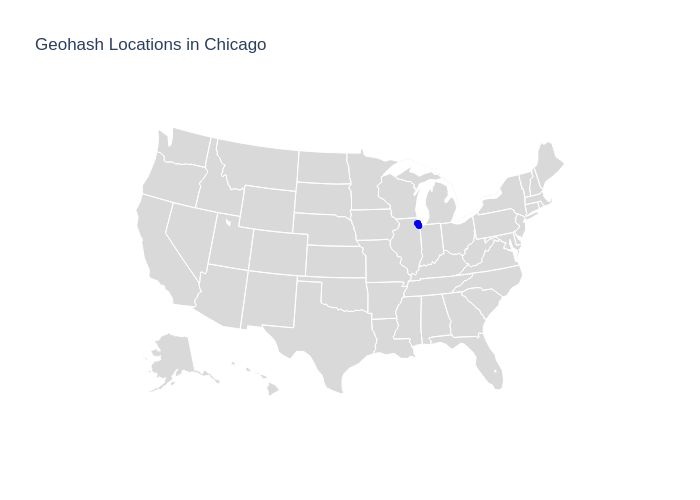

In [26]:


fig = go.Figure()

fig.add_trace(go.Scattergeo(
    lon = geo['LONGITUDE'],
    lat = geo['LATITUDE'],
    text = geo['geo_hash'],
    mode = 'markers',
    marker=dict(
        size=5,
        color='blue',
        opacity=0.6,
    )
))

fig.update_layout(
    title = 'Geohash Locations in Chicago',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showland = True,
        landcolor = "rgb(217, 217, 217)",
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
    ),
)


fig.show(renderer="png")

### [vii]

In [27]:
crash_features['geo_hash'].value_counts()

geo_hash
dp3wm    60055
dp3w7    40654
dp3wj    40593
dp3tw    36612
dp3we    33126
dp3wh    32378
dp3ws    31084
dp3wk    30803
dp3wt    30441
dp3tt    29088
dp3wu    28663
dp3w5    27947
dp3tu    26375
dp3wq    25244
dp3ts    24924
dp3tm    23032
dp3tq    22092
dp3ty    21562
dp3wd    20761
dp3wv    18988
dp3tv    18648
dp3w6    18427
dp3tg    17141
dp3te    17080
dp3wn    15977
dp3tx    14350
dp3wf    12000
dp3tr    11629
dp3tj    11316
dp3wg    10235
dp3tk     7980
dp3tn     7081
dp3w9     6823
dp3wc     6544
dp3xh     5917
dp3th     4780
dp3qz     4294
dp3tf     4180
dp3td     4152
dp3w4     3386
dp3t7     2962
dp3tp     1936
dp3sy     1867
dp3v2     1689
dp3sz     1479
dp3xj     1442
dp3v0     1403
dp3t5     1113
dp3tz      950
dp3w3      776
dp3wb      532
dp3x1      406
dp3qx      320
dp3x4      236
dp3ub      151
dp3w8      147
dp3sv      132
s0000       49
dp3qw        5
Name: count, dtype: int64

In [28]:
def crash_number_cat(cnt):
    if cnt <= 1000 :
        return 1
    elif cnt <= 10000 :
        return 2
    return 3

geo_cat  = crash_features['geo_hash'].value_counts().apply(crash_number_cat).reset_index()
geo_cat.columns = ['geo_hash' , 'geo_cat']
crash_features = pd.merge(crash_features , geo_cat , on = 'geo_hash' ,  how = 'left')


In [29]:
geo = pd.merge(geo , geo_cat , on = 'geo_hash')
geo

geo_hash   LATITUDE  LONGITUDE  geo_cat
0     dp3qw  41.960230 -87.934763        1
1     dp3qx  41.953766 -87.914197        1
2     dp3qz  41.976201 -87.905309        2
3     dp3sv  41.658951 -87.641118        1
4     dp3sy  41.657805 -87.609091        2
5     dp3sz  41.655398 -87.553065        2
6     dp3t5  41.690773 -87.720456        2
7     dp3t7  41.738468 -87.721764        2
8     dp3td  41.778878 -87.781589        2
9     dp3te  41.776241 -87.727790        3
10    dp3tf  41.793615 -87.774704        2
11    dp3tg  41.805154 -87.728313        3
12    dp3th  41.691706 -87.683764        2
13    dp3tj  41.685086 -87.642668        3
14    dp3tk  41.735188 -87.682377        2
15    dp3tm  41.729656 -87.645342        3
16    dp3tn  41.691451 -87.617173        2
17    dp3tp  41.688169 -87.549503        2
18    dp3tq  41.736145 -87.605192        3
19    dp3tr  41.729016 -87.565550        3
20    dp3ts  41.774699 -87.692520        3
21    dp3tt  41.767799 -87.649134        3
22    dp3tu  41.810452 -87.692207        3
23    dp3tv  41.809097 -87.646414        3
24    dp3tw  41.765675 -87.606263        3
25    dp3tx  41.764403 -87.572547        3
26    dp3ty  41.809265 -87.610004        3
27    dp3tz  41.797110 -87.581368        1
28    dp3ub  41.651748 -87.535175        1
29    dp3v0  41.700788 -87.535134        2
30    dp3v2  41.713762 -87.535431        2
31    dp3w3  41.916910 -87.805683        1
32    dp3w4  41.872873 -87.764845        2
33    dp3w5  41.866339 -87.728185        3
34    dp3w6  41.905262 -87.769399        3
35    dp3w7  41.899230 -87.737743        3
36    dp3w8  41.958453 -87.884018        1
37    dp3w9  41.945080 -87.811572        2
38    dp3wb  41.990359 -87.881293        1
39    dp3wc  41.984464 -87.812183        2
40    dp3wd  41.939131 -87.776086        3
41    dp3we  41.943172 -87.736720        3
42    dp3wf  41.982883 -87.778143        3
43    dp3wg  41.975328 -87.735570        3
44    dp3wh  41.859157 -87.695023        3
45    dp3wj  41.866971 -87.643886        3
46    dp3wk  41.900689 -87.690790        3
47    dp3wm  41.893338 -87.641120        3
48    dp3wn  41.865655 -87.621499        3
49    dp3wq  41.892559 -87.622610        3
50    dp3ws  41.941127 -87.696196        3
51    dp3wt  41.941056 -87.651324        3
52    dp3wu  41.990849 -87.691712        3
53    dp3wv  41.985641 -87.660472        3
54    dp3x1  42.014347 -87.806784        1
55    dp3x4  42.011883 -87.778564        1
56    dp3xh  42.015016 -87.687349        2
57    dp3xj  42.017134 -87.666197        2
58    s0000   0.000000   0.000000        1

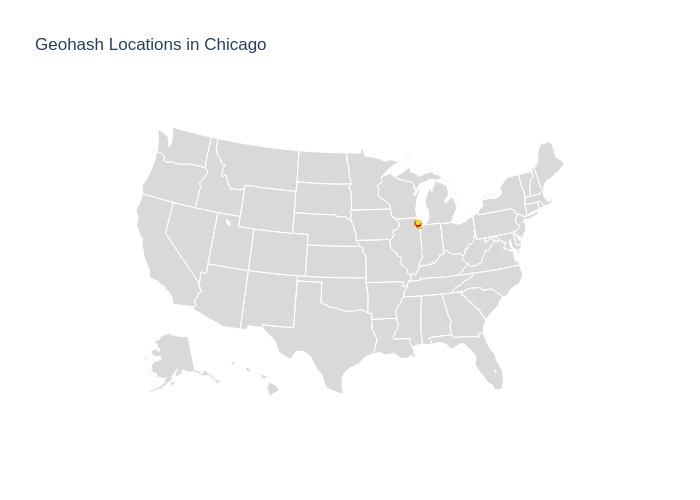

In [30]:
fig = go.Figure()


cat_col = {
    1 : 'gray',
    2: 'yellow',
    3: 'red',
}

col = geo['geo_cat'].map(cat_col)

fig.add_trace(go.Scattergeo(
    lon = geo['LONGITUDE'],
    lat = geo['LATITUDE'],
    text = geo['geo_hash'],
    mode = 'markers',
    marker=dict(
        size=5,
        color=col,
        opacity=0.6,
    )
))

fig.update_layout(
    title = 'Geohash Locations in Chicago',
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showland = True,
        landcolor = "rgb(217, 217, 217)",
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
    ),
)


fig.show(renderer="png")

### [viii]

In [31]:
chicago_street_features.head()

Unnamed: 0                                           the_geom  \
0           0  MULTILINESTRING ((-87.63187018232667 41.780809...   
1           1  MULTILINESTRING ((-87.60548932047061 41.762229...   
2           2  MULTILINESTRING ((-87.68381848191974 41.697243...   
3           3  MULTILINESTRING ((-87.645841892972 41.69339840...   
4           4  MULTILINESTRING ((-87.67053671318457 41.679759...   

      STREET_NAM STREET_TYP  STREETNAME CLASS STATUS DIR_TRAVEL      LENGTH  
0           YALE        AVE        1782     4      N          F  220.566014  
1  COTTAGE GROVE        AVE        1236     2      N          B  664.774635  
2       CAMPBELL        AVE        1177     4      N          B  665.378484  
3       SANGAMON         ST        1696     4      N          B  152.564889  
4          118TH         ST        1823     4      N          B  332.691371

In [32]:
chicago_street_features['length_km'] = chicago_street_features['LENGTH'] / 3280.84
chicago_street_features.head()

Unnamed: 0                                           the_geom  \
0           0  MULTILINESTRING ((-87.63187018232667 41.780809...   
1           1  MULTILINESTRING ((-87.60548932047061 41.762229...   
2           2  MULTILINESTRING ((-87.68381848191974 41.697243...   
3           3  MULTILINESTRING ((-87.645841892972 41.69339840...   
4           4  MULTILINESTRING ((-87.67053671318457 41.679759...   

      STREET_NAM STREET_TYP  STREETNAME CLASS STATUS DIR_TRAVEL      LENGTH  \
0           YALE        AVE        1782     4      N          F  220.566014   
1  COTTAGE GROVE        AVE        1236     2      N          B  664.774635   
2       CAMPBELL        AVE        1177     4      N          B  665.378484   
3       SANGAMON         ST        1696     4      N          B  152.564889   
4          118TH         ST        1823     4      N          B  332.691371   

   length_km  
0   0.067229  
1   0.202623  
2   0.202807  
3   0.046502  
4   0.101404

In [33]:
chicago_street_features['length_km'].max()

2.7307134886370563

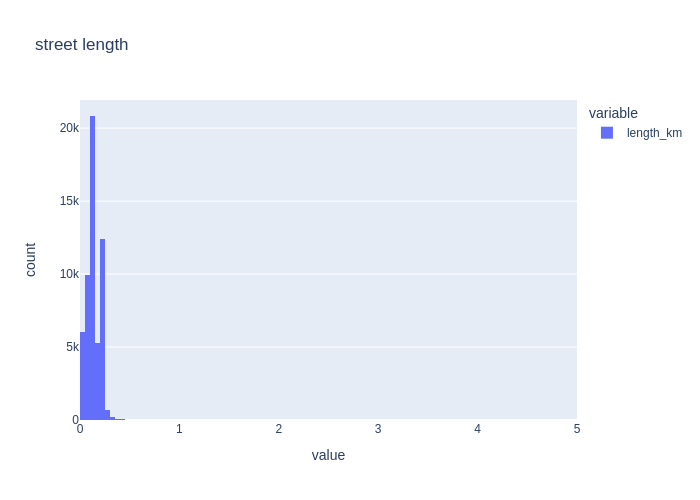

In [34]:

fig = px.histogram(chicago_street_features['length_km'])


fig = px.histogram(chicago_street_features['length_km'], nbins=100, range_x=[0, 5], title="street length")

fig.show(renderer="png")

In [35]:
def len_cat(str_len):
    if str_len <= 0.15 :
        return 'short'
    elif str_len <= 0.25:
        return  'medium'
    return 'long'

chicago_street_features['street_cat'] = chicago_street_features['length_km'].apply(len_cat)
chicago_street_features.head()


Unnamed: 0                                           the_geom  \
0           0  MULTILINESTRING ((-87.63187018232667 41.780809...   
1           1  MULTILINESTRING ((-87.60548932047061 41.762229...   
2           2  MULTILINESTRING ((-87.68381848191974 41.697243...   
3           3  MULTILINESTRING ((-87.645841892972 41.69339840...   
4           4  MULTILINESTRING ((-87.67053671318457 41.679759...   

      STREET_NAM STREET_TYP  STREETNAME CLASS STATUS DIR_TRAVEL      LENGTH  \
0           YALE        AVE        1782     4      N          F  220.566014   
1  COTTAGE GROVE        AVE        1236     2      N          B  664.774635   
2       CAMPBELL        AVE        1177     4      N          B  665.378484   
3       SANGAMON         ST        1696     4      N          B  152.564889   
4          118TH         ST        1823     4      N          B  332.691371   

   length_km street_cat  
0   0.067229      short  
1   0.202623     medium  
2   0.202807     medium  
3   0.046502      short  
4   0.101404      short

In [36]:
print("cash features :" , crash_features.columns)
print("street features : " , chicago_street_features.columns)

cash features : Index(['Unnamed: 0', 'CRASH_RECORD_ID', 'CRASH_DATE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_YEAR',
       'geo_hash', 'geo_cat'],
      dtype='object')
street features :  Index(['Unnamed: 0', 'the_geom', 'STREET_NAM', 'STREET_TYP', 'STREETNAME',
       'CLASS', 'STATUS', 'DIR_TRAVEL', 'LENGTH', 'length_km', 'street_cat'],
      dtype='object')


In [37]:
addition = ['AVE', 'AVENUE','BLVD', 'BOULEVARD',
'CRES', 'CRESCENT', 'COURT',
'CT', 'COURT',
'DR', 'DRIVE',
'ER', 'ENTRANCE', 'RAMP',
'EXPY', 'EXPRESSWAY',
'HWY', 'HIGHWAY',
'LN', 'LANE',
'PKWY', 'PARK', 'WAY',
'PL', 'PLACE',
'ROW', 'ROW',
'SQ', 'SQUARE',
'SR', 'SERVICE', 'ROAD',
'ST', 'STREET',
'TER', 'TERRACE',
'TOLL', 'TOLL', 'WAY',
'VIA', 'WAY',
'WAY', 'EXIT', 'RAMP',

'N', 'NORTH',
'S', 'SOUTH',
'E', 'EAST',
'W', 'WEST',
'OP', 'OVERPASS',
'IB' ,'INBOUND',
'OB' ,'OUTBOUND',
'NB', 'NORTHBOUND',
'SB' ,'SOUTHBOUND',
'EB' ,'EASTBOUND',
'WB' ,'WESTBOUND',
            ]

rep = {
 'PULASKIRD' :    'PULASKI' ,
'IRVINGRD'   :   'IRVING',
'ROOSEVELTRD'   :'ROOSEVELT',
'MARTINLUTHERKINGJRDR'  : 'MARTINLUTHERKINGJR'  ,
'SHERIDANRD'     : 'SHERIDAN',
'CERMAKRD'          : 'CERMAK',
'MARQUETTERD'          :'MARQUETTE',
'PERSHINGRD'           : 'PERSHING',
'LOWERWACKER'          : 'WACKER',
'TERMINAL'           : '',
'HOLLANDRD'          :'HOLLAND',
'CLAIRST'              : 'CLAIR',
'LOWERMICHIGAN'         :'MICHIGAN',
'RIVERRD'              : 'RIVER',
'HIGGINSRD'              :'HIGGINS',
'MANNHEIMRD'          : 'MANNHEIM',
'MCCORMICKRD'              :'MCCORMICK',
'I190':'',
'ZEMKERD'          :'ZEMKE' ,

'LOWERCOLUMBUS'            :'COLUMBUS',
'MARTINLUTHERKINGJRSD' :       'MARTINLUTHERKINGJR',
'LOWERRANDOLPH'     :'RANDOLPH',
'PARKINGLOTA':'',
'VANVLISSINGENRD' :'VANVLISSINGEN',
'LOWERWATER'     :'WATER'  ,
'PARKINGLOTD':'',
'RIVERSIDEPLZ':'RIVERSIDE' ,
'IDABWELLS':'',
'LOWERLAKESHORE'   :'LAKESHORE',
'LOWERSTETSON'      :'STETSON',
'PARKINGLOT':'' ,
'MERCHANDISEMARTPLZ' :'MERCHANDISEMART'    ,
'LOWERILLINOIS':'ILLINOIS' ,
'STATELINERD':'STATELINE',
'PARKINGLOTG':'',
'WOLFPOINTPLZ':'POINT',
'OGDENSD':'OGDEN',
'PARKINGLOTC':'',
'HELIPAD':'',
'PARKINGLOTB':'',
'RANDOLPHSD':'RANDOLPH',
'STONYISLANDSD':'STONYISLAND',
'MIDWAYAIRFIELD':'MIDWAY',
'DOOR3':'',
'PARKINGLOTF':'',
'DOOR4':'',
'DOOR2' :'',
'LOWERWABASH'  :'WABASH' ,
'KENNEDYEXPRESSRL':'KENNEDYEXPRESS',
'DANRYANXPRS':'',
'JAMESJOCONNORRD':'',
'KEDZIESD':'KEDZIE',
'PARKINGLOTSECG':'',
'INDIANRD':'INDIAN'  ,
'GULLIKSONRD':'GULLIKSON',
'HOTEL':'',
'DOOR1':'',
'TOWER':'',
'SPECIALOLYMPICS':'',
'LOWERWACKERXR':'WACKER',
'87THSD':'87TH',
'LOGANSD':'LOGAN',
'LOWERLASALLE':'LASALLE'                  ,
'MARKETPLACEACCESSRD':'MARKETPLACEACCESS',
'HUMBOLDTSD':'HUMBOLDT',
'PARKINGLOTMIDWAY' : '' ,
'MARYST':'MARY',
'NORFOLKRRACCESSRD':'NORFOLKRRACCESS',
'SHERMANSD':'SHERMAN',
'BELMONTHARBORACCESSRD':'BELMONTHARBORACCESS',
'STAGINGAREA' :'',
'LOWERHUBBARD':'HUBBARD',
'HELENST':'HELEN',
'JOHNSONRD':'JOHNSON',
'OHAREAVE.' :'OHARE',
'CALUMETACCESSRD':'CALUMETACCESS',
'DISTRICT':'',
'YALEG':'YALE',
'LAKESHORENB-RAMP':'LAKESHORE',
'SACRAMENTOSD':'SACRAMENTO',
'FRANKLINXR':'FRANKLIN',
'71S'               : '71ST' ,
'SACREMENTO' :'',
'CHECKPOINTSMALLPACKAGE':'POINT',
'MCFETRIDGESD':'MCFETRIDGE',
'RWY22L' :'',
'HELENJMIKOLS':'HELEN',
'GARLAND/LAKE' :   'GARLAND',
'FRANKLINSD'   :'FRANKLIN' ,
'23RDSTZHZ':'23RD',
'SG16':'',
'CHECKPOINT5':'POINT',
'CITYTOWER':'',
'SG25B1':'' ,
'OUTERARRIVAL':'',
'BOWLINGGREEN':'GREEN',
'1411LAKESHORE'   :'LAKESHORE',
'ARCHER/LEAVIT'   :'ARCHER',
'POST15'    :'POST' ,
'POST16'    :'POST',
'BELMONTLSDXR':'',
'LAWERENCE':'',
'MCCORMICKBLVD.':'',
'LASALLE/ILLINOIS'    :'LASALLE',
'MICHIGAN175CHESTNUTAVE'    :'MICHIGAN' ,
'BLOOMINGDALETRL'      :'',
'LAKESHOREINNER':'LAKESHORE',
'CENTRALSD':'CENTRAL',
'SERBIANRD':'SERBIAN',
'UPPERROADWAY'    :'',
}

def street_name_proceccing(text , addition):
    txt = text.split(' ')
    for i in addition :
        if i in txt :
            txt.remove(i)
    txt = ''.join(txt)
    if txt in rep:
        txt = rep[txt]
    return ''.join(txt)


In [38]:
chicago_street_features['new_STREET_NAM'] = chicago_street_features['STREET_NAM'].apply(lambda x : street_name_proceccing(x ,addition ))

In [39]:
crash_features['new_STREET_NAME'] = crash_features['STREET_NAME'].apply(lambda x : street_name_proceccing(x ,addition ))

In [40]:
crash_features_sample = crash_features.sample(n=10000)

merge_crash_street = pd.merge(crash_features_sample , chicago_street_features , left_on = 'new_STREET_NAME' , right_on = 'new_STREET_NAM' , how = 'left')

### [ix]

In [41]:
from shapely import wkt
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point , MultiPolygon


chicago_CBD['geo'] = chicago_CBD['the_geom'].apply(wkt.loads)
geo_df = gpd.GeoDataFrame(chicago_CBD)

geo_df

the_geom  OBJECTID      SUM_AREA  \
0  MULTIPOLYGON (((-87.62405822532047 41.90406015...         1  1.045633e+08   

                        NAME  AREA  LEN    SHAPE_AREA     SHAPE_LEN  \
0  Central Business District     0    0  1.122806e+08  61725.295967   

                                                 geo  
0  MULTIPOLYGON (((-87.62405822532047 41.90406015...

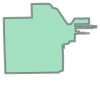

In [42]:
geo_df.loc[0, 'geo']

In [43]:
m_geom = MultiPolygon(geo_df.loc[0, 'geo'])

In [44]:
import pandas as pd
from shapely.geometry import Point, MultiPolygon, Polygon
from shapely.ops import nearest_points
from geopy.distance import geodesic


def calculate_distance(multi_polygon, x):
    point =wkt.loads(x)
    if multi_polygon.contains(point):
        return 0.0
    else:
        nearest_point = nearest_points(multi_polygon, point)[0]
        distance_km = geodesic((point.y, point.x), (nearest_point.y, nearest_point.x)).kilometers
        return distance_km



crash_features['dist_from_CBD'] = crash_features.apply(lambda x : calculate_distance(m_geom, x['LOCATION']) , axis = 1)

crash_features.head()

Unnamed: 0                                    CRASH_RECORD_ID  \
0           0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...   
1           1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...   
2           2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...   
3           3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...   
4           4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...   

               CRASH_DATE WEATHER_CONDITION LIGHTING_CONDITION  \
0  08/18/2023 12:50:00 PM             CLEAR           DAYLIGHT   
1  07/29/2023 02:45:00 PM             CLEAR           DAYLIGHT   
2  08/18/2023 05:58:00 PM             CLEAR           DAYLIGHT   
3  11/26/2019 08:38:00 AM             CLEAR           DAYLIGHT   
4  08/18/2023 10:45:00 AM             CLEAR           DAYLIGHT   

       FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  LANE_CNT  \
0              REAR END                            OTHER       2.0   
1  PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)       4.0   
2          PEDALCYCLIST                      NOT DIVIDED       1.0   
3            PEDESTRIAN                          ONE-WAY       3.0   
4          FIXED OBJECT                            OTHER       3.0   

            ALIGNMENT ROADWAY_SURFACE_COND  ... CRASH_DAY_OF_WEEK CRASH_MONTH  \
0  STRAIGHT AND LEVEL                  DRY  ...                 6           8   
1  STRAIGHT AND LEVEL                  DRY  ...                 7           7   
2  STRAIGHT AND LEVEL                  DRY  ...                 6           8   
3      CURVE ON GRADE                  DRY  ...                 3          11   
4  STRAIGHT AND LEVEL                  DRY  ...                 6           8   

    LATITUDE  LONGITUDE                                  LOCATION CRASH_YEAR  \
0  41.976201 -87.905309  POINT (-87.905309125103 41.976201139024)       2023   
1  41.854120 -87.665902  POINT (-87.665902342962 41.854120262952)       2023   
2  41.942976 -87.761883  POINT (-87.761883496974 41.942975745006)       2023   
3  41.976201 -87.905309   POINT(-87.905309125103 41.976201139024)       2019   
4  41.976201 -87.905309   POINT(-87.905309125103 41.976201139024)       2023   

   geo_hash geo_cat new_STREET_NAME  dist_from_CBD  
0     dp3qz       2           OHARE      23.113258  
1     dp3wj       3         ASHLAND       2.126818  
2     dp3wd       3            LONG      10.775932  
3     dp3qz       2                      23.113258  
4     dp3qz       2                      23.113258  

[5 rows x 31 columns]

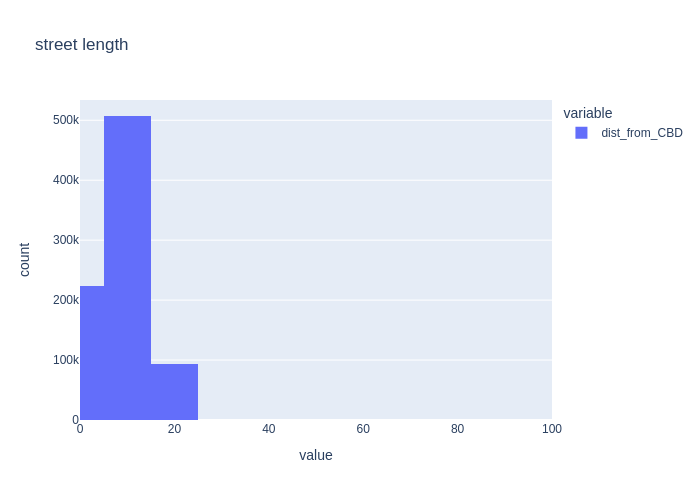

In [45]:
fig = px.histogram(crash_features['dist_from_CBD'])
fig = px.histogram(crash_features['dist_from_CBD'], nbins=1000, range_x=[0, 100], title="street length")
fig.show(renderer="png")

In [46]:
def CBD_approximity(dist):
    if dist <= 5 :
        return 'near'
    elif dist <= 15 :
        return 'medium'
    return 'far'


crash_features['CBD_approximity'] = crash_features['dist_from_CBD'].apply(CBD_approximity)

### [x]

In [47]:
crash_features['inside_CBD_i'] = crash_features['dist_from_CBD'].apply(lambda x : 1 if x == 0 else 0)

In [48]:
crash_features.head()

Unnamed: 0                                    CRASH_RECORD_ID  \
0           0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...   
1           1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...   
2           2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...   
3           3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...   
4           4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...   

               CRASH_DATE WEATHER_CONDITION LIGHTING_CONDITION  \
0  08/18/2023 12:50:00 PM             CLEAR           DAYLIGHT   
1  07/29/2023 02:45:00 PM             CLEAR           DAYLIGHT   
2  08/18/2023 05:58:00 PM             CLEAR           DAYLIGHT   
3  11/26/2019 08:38:00 AM             CLEAR           DAYLIGHT   
4  08/18/2023 10:45:00 AM             CLEAR           DAYLIGHT   

       FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  LANE_CNT  \
0              REAR END                            OTHER       2.0   
1  PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)       4.0   
2          PEDALCYCLIST                      NOT DIVIDED       1.0   
3            PEDESTRIAN                          ONE-WAY       3.0   
4          FIXED OBJECT                            OTHER       3.0   

            ALIGNMENT ROADWAY_SURFACE_COND  ...   LATITUDE  LONGITUDE  \
0  STRAIGHT AND LEVEL                  DRY  ...  41.976201 -87.905309   
1  STRAIGHT AND LEVEL                  DRY  ...  41.854120 -87.665902   
2  STRAIGHT AND LEVEL                  DRY  ...  41.942976 -87.761883   
3      CURVE ON GRADE                  DRY  ...  41.976201 -87.905309   
4  STRAIGHT AND LEVEL                  DRY  ...  41.976201 -87.905309   

                                   LOCATION CRASH_YEAR geo_hash geo_cat  \
0  POINT (-87.905309125103 41.976201139024)       2023    dp3qz       2   
1  POINT (-87.665902342962 41.854120262952)       2023    dp3wj       3   
2  POINT (-87.761883496974 41.942975745006)       2023    dp3wd       3   
3   POINT(-87.905309125103 41.976201139024)       2019    dp3qz       2   
4   POINT(-87.905309125103 41.976201139024)       2023    dp3qz       2   

   new_STREET_NAME dist_from_CBD CBD_approximity  inside_CBD_i  
0            OHARE     23.113258             far             0  
1          ASHLAND      2.126818            near             0  
2             LONG     10.775932          medium             0  
3                      23.113258             far             0  
4                      23.113258             far             0  

[5 rows x 33 columns]

### [xi]

In [49]:
chicago_police_features['geo'] = chicago_police_features['the_geom'].apply(wkt.loads)

In [50]:
# def police_beat(police_df , pnt):
#     point =wkt.loads(pnt)

#     for index, i in police_df.iterrows():
#         mp = i.loc['geo']
#         if mp.contains(point):
#             return  i['BEAT_NUM']


# crash_features['BEAT_NUM'] = crash_features['LOCATION'].apply(lambda x : police_beat(chicago_police_features , x))


In [51]:
pip install rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.2/535.2 kB 5.4 MB/s eta 0:00:00


In [52]:
from rtree import index


idx = index.Index()
for i, geom in enumerate(chicago_police_features['geo']):
    idx.insert(i, geom.bounds)

def police_beat(police_df, spatial_index, pnt):
    point = wkt.loads(pnt)
    possible_matches = list(spatial_index.intersection(point.bounds))
    min_distance = float('inf')
    nearest_beat_num = None
    for i in possible_matches:
        polygon = police_df.iloc[i].loc['geo']
        if polygon.contains(point):
            return police_df.iloc[i]['BEAT_NUM']
        else:
            nearest_point = nearest_points(polygon, point)[0]
            distance = point.distance(nearest_point)
            if distance < min_distance:
                min_distance = distance
                nearest_beat_num = police_df.iloc[i]['BEAT_NUM']
    return nearest_beat_num


crash_features['BEAT_NUM'] = crash_features['LOCATION'].apply(lambda x: police_beat(chicago_police_features, idx, x))


crash_features.head()

Unnamed: 0                                    CRASH_RECORD_ID  \
0           0  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...   
1           1  5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...   
2           2  61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...   
3           3  004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...   
4           4  a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...   

               CRASH_DATE WEATHER_CONDITION LIGHTING_CONDITION  \
0  08/18/2023 12:50:00 PM             CLEAR           DAYLIGHT   
1  07/29/2023 02:45:00 PM             CLEAR           DAYLIGHT   
2  08/18/2023 05:58:00 PM             CLEAR           DAYLIGHT   
3  11/26/2019 08:38:00 AM             CLEAR           DAYLIGHT   
4  08/18/2023 10:45:00 AM             CLEAR           DAYLIGHT   

       FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  LANE_CNT  \
0              REAR END                            OTHER       2.0   
1  PARKED MOTOR VEHICLE  DIVIDED - W/MEDIAN (NOT RAISED)       4.0   
2          PEDALCYCLIST                      NOT DIVIDED       1.0   
3            PEDESTRIAN                          ONE-WAY       3.0   
4          FIXED OBJECT                            OTHER       3.0   

            ALIGNMENT ROADWAY_SURFACE_COND  ...  LONGITUDE  \
0  STRAIGHT AND LEVEL                  DRY  ... -87.905309   
1  STRAIGHT AND LEVEL                  DRY  ... -87.665902   
2  STRAIGHT AND LEVEL                  DRY  ... -87.761883   
3      CURVE ON GRADE                  DRY  ... -87.905309   
4  STRAIGHT AND LEVEL                  DRY  ... -87.905309   

                                   LOCATION CRASH_YEAR geo_hash geo_cat  \
0  POINT (-87.905309125103 41.976201139024)       2023    dp3qz       2   
1  POINT (-87.665902342962 41.854120262952)       2023    dp3wj       3   
2  POINT (-87.761883496974 41.942975745006)       2023    dp3wd       3   
3   POINT(-87.905309125103 41.976201139024)       2019    dp3qz       2   
4   POINT(-87.905309125103 41.976201139024)       2023    dp3qz       2   

  new_STREET_NAME  dist_from_CBD CBD_approximity inside_CBD_i  BEAT_NUM  
0           OHARE      23.113258             far            0    1652.0  
1         ASHLAND       2.126818            near            0    1235.0  
2            LONG      10.775932          medium            0    1633.0  
3                      23.113258             far            0    1652.0  
4                      23.113258             far            0    1652.0  

[5 rows x 34 columns]

### [xii]

# Question [2]: Data Analysis and Information Discovery

## [a] Traffic Accidents Causes


### [i]

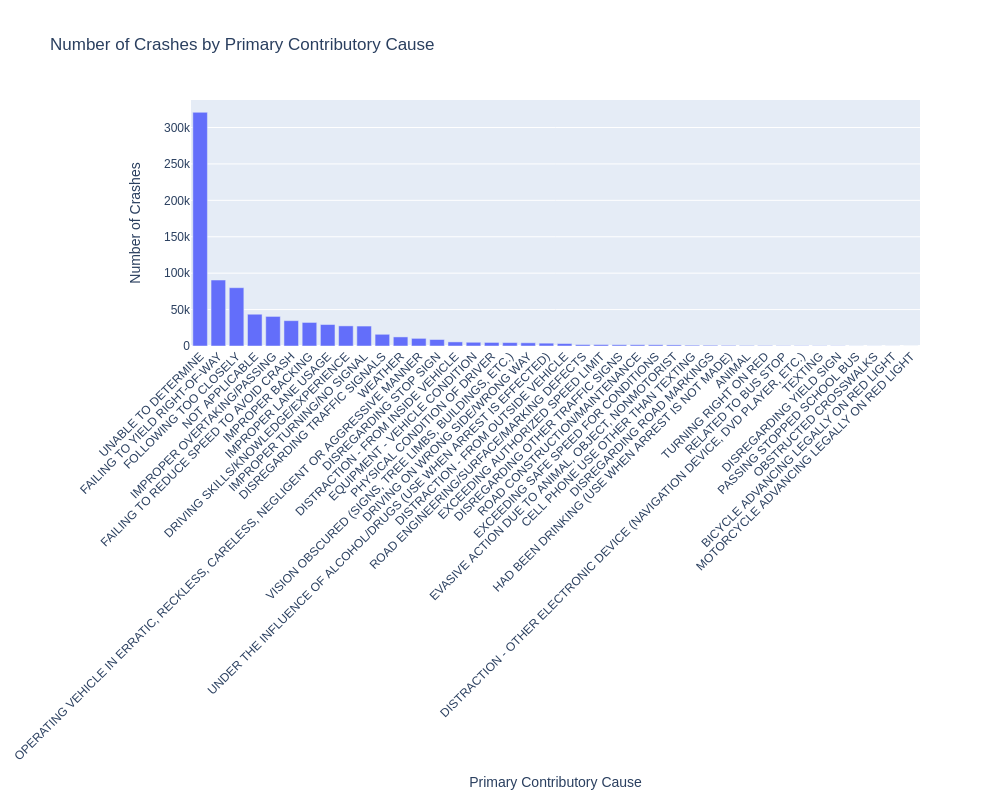

In [53]:
cause_counts = crash_features['PRIM_CONTRIBUTORY_CAUSE'].value_counts().reset_index()
cause_counts.columns = ['PRIM_CONTRIBUTORY_CAUSE', 'Crash Count']

fig = px.bar(cause_counts, x='PRIM_CONTRIBUTORY_CAUSE', y='Crash Count',
             title='Number of Crashes by Primary Contributory Cause',
             labels={'PRIM_CONTRIBUTORY_CAUSE': 'Primary Contributory Cause', 'Crash Count': 'Number of Crashes'},
             width=1000, height=800)

fig.update_layout(xaxis_tickangle=-45)

fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
 في غالب الحالات لايمكن تحديد السبب الرئيسيس للحادث
</div>

### [ii]

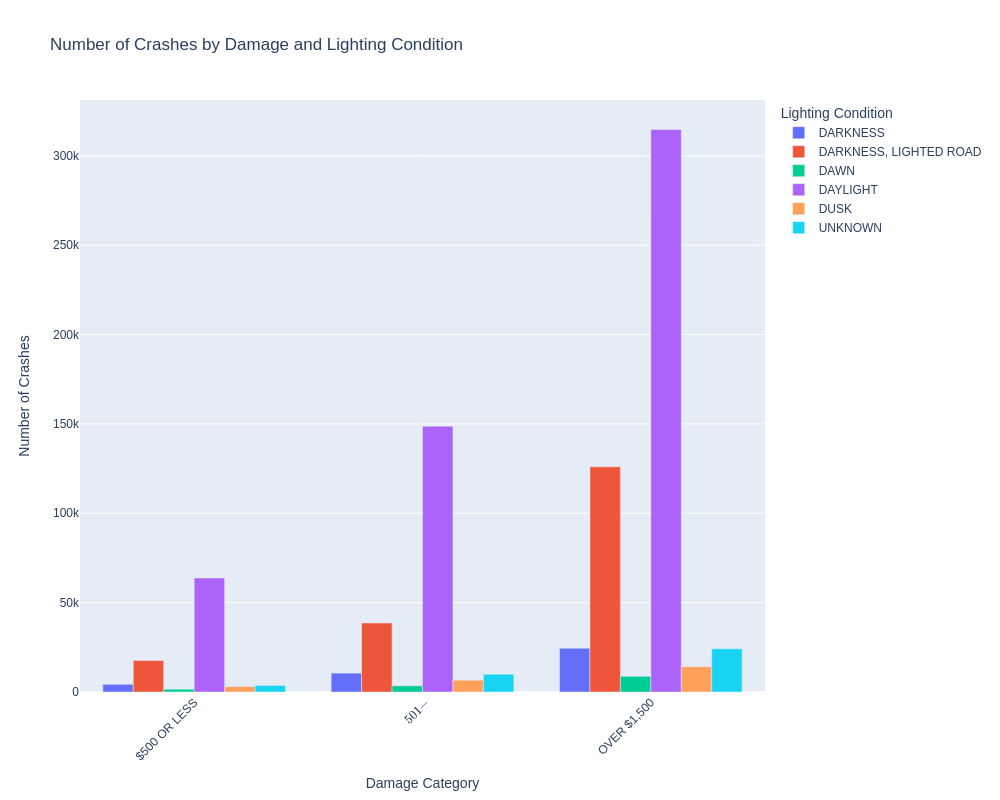

In [54]:
damage_lighting_counts = crash_features.groupby(['DAMAGE', 'LIGHTING_CONDITION']).size().reset_index(name='Crash Count')

fig = px.bar(damage_lighting_counts, x='DAMAGE', y='Crash Count', color='LIGHTING_CONDITION',
             title='Number of Crashes by Damage and Lighting Condition',
             labels={'DAMAGE': 'Damage Category', 'Crash Count': 'Number of Crashes', 'LIGHTING_CONDITION': 'Lighting Condition'},
             barmode='group', width=1000, height=800)

fig.update_layout(xaxis_tickangle=-45)


fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
 معظم الحوادث تكون خلال النهار او في الظلام ولكن في الطرقات المضاءة وهي نتيجة مفاجاة ولكن قد يرجع السبب الى انعكاس الاضواء في عيون السائقين او التركيز في المشاهد المحيطة بالسائق بدلا من التركيز على القيادة والطريق ,

 كما ان معظم الحوادث من فئةالضرر العالية التي تتجاوز 1500$ وقد يرجع ارتفاع الضرر الى اكثر من سبب منها شدة الحادث او ارتفاع تكلفة الصيانة للاليات والعلاج للاشخاص في مدينة شيكاغو
</div>

### [iii]

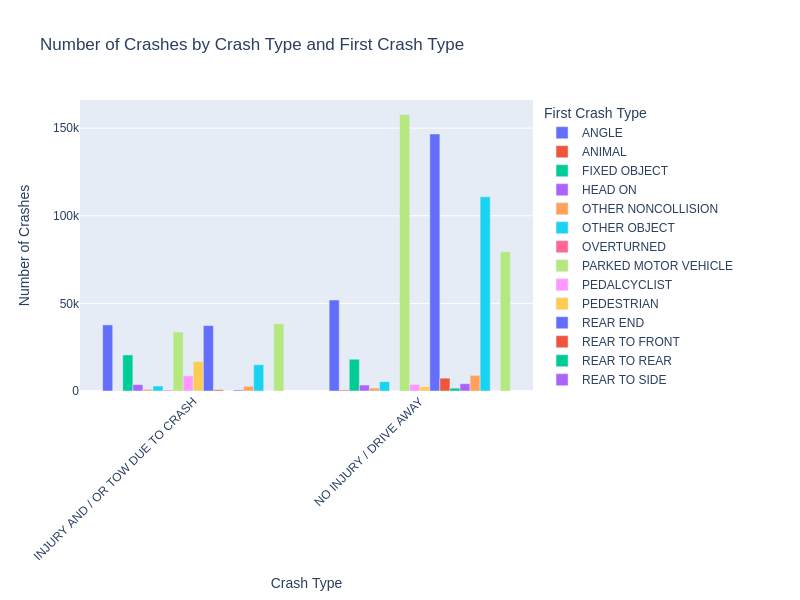

In [55]:
crash_type_counts = crash_features.groupby(['CRASH_TYPE', 'FIRST_CRASH_TYPE']).size().reset_index(name='Crash Count')

fig = px.bar(crash_type_counts, x='CRASH_TYPE', y='Crash Count', color='FIRST_CRASH_TYPE',
             title='Number of Crashes by Crash Type and First Crash Type',
             labels={'CRASH_TYPE': 'Crash Type', 'Crash Count': 'Number of Crashes', 'FIRST_CRASH_TYPE': 'First Crash Type'},
             barmode='group', width=800, height=600)


fig.update_layout(xaxis_tickangle=-45)

fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
 معظم الحوادث هي بدون اصابات لان اكثر تكون مع اليات متوقفة عن الحركة وغالبا بدون اي اشخاص داخلها , اوتكون اصطدام بجدار مغلق اوبنهاية الطريق

</div>

### [iv]

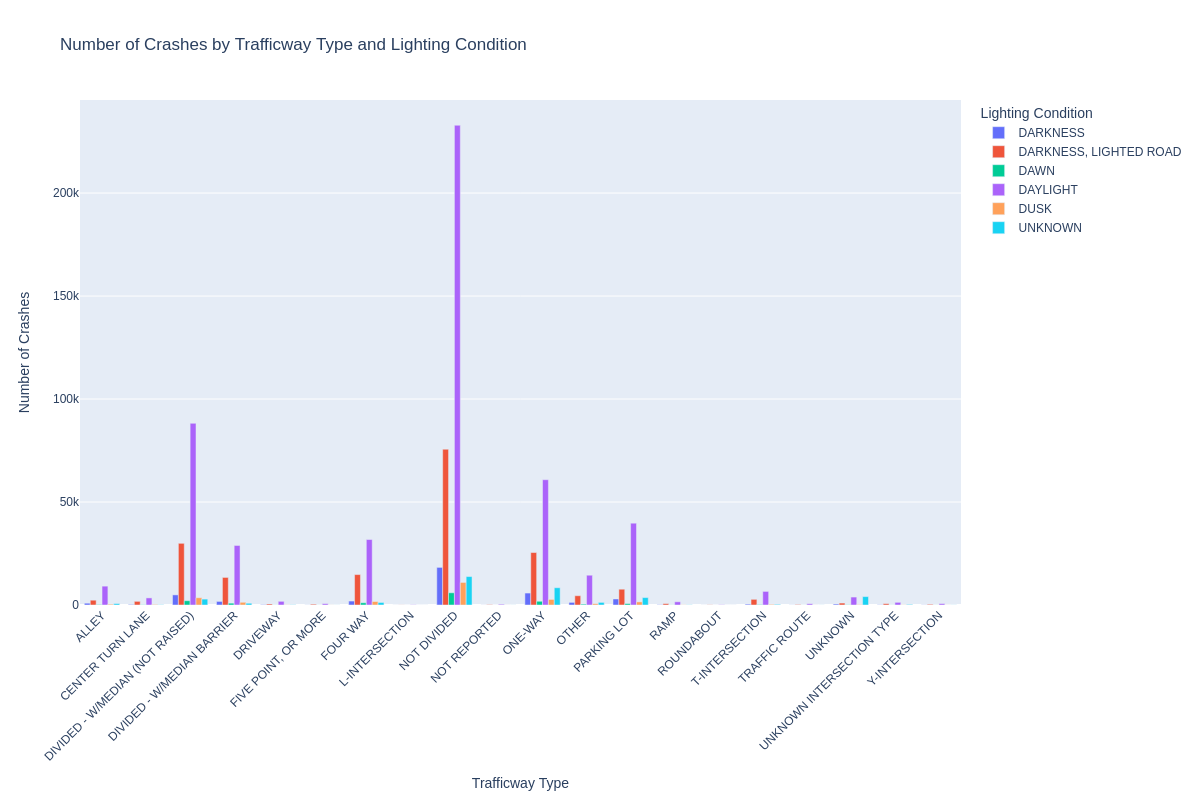

In [56]:
trafficway_lighting_counts = crash_features.groupby(['TRAFFICWAY_TYPE', 'LIGHTING_CONDITION']).size().reset_index(name='Crash Count')

fig = px.bar(trafficway_lighting_counts, x='TRAFFICWAY_TYPE', y='Crash Count', color='LIGHTING_CONDITION',
             title='Number of Crashes by Trafficway Type and Lighting Condition',
             labels={'TRAFFICWAY_TYPE': 'Trafficway Type', 'Crash Count': 'Number of Crashes', 'LIGHTING_CONDITION': 'Lighting Condition'},
             barmode='group', width=1200, height=800)

fig.update_layout(xaxis_tickangle=-45)


fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
  من الرسم السابق نجد ان معظم الحوادث المرورية تحدث خلال النهار وهي من النتائج المفاجئة ,

  كما ان اكثر الحوادث تحدث في الطرقات غير المقسمة وهي نتيجة طبيعية ومتوقعة حيث اختلاف اتجاه السيارات ونداخلها في الطريق الواحد يرفع من احتمالية الحوادث بشكل كبير
</div>

## [b] Traffic Accidents History


### [i]

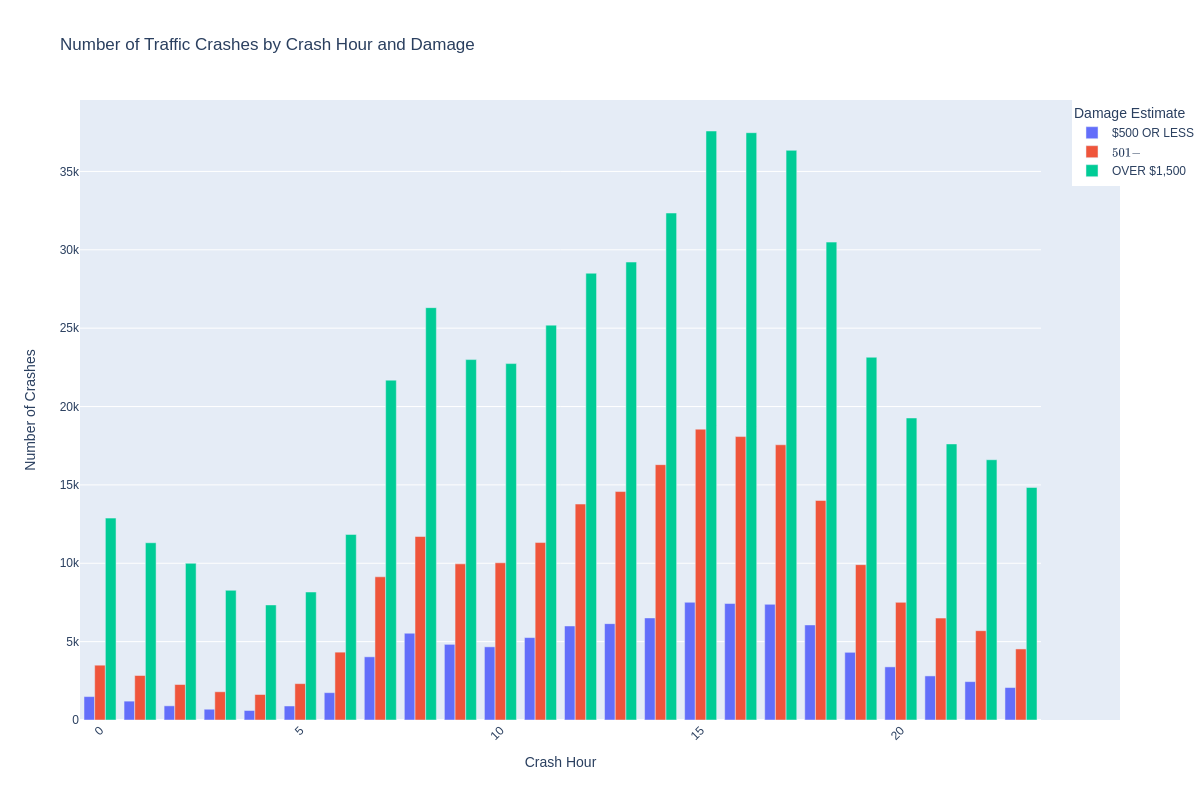

In [57]:
hour_damage_counts = crash_features.groupby(['CRASH_HOUR', 'DAMAGE']).size().reset_index(name='Crash Count')


fig = px.bar(hour_damage_counts, x='CRASH_HOUR', y='Crash Count', color='DAMAGE',
             title='Number of Traffic Crashes by Crash Hour and Damage',
             labels={'CRASH_HOUR': 'Crash Hour', 'Crash Count': 'Number of Crashes', 'DAMAGE': 'Damage Estimate'},
             barmode='group', width=1200, height=800)

fig.update_layout(xaxis_tickangle=-45)


fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
 تكون نسبة الحوادث اثناء الليل منخفضة بشكل كبير بين الساعة ال 1 ليلا والساعة ال 6 صباحا وهي الفترات الاقل نشاطا مروريا بشكل عام ,
 ويكون عدد الحوادث مرتفعا عند الساعة الثامنة صباحا خلال فترة الذهاب الى العمل او المدارس والجامعات ,

وتبلغ ذروة الحوادث بين الساعة ال 3 وال 5 مساءا وهي فترات انتهاء العمل واكثر لفترات ازدحاما مروريا في اي مكان

وتبدا الحوادث بالانخفاض بعد الساعة التاسعة مساءا مع انخفاض الحركة المرورية في الطرقات
</div>

### [ii]

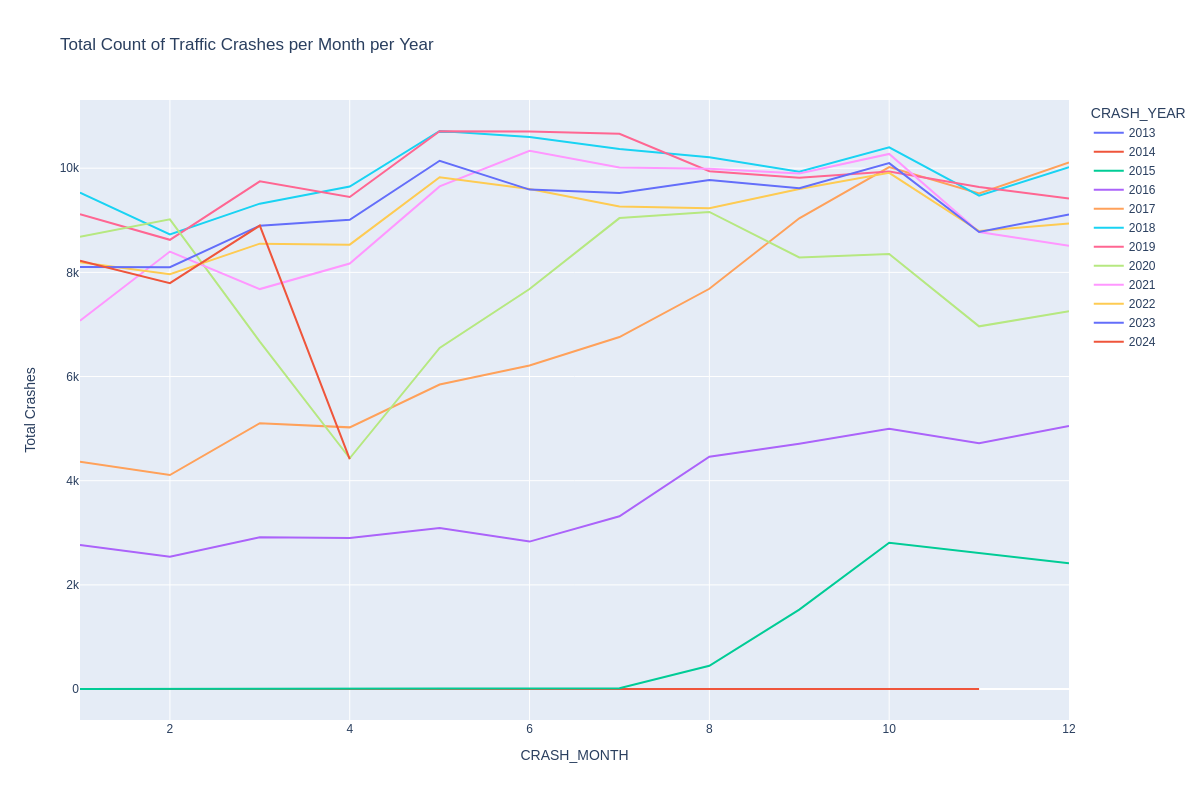

In [58]:
monthly_counts = crash_features.groupby(['CRASH_YEAR', 'CRASH_MONTH']).size().reset_index(name='Crash Count')


fig = px.line(monthly_counts, x='CRASH_MONTH', y='Crash Count', color='CRASH_YEAR',
              title='Total Count of Traffic Crashes per Month per Year',
              labels={'Month': 'Month', 'Crash Count': 'Total Crashes', 'Year': 'Year'},
              width=1200, height=800)

fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
عدد الحوادث المسجلة في الاعوام 2013 و 2014 و 2015 قليلة جدا مما قد يعني ان الاحصائية لم تكن شاملة الا لعينة صغيرة من الحوادث خلال تلك السنوات ,

في بداية العام 2020 انخفضت الحوادث بشكل كبير وغالبا تشير هذه الفترة الى فترة انتشار فيروس كورونا وحظر التجوال في الطرقات

ما عدا ذلك فان ذروة الحوادث في الشهر ال 6 و 7 و 10  وهي فترات العطل وبداية الجامعات والمدارس,

</div>

### [iii]

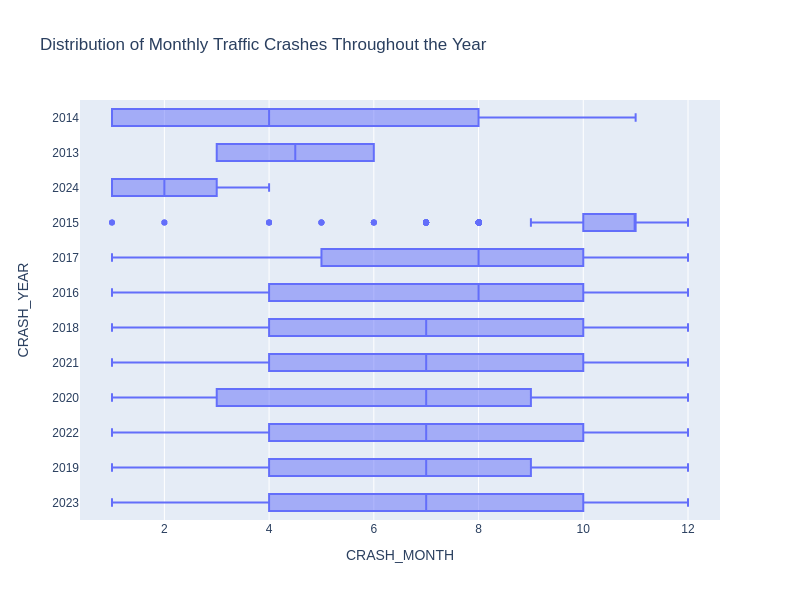

In [59]:
fig = px.box(crash_features, x='CRASH_MONTH', y='CRASH_YEAR',
             title='Distribution of Monthly Traffic Crashes Throughout the Year',
             labels={'Month': 'Month', 'CRASH_DATE': 'Crash Date'},
             width=800, height=600)


fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
في عام  2014 و 2024 تركز الحوادث في الاشهر الاولى من السنة ,

اما في العام 2015 تركزت الحوادث في الشهرين 10 و 11 وقد يرجع السبب في ذلك الى ان شيكاغو في هذه الفترة تعرضت لاقسى عاصفة ثلجية منذ عام 1975 فمن الممكن ان يرجع سبب كثرة الحوادث في هذه الفترة الى العاصفة ,

اما بقية السنوات فقد توزعت الحوادث بين الشهر 4 و ال 10 , وتتركز بشكل خاص بين الشهرين السادس والتاسع حيث تعتبر هذه الاشهر من اخطر الفترات بالنسبة للحوادث المرورية في امريكا ككل حيث انها فترات رحلات الاجازات وبدايات المدارس والجامعات وتشهد هذه الفترات وجود سائقين جدد من فئة الشباب صغيري العمر مما يؤدي الى ارتفاع احتمالات الحوادث وخطورتها

</div>

### [iv]

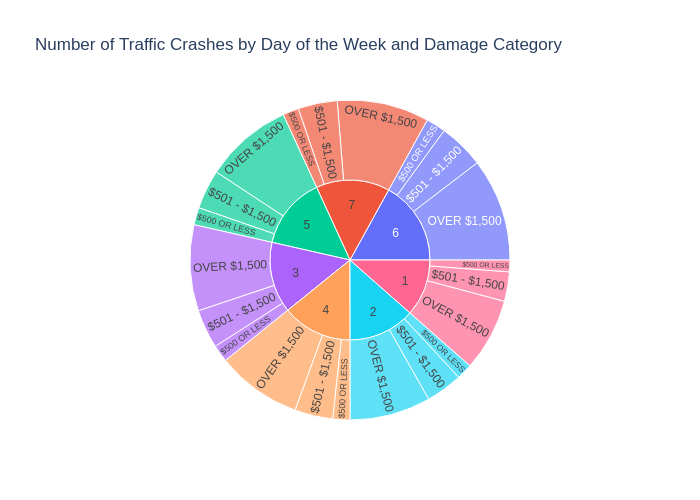

In [60]:
fig = px.sunburst(crash_features, path=['CRASH_DAY_OF_WEEK', 'DAMAGE'], values='CRASH_HOUR',
                  title='Number of Traffic Crashes by Day of the Week and Damage Category',
                  labels={'CRASH_DAY_OF_WEEK': 'Day of the Week', 'DAMAGE': 'Damage Category', 'CRASH_HOUR': 'Number of Crashes'})


fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
اعلى نسبة حوادث هي في ايام نهاية الاسبوع في يحن ان الحوادث في بداية الاسبوع تكون اقل ,

معظم الحوادث هي من صنف الضرر المقدر باكثر من 1500$
</div>

## [c] Spatial Analysis


### [i]

In [61]:
crash_features.columns

Index(['Unnamed: 0', 'CRASH_RECORD_ID', 'CRASH_DATE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_YEAR',
       'geo_hash', 'geo_cat', 'new_STREET_NAME', 'dist_from_CBD',
       'CBD_approximity', 'inside_CBD_i', 'BEAT_NUM'],
      dtype='object')

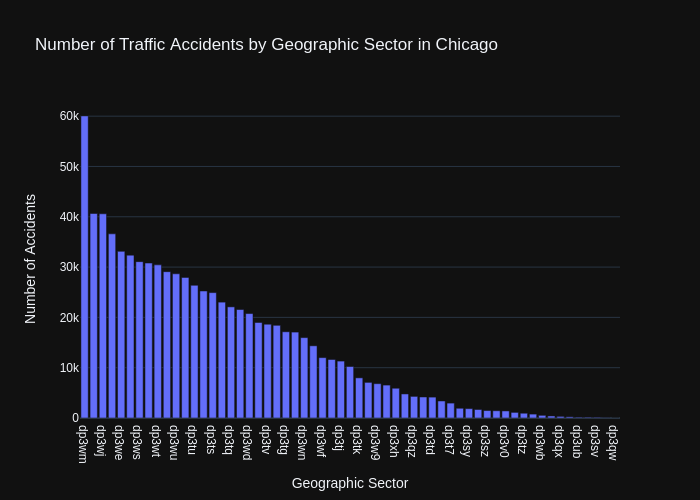

In [62]:
crash_counts = crash_features['geo_hash'].value_counts().reset_index()
crash_counts.columns = ['geo_hash', 'Number_of_Crashes']


fig = px.bar(crash_counts, x='geo_hash', y='Number_of_Crashes',
             title='Number of Traffic Accidents by Geographic Sector in Chicago',
             labels={'geo_hash': 'Geographic Sector', 'Number_of_Crashes': 'Number of Accidents'},
             template='plotly_dark')


fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
نلاحظ ان معظم الحوادث تتركز في بقع جيوغرافية معينة وبعض البقع الجيوغرافية الاخرى تكاد الحوادث تكون معدومة فيها
</div>

### [ii]

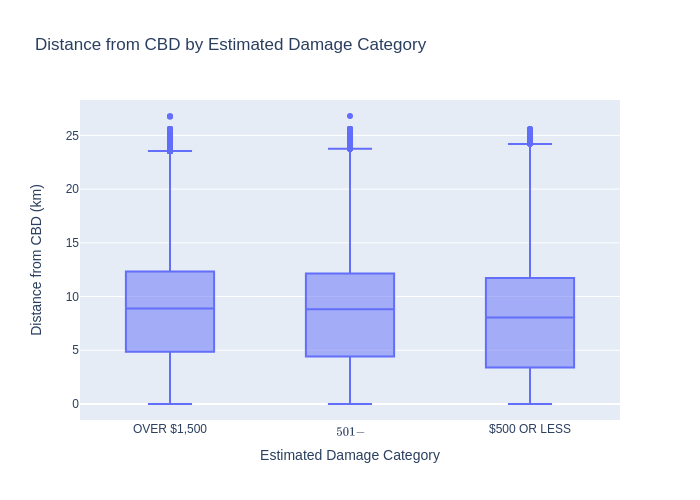

In [63]:
df = crash_features[crash_features['dist_from_CBD'] <= 1000]
fig = px.box(df, x='DAMAGE', y='dist_from_CBD', title='Distance from CBD by Estimated Damage Category')
fig.update_layout(xaxis_title='Estimated Damage Category', yaxis_title='Distance from CBD (km)')
fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
انواع الضرر الثلاث تقريبا لها نفس التوزع لذلك فان الرسم السابق لا يعطي معلومات ذات اهمية الا انه يمكن استنتاج ان معظم الحوادث تقع في على مسافة من 4 الى 12 كيلومتر عن المنطقة الصناعية
</div>

### [iii]

In [64]:
chicago_street_features.columns

Index(['Unnamed: 0', 'the_geom', 'STREET_NAM', 'STREET_TYP', 'STREETNAME',
       'CLASS', 'STATUS', 'DIR_TRAVEL', 'LENGTH', 'length_km', 'street_cat',
       'new_STREET_NAM'],
      dtype='object')

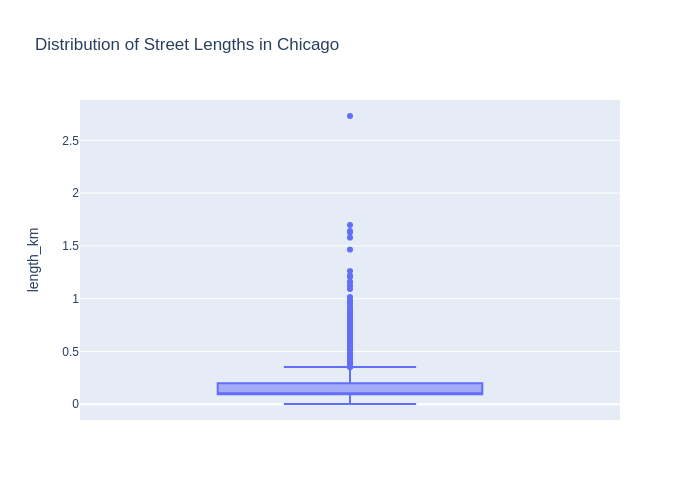

In [65]:
fig = px.box(chicago_street_features, y='length_km', title='Distribution of Street Lengths in Chicago')

fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
معظم الطرق تتراوح اطوالها بين 100 و 200 متر مما يعني غالبا ان المقصود هو اجزاء الطرق وليس طرق كاملة
</div>

### [iv]

In [66]:
merge_crash_street.columns

Index(['Unnamed: 0_x', 'CRASH_RECORD_ID', 'CRASH_DATE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_YEAR',
       'geo_hash', 'geo_cat', 'new_STREET_NAME', 'Unnamed: 0_y', 'the_geom',
       'STREET_NAM', 'STREET_TYP', 'STREETNAME', 'CLASS', 'STATUS',
       'DIR_TRAVEL', 'LENGTH', 'length_km', 'street_cat', 'new_STREET_NAM'],
      dtype='object')

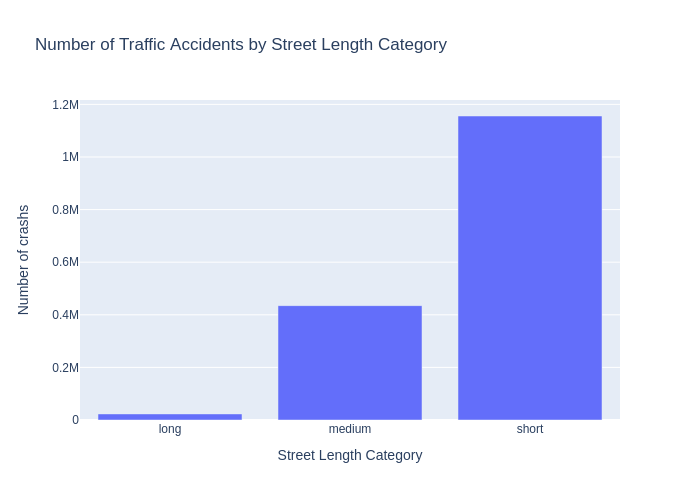

In [67]:
crashs_by_length = merge_crash_street.groupby('street_cat').size().reset_index(name='crash count')


fig = px.bar(crashs_by_length, x='street_cat', y='crash count',
             labels={'street_cat': 'Street Length Category', 'crash count': 'Number of crashs'},
             title='Number of Traffic Accidents by Street Length Category')

fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
ترجع قلة عدد الحوادث في الطرقات الطويلة الى قلة عدد الطرقات الطولة بالدرجة الاولى وغالبا الطرقات الطويلة تكون اوسع والحركة المرورية فيها تكون اوضح ومريحة اكثر للسائقين ,

اما الطرقات القصيرة عادة تكون ضيقة والازدحام يكون كبيرا فيها مما يؤدي الى التوتر عند السائقين او عدم وضوح المشهد مما يسبب الكثير من الحوادث والتصادمات
</div>

### [v]

In [68]:
crash_features.columns

Index(['Unnamed: 0', 'CRASH_RECORD_ID', 'CRASH_DATE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_YEAR',
       'geo_hash', 'geo_cat', 'new_STREET_NAME', 'dist_from_CBD',
       'CBD_approximity', 'inside_CBD_i', 'BEAT_NUM'],
      dtype='object')

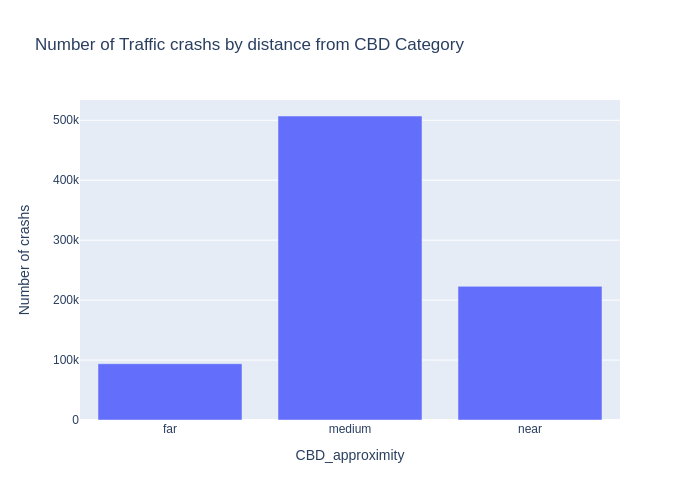

In [69]:
dist_df = crash_features.groupby('CBD_approximity').size().reset_index(name='dist count')


fig = px.bar(dist_df, x='CBD_approximity', y='dist count',
             labels={'dist_from_CBD': 'CBD dist Category', 'dist count': 'Number of crashs'},
             title='Number of Traffic crashs by distance from CBD Category')

fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
معظم الحوادث تقع على مسافة متوسطة البعد عن المنطقة الصناعية ,

اقل نسبة حوادث تقع في المناطق البعيدة عن المنطق الصناعية ,

ممكن ان يرجع السبب الى ان اكثر المناطق المرورية نشاطة هي المناطق المحيطة في المناطق الصناعية اما المناطق البعيدة تكون غالبا ضواحي ومناطق نائية فتكون الحركة المرورية فيها قليلة بشكل عام ,

اما المناطق القريبة من المنطقة الصناعية او داخل المنطقة الصناعية فتقل الحوادث لان فترة الحركة المرورية فيها غالبا تكون محدودة باوقات العمل وتنخفض الحركة فيها بشكل كبير في الاوقات الاخرى
</div>

### [vi]

## [d] Passengers Cases Analysis


### [i]

In [70]:
crash_people_features.columns

Index(['Unnamed: 0', 'PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID',
       'VEHICLE_ID', 'CRASH_DATE', 'CITY', 'STATE', 'SEX', 'AGE'],
      dtype='object')

In [71]:
sample_people = crash_people_features.sample(n = 10000)
people_v_merge = pd.merge(sample_people , crash_vehicles_features , on = 'VEHICLE_ID' , how = 'left')

In [72]:
people_v_merge.columns

Index(['Unnamed: 0_x', 'PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID_x',
       'VEHICLE_ID', 'CRASH_DATE_x', 'CITY', 'STATE', 'SEX', 'AGE',
       'Unnamed: 0_y', 'CRASH_UNIT_ID', 'CRASH_RECORD_ID_y', 'CRASH_DATE_y',
       'UNIT_NO', 'UNIT_TYPE', 'MAKE', 'MODEL', 'VEHICLE_YEAR',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION',
       'MANEUVER', 'OCCUPANT_CNT', 'number_of_vehicles_in_crash', 'crach_year',
       'vehicle_age', 'vehicle_class', 'class_in_crash'],
      dtype='object')

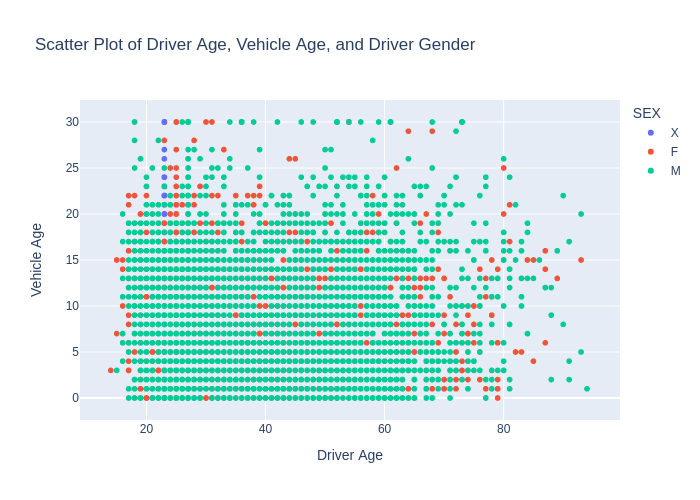

In [73]:
fig = px.scatter(people_v_merge[people_v_merge['PERSON_TYPE'] == 'DRIVER'], x='AGE', y='vehicle_age', color='SEX',
                 labels={'AGE': 'Driver Age', 'vehicle_age': 'Vehicle Age'},
                 title='Scatter Plot of Driver Age, Vehicle Age, and Driver Gender')

fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
معظم السائقين من الرجال,

اعمار السائقين تتركز بين 20 و 60 ,

نسبة النساء التي تقود السيارة اكبر في عمر فوق ال 60 عام ,

النساء في عمر من 20 الى 60 معظمهن يملكن سيارات قديمة ,

اغلب الاليات عمرها دون ال 20 عام
</div>

### [ii]

In [74]:
from scipy.stats import chi2_contingency

df = people_v_merge[people_v_merge['PERSON_TYPE'] == 'DRIVER']

contingency_table = pd.crosstab(df['AGE'], df['vehicle_age'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
p

0.0

<div dir="rtl" style="text-align: right;">
قيمة الارتباط بين عمر السائق و عمر المركبة تساوي 0 وهذا يعني احتمال عدم وجود اي ارتباط  نهائيا
</div>

### [iii]

In [75]:
people_subset.columns

Index(['Unnamed: 0', 'PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID',
       'VEHICLE_ID', 'CRASH_DATE', 'CITY', 'STATE', 'SEX', 'AGE',
       'people_count_per_crash', 'average_age'],
      dtype='object')

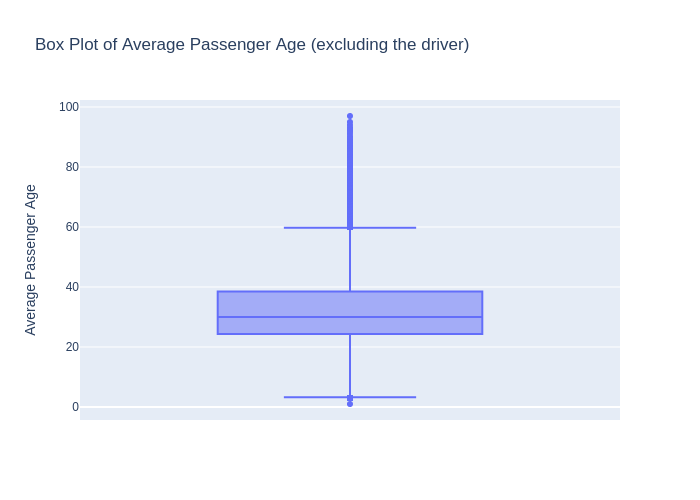

In [76]:
fig = px.box(people_subset, y='average_age', title='Box Plot of Average Passenger Age (excluding the driver)',
             labels={'average_age': 'Average Passenger Age'})


fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
   تتركز اعمار الاشخاص في الحوادث بين عمر ال 25 و ال 40 مع وجود القيم المتطرفة الني تمثل الاطفال دون سن ال 3 وكبيري السن فوق ال 60 عام

</div>

### [iv]

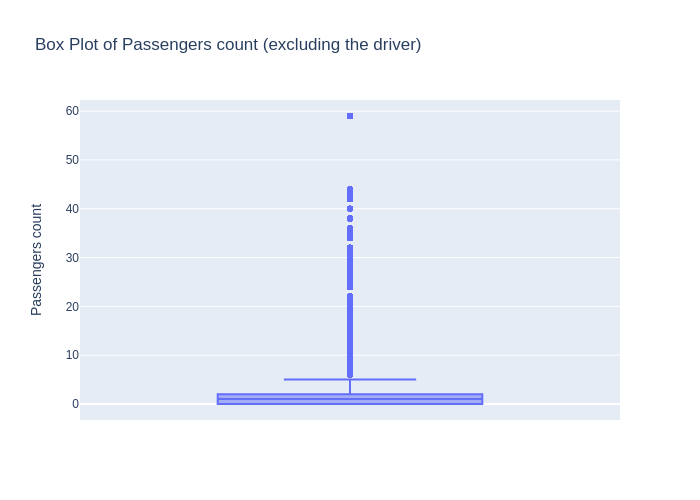

In [77]:
fig = px.box(people_subset, y='people_count_per_crash', title='Box Plot of Passengers count (excluding the driver)',
             labels={'people_count_per_crash': 'Passengers count'})


fig.show(renderer="png")


 <div dir="rtl" style="text-align: right;">
    متوسط عدد الركاب  ما عدا السائق هو 1 ومعظم القيم تتركز بين ال 0 و ال 2 مع وجود عدد من القيم المتطرفة التي قد تمثل حافلات النقل الكبيرة واليات النقل العامة

</div>

### [v]

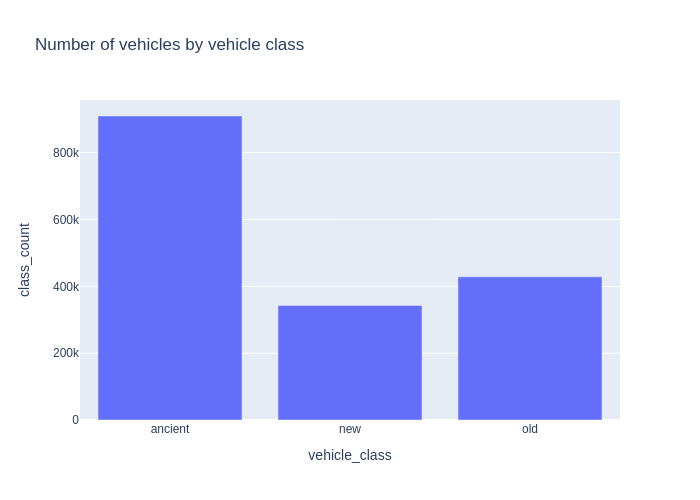

In [78]:
class_df = crash_vehicles_features.groupby('vehicle_class').size().reset_index(name='class_count')

fig = px.bar(class_df, x='vehicle_class', y='class_count',
             title='Number of vehicles by vehicle class')

fig.show(renderer="png")


 <div dir="rtl" style="text-align: right;">
     معظم المركبات المتورطة في الحوادث هي مركبات قديمة واقل المركبات هي المركبات الحديثة وهي نتيجة منطقية

</div>

## [e] Outlier Detection

### [i]

# Question [4]: Do What you Have to Do

In [79]:
# people_subset
# people_v_merge
# merge_crash_street
# crash_vehicles_features
# chicago_street_features
# crash_features
# crash_people_features

In [80]:
merge_crash_street.columns

Index(['Unnamed: 0_x', 'CRASH_RECORD_ID', 'CRASH_DATE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_YEAR',
       'geo_hash', 'geo_cat', 'new_STREET_NAME', 'Unnamed: 0_y', 'the_geom',
       'STREET_NAM', 'STREET_TYP', 'STREETNAME', 'CLASS', 'STATUS',
       'DIR_TRAVEL', 'LENGTH', 'length_km', 'street_cat', 'new_STREET_NAM'],
      dtype='object')

In [81]:
crash_features.columns

Index(['Unnamed: 0', 'CRASH_RECORD_ID', 'CRASH_DATE', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'LANE_CNT',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'INTERSECTION_RELATED_I', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION',
       'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'CRASH_YEAR',
       'geo_hash', 'geo_cat', 'new_STREET_NAME', 'dist_from_CBD',
       'CBD_approximity', 'inside_CBD_i', 'BEAT_NUM'],
      dtype='object')

In [82]:
crash_vehicles_features.columns

Index(['Unnamed: 0', 'CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE',
       'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION',
       'MANEUVER', 'OCCUPANT_CNT', 'number_of_vehicles_in_crash', 'crach_year',
       'vehicle_age', 'vehicle_class', 'class_in_crash'],
      dtype='object')

In [83]:
crash_features['ROADWAY_SURFACE_COND'].value_counts()

ROADWAY_SURFACE_COND
DRY                607276
WET                110266
UNKNOWN             70258
SNOW OR SLUSH       28122
ICE                  5659
OTHER                2072
SAND, MUD, DIRT       304
Name: count, dtype: int64

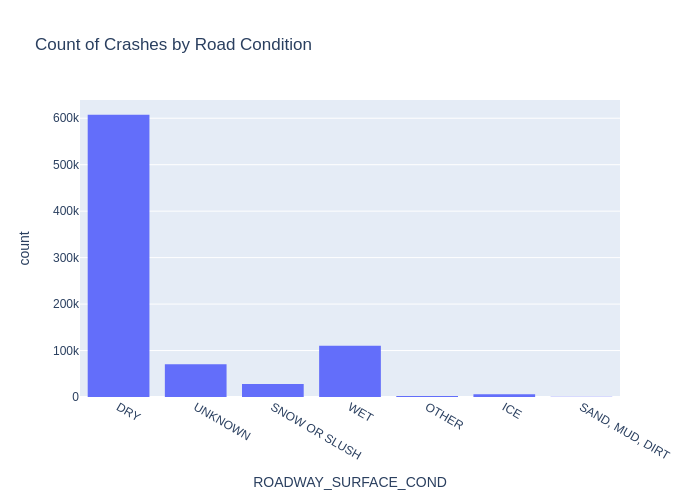

In [84]:
fig = px.histogram(crash_features, x='ROADWAY_SURFACE_COND', title='Count of Crashes by Road Condition')
fig.show(renderer="png")


 <div dir="rtl" style="text-align: right;">
 نلاحظ ارتفاع كبير في عدد الحوادث عندما يكون الطريق جاف وخالي من الرطوبة والوحل والثلوج وقد يكون السبب في ذلك هوا المبالغة في الثقة عند السائقين في مثل هذا الظرف مما يؤدي الى زيادة السرعة بشكل كبير جدا ويسبب حدوث عدد اكبر من الحوادث بينما في الظروف المختلفة فان حالة الطريق من رطوبة ووحل وثلوج تجبر السائقين على تخفيف السرعة والقيادة بتاني

</div>

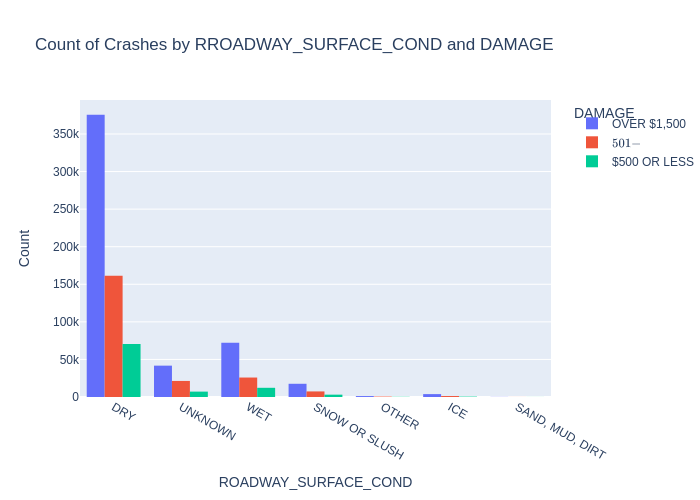

In [85]:
fig = px.histogram(crash_features, x='ROADWAY_SURFACE_COND', color='DAMAGE', barmode='group',
                   title='Count of Crashes by RROADWAY_SURFACE_COND and DAMAGE',
                  #  labels={'Road Condition': 'Road Condition', 'Crash Severity': 'Crash Severity'}
                   )
fig.update_layout(xaxis_title='ROADWAY_SURFACE_COND', yaxis_title='Count',
                  legend_title_text='DAMAGE')
fig.show(renderer="png")


 <div dir="rtl" style="text-align: right;">
 يرتفع حجم الضرر عندما يكون حالة سطح الطريق جافة وغالبا يعود الى ارتفاع السرعة بشكل كبير في مثل هذه الضروف

</div>

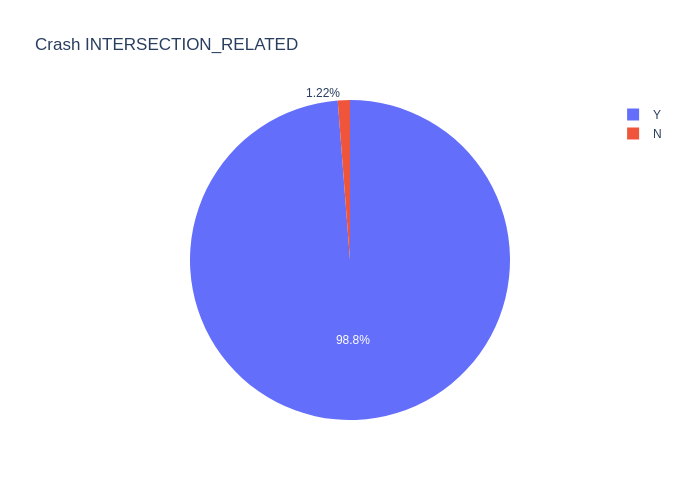

In [86]:
df= crash_features['INTERSECTION_RELATED_I'].value_counts().reset_index()
df.columns = ['INTERSECTION_RELATED_I' , 'cnt']
fig = px.pie(df, values='cnt',names = 'INTERSECTION_RELATED_I',  title='Crash INTERSECTION_RELATED')
fig.show(renderer="png")


 <div dir="rtl" style="text-align: right;">
من الرسم السابق يتبين انه تقريبا كل  الحوادث حصلت على تقاطعات الطرق
</div>

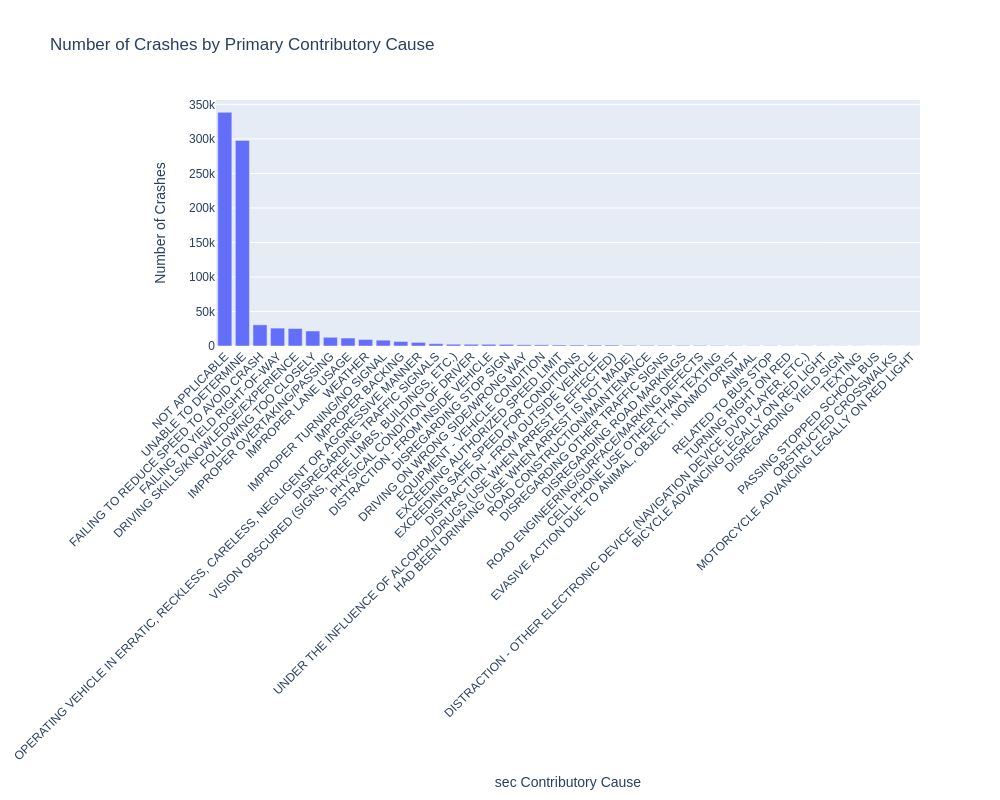

In [87]:
cause_counts = crash_features['SEC_CONTRIBUTORY_CAUSE'].value_counts().reset_index()
cause_counts.columns = ['SEC_CONTRIBUTORY_CAUSE', 'Crash Count']

fig = px.bar(cause_counts, x='SEC_CONTRIBUTORY_CAUSE', y='Crash Count',
             title='Number of Crashes by Primary Contributory Cause',
             labels={'SEC_CONTRIBUTORY_CAUSE': 'sec Contributory Cause', 'Crash Count': 'Number of Crashes'},
             width=1000, height=800)

fig.update_layout(xaxis_tickangle=-45)

fig.show(renderer="png")


 <div dir="rtl" style="text-align: right;">
 لم يتم تحديد مسبب ثانوي لكل الحوادث تقريبا باستثناء القليل منها
</div>

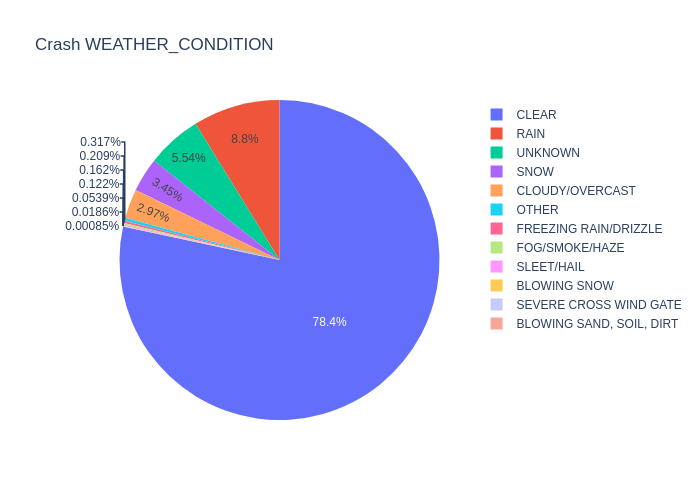

In [88]:
df= crash_features['WEATHER_CONDITION'].value_counts().reset_index()
df.columns = ['WEATHER_CONDITION' , 'cnt']
fig = px.pie(df, values='cnt',names = 'WEATHER_CONDITION',  title='Crash WEATHER_CONDITION')
fig.show(renderer="png")


 <div dir="rtl" style="text-align: right;">

غالبية الحوادث تكون في الطقس الصافي وذلك قد يعود لسبب انه من الممكن ان معظم اوقات السنة يكون الجو صافي لذا فان المعلومات الموجودة غير كافية لتحديد ما اذا كانت الحوادث اكثر في الجو الصافي او غير ذلك.

او  لان حركة الناس تكون اكبر عندما يكون الطقس جيد على عكس الظروف الجوية الاخرى التي تحد من حركة الناس


بالاضافة الى ان السائقين في الظروف الجوية السيئة يكونون اكثر انتباها من الضروف الجوية الصافية
</div>

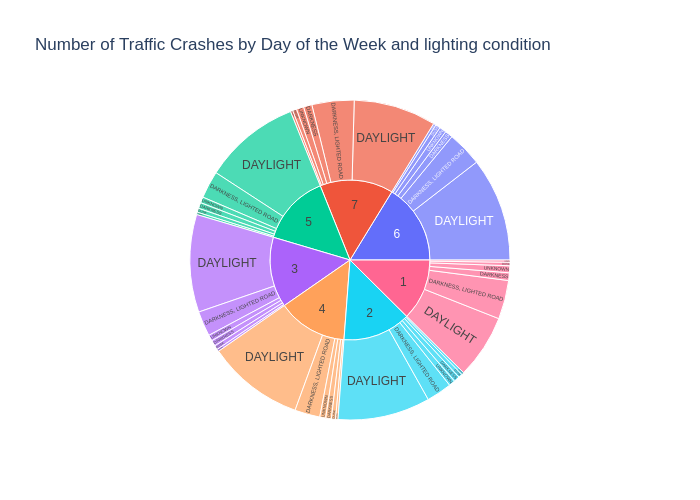

In [89]:
fig = px.sunburst(crash_features, path=[ 'CRASH_DAY_OF_WEEK' ,'LIGHTING_CONDITION'],
                  title='Number of Traffic Crashes by Day of the Week and lighting condition',
                  labels={'LIGHTING_CONDITION': 'lighting', 'CRASH_DAY_OF_WEEK': 'day'})


fig.show(renderer="png")



 <div dir="rtl" style="text-align: right;">
الرسم السابق يظهر ان الحوادث توازع الحوادث بالنسبة الى ايام الاسبوع مع مراعاة الاضاءة هو توزع متقارب بين جميع الايام
</div>

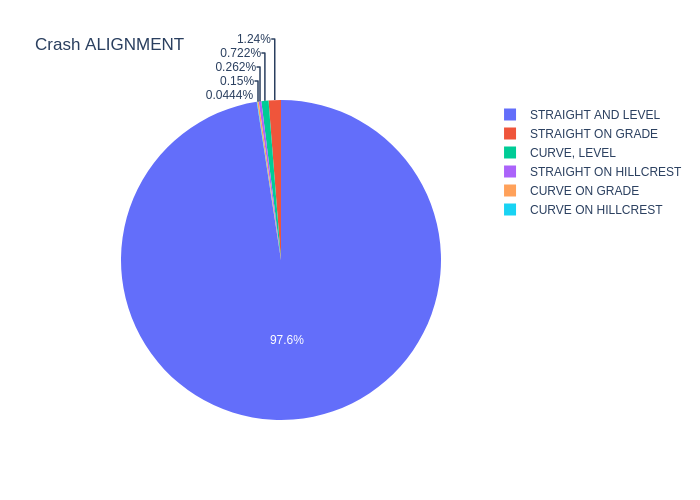

In [90]:
df= crash_features['ALIGNMENT'].value_counts().reset_index()
df.columns = ['ALIGNMENT' , 'cnt']
fig = px.pie(df, values='cnt',names = 'ALIGNMENT',  title='Crash ALIGNMENT')
fig.show(renderer="png")


 <div dir="rtl" style="text-align: right;">
تقريبا كل الحوادث تحصل على الطرقات المستقيمة والمستوية

قد يعود السبب في ذلك الى انه من الممكن ان تكون النسبة الكبر من الطرقات من هذا النوع او ان الطرقات الرئيسة وهي الاكثر عرضة لحدوث الحوادث هي من هذا النوع

ومن الممكن ان يكزن السبب ان القيادة في مثل هذه الطرقات تدفع السائقين خصوصا الشبان وصغار العمر منهم الى القيادة بشكل متهور وبسرعة كبيرة
</div>

In [92]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/first_task.ipynb' /content/drive/MyDrive/Colab Notebooks/first_task.ipynb.html

[NbConvertApp] WARNING | pattern '/content/drive/MyDrive/Colab' matched no files
[NbConvertApp] WARNING | pattern 'Notebooks/first_task.ipynb.html' matched no files
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/first_task.ipynb to html
[NbConvertApp] Writing 4085927 bytes to /content/drive/MyDrive/Colab Notebooks/first_task.html
